In [206]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

import re
import string
import glob
import warnings

fontpath = '/usr/share/fonts/truetype/nanum/Nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.style.use('seaborn-white')
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['figure.figsize'] = [20, 10]
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

%config InlineBackend.figure_format = 'retina'

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/smcho1201/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/smcho1201/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /home/smcho1201/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


# Data Load

In [207]:
random_shuffle = pd.read_csv('/project/Roblox/jihoonmanse/April/random_data.csv', index_col=0)
wordcount = pd.read_csv('/project/Roblox/jihoonmanse/April/wordcount_top10.csv', index_col=0)
tfidf = pd.read_csv('/project/Roblox/jihoonmanse/April/tfidf_top10.csv', index_col=0)
fisher = pd.read_csv('/project/Roblox/jihoonmanse/April/fisherexact_top10.csv', index_col=0)

# Preprocessing

In [208]:
def normalize(data = df):
    for ii in range(100): 
        try : 
            ss = data.iloc[ii].sum()
            if ss == 0:
                ss = 1
            data.iloc[ii] = data.iloc[ii] / ss
        except:
            pass
    return data

In [209]:
pre_random_shuffle = normalize(random_shuffle)
pre_wordcount = normalize(wordcount)
pre_tfidf = normalize(tfidf)
pre_fisher = normalize(fisher)

In [210]:
dic_label2num = {'Adopt Me!': 0, 'MeepCity': 1, 'Tower of Hell':2, 'Piggy': 3, 'Royale High': 4, 
                 'Jailbreak': 5, 'Murder Mystery 2':6, 'Welcome to Bloxburg': 7, 'Pizza Factory Tycoon': 8, 'Restaurant Tycoon': 9}

def labeling(df):
    lst_label = []

    for i in range(len(df)):
        index = df.index[i]
        game = index.split('_')[0]
        lst_label.append(game)

    df['label'] = lst_label
    
    df['label'] = df['label'].map(dic_label2num)
    


In [211]:
labeling(pre_random_shuffle)
labeling(pre_wordcount)
labeling(pre_tfidf)
labeling(pre_fisher)

# random_shuffle

## Training

In [212]:
pre_random_shuffle

,headless,intimidate,culinary,superman,borrow,sucust,where,kaz,parkour,killer,label
Adopt Me!_0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0
Adopt Me!_1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0
Adopt Me!_2,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0
Adopt Me!_3,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0
Adopt Me!_4,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
Restaurant Tycoon_5,0,0,0,0,0.0,0.0,0.0,0,0,0.0,9
Restaurant Tycoon_6,0,0,0,0,0.0,0.0,0.0,0,0,0.0,9
Restaurant Tycoon_7,0,0,0,0,0.0,0.0,0.0,0,0,0.0,9
Restaurant Tycoon_8,0,0,0,0,0.0,0.0,0.0,0,0,0.0,9


In [213]:
X = pre_random_shuffle.iloc[:,:-1] # data
y = pre_random_shuffle.iloc[:,-1]  # label

In [214]:
X

,headless,intimidate,culinary,superman,borrow,sucust,where,kaz,parkour,killer
Adopt Me!_0,0,0,0,0,0.0,0.0,0.0,0,0,0.0
Adopt Me!_1,0,0,0,0,0.0,0.0,0.0,0,0,0.0
Adopt Me!_2,0,0,0,0,0.0,0.0,0.0,0,0,0.0
Adopt Me!_3,0,0,0,0,0.0,0.0,0.0,0,0,0.0
Adopt Me!_4,0,0,0,0,0.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
Restaurant Tycoon_5,0,0,0,0,0.0,0.0,0.0,0,0,0.0
Restaurant Tycoon_6,0,0,0,0,0.0,0.0,0.0,0,0,0.0
Restaurant Tycoon_7,0,0,0,0,0.0,0.0,0.0,0,0,0.0
Restaurant Tycoon_8,0,0,0,0,0.0,0.0,0.0,0,0,0.0


In [215]:
y

Adopt Me!_0            0
Adopt Me!_1            0
Adopt Me!_2            0
Adopt Me!_3            0
Adopt Me!_4            0
                      ..
Restaurant Tycoon_5    9
Restaurant Tycoon_6    9
Restaurant Tycoon_7    9
Restaurant Tycoon_8    9
Restaurant Tycoon_9    9
Name: label, Length: 100, dtype: int64

### models

In [216]:
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf_ada = AdaBoostClassifier(n_estimators=1000, random_state=42)
clf_gb = GradientBoostingClassifier(n_estimators=1000, random_state=42)
clf_xgb = XGBClassifier(n_estimators=1000, random_state=42)
clf_lgb = LGBMClassifier(n_estimators=1000, random_state=42)
clf_cb = CatBoostClassifier(random_state=42)

lst_models = [clf_rf, clf_ada, clf_gb, clf_xgb, clf_lgb, clf_cb]

In [217]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, train_size=0.9, random_state=42)

In [218]:
next(iter(sss.split(X, y)))

(array([95, 93, 80, 61, 51, 20, 46, 17, 16, 71,  2, 64, 58, 59, 38, 10,  1,
        65, 23, 45, 82, 52, 97, 36, 62, 47,  0, 22, 19, 87, 32, 29, 15, 73,
        35, 81, 74, 53, 44, 98, 99, 70, 63,  5, 13, 66, 57, 89, 54, 21, 26,
        48, 43, 72, 41, 96, 28, 60, 55, 75, 33, 18, 77, 88,  9, 31, 92,  7,
        30, 86, 34, 84, 11, 68,  4,  8,  3, 79, 78, 42, 14, 37, 40, 67, 27,
        25, 50, 94, 85, 90]),
 array([76, 91, 12, 69, 56, 24,  6, 49, 39, 83]))

In [219]:
lst_accuracy = []

iteration = 0
for i, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]
    
    for model in lst_models:
        print('iter: {} / model: {}'.format(iteration, model))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        lst_accuracy.append(accuracy)
    iteration +=1

iter: 0 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
iter

261:	learn: 1.9819968	total: 335ms	remaining: 942ms
262:	learn: 1.9817025	total: 336ms	remaining: 941ms
263:	learn: 1.9814412	total: 336ms	remaining: 938ms
264:	learn: 1.9811433	total: 337ms	remaining: 936ms
265:	learn: 1.9808613	total: 338ms	remaining: 933ms
266:	learn: 1.9804978	total: 339ms	remaining: 931ms
267:	learn: 1.9802209	total: 340ms	remaining: 930ms
268:	learn: 1.9799572	total: 342ms	remaining: 928ms
269:	learn: 1.9797138	total: 343ms	remaining: 926ms
270:	learn: 1.9793789	total: 344ms	remaining: 924ms
271:	learn: 1.9790981	total: 344ms	remaining: 922ms
272:	learn: 1.9788127	total: 345ms	remaining: 920ms
273:	learn: 1.9784137	total: 347ms	remaining: 918ms
274:	learn: 1.9780823	total: 347ms	remaining: 916ms
275:	learn: 1.9778187	total: 348ms	remaining: 913ms
276:	learn: 1.9774912	total: 349ms	remaining: 911ms
277:	learn: 1.9772136	total: 350ms	remaining: 910ms
278:	learn: 1.9769045	total: 351ms	remaining: 908ms
279:	learn: 1.9766235	total: 352ms	remaining: 906ms
280:	learn: 

461:	learn: 1.9485056	total: 531ms	remaining: 618ms
462:	learn: 1.9484296	total: 532ms	remaining: 617ms
463:	learn: 1.9483471	total: 534ms	remaining: 616ms
464:	learn: 1.9482629	total: 534ms	remaining: 615ms
465:	learn: 1.9481834	total: 535ms	remaining: 613ms
466:	learn: 1.9480942	total: 536ms	remaining: 612ms
467:	learn: 1.9480218	total: 538ms	remaining: 611ms
468:	learn: 1.9479441	total: 538ms	remaining: 610ms
469:	learn: 1.9478755	total: 539ms	remaining: 608ms
470:	learn: 1.9478038	total: 540ms	remaining: 607ms
471:	learn: 1.9477329	total: 541ms	remaining: 605ms
472:	learn: 1.9476656	total: 542ms	remaining: 604ms
473:	learn: 1.9475802	total: 543ms	remaining: 603ms
474:	learn: 1.9475054	total: 544ms	remaining: 601ms
475:	learn: 1.9474217	total: 545ms	remaining: 600ms
476:	learn: 1.9473484	total: 546ms	remaining: 599ms
477:	learn: 1.9472744	total: 547ms	remaining: 598ms
478:	learn: 1.9471975	total: 548ms	remaining: 596ms
479:	learn: 1.9471029	total: 549ms	remaining: 595ms
480:	learn: 

660:	learn: 1.9377474	total: 727ms	remaining: 373ms
661:	learn: 1.9377141	total: 728ms	remaining: 372ms
662:	learn: 1.9376756	total: 729ms	remaining: 371ms
663:	learn: 1.9376396	total: 730ms	remaining: 369ms
664:	learn: 1.9376028	total: 731ms	remaining: 368ms
665:	learn: 1.9375634	total: 732ms	remaining: 367ms
666:	learn: 1.9375337	total: 733ms	remaining: 366ms
667:	learn: 1.9374909	total: 734ms	remaining: 365ms
668:	learn: 1.9374521	total: 735ms	remaining: 364ms
669:	learn: 1.9374228	total: 736ms	remaining: 362ms
670:	learn: 1.9373911	total: 736ms	remaining: 361ms
671:	learn: 1.9373525	total: 737ms	remaining: 360ms
672:	learn: 1.9373218	total: 739ms	remaining: 359ms
673:	learn: 1.9372886	total: 740ms	remaining: 358ms
674:	learn: 1.9372588	total: 740ms	remaining: 356ms
675:	learn: 1.9372273	total: 742ms	remaining: 355ms
676:	learn: 1.9371892	total: 743ms	remaining: 354ms
677:	learn: 1.9371590	total: 744ms	remaining: 353ms
678:	learn: 1.9371283	total: 744ms	remaining: 352ms
679:	learn: 

862:	learn: 1.9326163	total: 924ms	remaining: 147ms
863:	learn: 1.9325947	total: 925ms	remaining: 146ms
864:	learn: 1.9325736	total: 926ms	remaining: 144ms
865:	learn: 1.9325564	total: 927ms	remaining: 143ms
866:	learn: 1.9325403	total: 928ms	remaining: 142ms
867:	learn: 1.9325235	total: 928ms	remaining: 141ms
868:	learn: 1.9325045	total: 930ms	remaining: 140ms
869:	learn: 1.9324864	total: 930ms	remaining: 139ms
870:	learn: 1.9324683	total: 931ms	remaining: 138ms
871:	learn: 1.9324501	total: 932ms	remaining: 137ms
872:	learn: 1.9324361	total: 933ms	remaining: 136ms
873:	learn: 1.9324188	total: 934ms	remaining: 135ms
874:	learn: 1.9323981	total: 935ms	remaining: 134ms
875:	learn: 1.9323817	total: 936ms	remaining: 132ms
876:	learn: 1.9323609	total: 936ms	remaining: 131ms
877:	learn: 1.9323410	total: 937ms	remaining: 130ms
878:	learn: 1.9323234	total: 939ms	remaining: 129ms
879:	learn: 1.9323074	total: 940ms	remaining: 128ms
880:	learn: 1.9322880	total: 941ms	remaining: 127ms
881:	learn: 

iter: 1 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 1 / model: <catboost.core.CatBoostClassifier object at 0x7faafdd84670>
Learning rate set to 0.069983
0:	learn: 2.2982575	total: 687us	remaining: 687ms
1:	learn: 2.2910964	total: 1.61ms	remaining: 803ms
2:	learn: 2.2877291	total: 2.52ms	remaining: 837ms
3:	learn: 2.2852318	total: 3.12ms	remaining: 777ms
4:	learn: 2.2833968	total: 3.72ms	remaining: 740ms
5:	learn: 2.2784871	total: 4.75ms	remaining: 786ms
6:	learn: 2.2737942	total: 5.49ms	remaining: 779ms
7:	learn: 2.2711420	total: 6.32ms	remaining: 784ms
8:	learn: 2.2682112	total: 7.12ms	remaining: 784ms
9:	learn: 2.2658202	total: 7.89ms	remaining: 782ms
10:	learn: 2.2616287	total: 8.88ms	remaining: 798ms
11:	learn: 2.2569077	total: 9.82ms	remaining: 809ms
12:	learn: 2.2543364	total: 10.5ms	remaining: 796ms
13:	learn: 2.2523139	total: 11.1ms	remaining: 781ms
14:	learn: 2.2504618	total: 11.6ms	remaining: 763ms
15:	learn: 2.2449971	total: 12.4ms	remaining: 760ms
16:	

213:	learn: 1.9322314	total: 144ms	remaining: 530ms
214:	learn: 1.9315590	total: 145ms	remaining: 529ms
215:	learn: 1.9309597	total: 146ms	remaining: 528ms
216:	learn: 1.9304564	total: 146ms	remaining: 527ms
217:	learn: 1.9298550	total: 147ms	remaining: 528ms
218:	learn: 1.9292303	total: 148ms	remaining: 527ms
219:	learn: 1.9286671	total: 150ms	remaining: 532ms
220:	learn: 1.9281124	total: 151ms	remaining: 531ms
221:	learn: 1.9275904	total: 151ms	remaining: 530ms
222:	learn: 1.9269642	total: 152ms	remaining: 529ms
223:	learn: 1.9264026	total: 152ms	remaining: 528ms
224:	learn: 1.9257970	total: 153ms	remaining: 526ms
225:	learn: 1.9252563	total: 153ms	remaining: 525ms
226:	learn: 1.9246700	total: 154ms	remaining: 524ms
227:	learn: 1.9242144	total: 158ms	remaining: 535ms
228:	learn: 1.9236553	total: 159ms	remaining: 535ms
229:	learn: 1.9231797	total: 160ms	remaining: 535ms
230:	learn: 1.9227094	total: 160ms	remaining: 534ms
231:	learn: 1.9221224	total: 161ms	remaining: 534ms
232:	learn: 

396:	learn: 1.8703169	total: 340ms	remaining: 517ms
397:	learn: 1.8700935	total: 341ms	remaining: 516ms
398:	learn: 1.8698968	total: 343ms	remaining: 516ms
399:	learn: 1.8697598	total: 344ms	remaining: 516ms
400:	learn: 1.8696016	total: 345ms	remaining: 515ms
401:	learn: 1.8694162	total: 346ms	remaining: 515ms
402:	learn: 1.8692464	total: 347ms	remaining: 514ms
403:	learn: 1.8691043	total: 348ms	remaining: 514ms
404:	learn: 1.8689350	total: 349ms	remaining: 513ms
405:	learn: 1.8687821	total: 350ms	remaining: 512ms
406:	learn: 1.8686311	total: 351ms	remaining: 512ms
407:	learn: 1.8684578	total: 352ms	remaining: 511ms
408:	learn: 1.8682973	total: 353ms	remaining: 511ms
409:	learn: 1.8680991	total: 354ms	remaining: 510ms
410:	learn: 1.8679571	total: 356ms	remaining: 510ms
411:	learn: 1.8677986	total: 356ms	remaining: 509ms
412:	learn: 1.8676616	total: 357ms	remaining: 508ms
413:	learn: 1.8674742	total: 358ms	remaining: 507ms
414:	learn: 1.8673253	total: 359ms	remaining: 506ms
415:	learn: 

584:	learn: 1.8490543	total: 536ms	remaining: 380ms
585:	learn: 1.8489941	total: 537ms	remaining: 380ms
586:	learn: 1.8489304	total: 538ms	remaining: 379ms
587:	learn: 1.8488478	total: 539ms	remaining: 378ms
588:	learn: 1.8487767	total: 540ms	remaining: 377ms
589:	learn: 1.8486928	total: 541ms	remaining: 376ms
590:	learn: 1.8486271	total: 543ms	remaining: 375ms
591:	learn: 1.8485547	total: 543ms	remaining: 375ms
592:	learn: 1.8485042	total: 545ms	remaining: 374ms
593:	learn: 1.8484538	total: 546ms	remaining: 373ms
594:	learn: 1.8483780	total: 547ms	remaining: 372ms
595:	learn: 1.8483193	total: 548ms	remaining: 371ms
596:	learn: 1.8482301	total: 549ms	remaining: 371ms
597:	learn: 1.8481616	total: 550ms	remaining: 370ms
598:	learn: 1.8480830	total: 551ms	remaining: 369ms
599:	learn: 1.8480102	total: 552ms	remaining: 368ms
600:	learn: 1.8479532	total: 553ms	remaining: 367ms
601:	learn: 1.8478805	total: 554ms	remaining: 366ms
602:	learn: 1.8478027	total: 555ms	remaining: 366ms
603:	learn: 

781:	learn: 1.8391466	total: 732ms	remaining: 204ms
782:	learn: 1.8391075	total: 733ms	remaining: 203ms
783:	learn: 1.8390710	total: 735ms	remaining: 202ms
784:	learn: 1.8390341	total: 735ms	remaining: 201ms
785:	learn: 1.8389942	total: 736ms	remaining: 200ms
786:	learn: 1.8389670	total: 737ms	remaining: 200ms
787:	learn: 1.8389407	total: 738ms	remaining: 199ms
788:	learn: 1.8389080	total: 739ms	remaining: 198ms
789:	learn: 1.8388665	total: 740ms	remaining: 197ms
790:	learn: 1.8388314	total: 741ms	remaining: 196ms
791:	learn: 1.8387947	total: 742ms	remaining: 195ms
792:	learn: 1.8387641	total: 743ms	remaining: 194ms
793:	learn: 1.8387234	total: 744ms	remaining: 193ms
794:	learn: 1.8386961	total: 745ms	remaining: 192ms
795:	learn: 1.8386684	total: 746ms	remaining: 191ms
796:	learn: 1.8386352	total: 747ms	remaining: 190ms
797:	learn: 1.8386047	total: 748ms	remaining: 189ms
798:	learn: 1.8385659	total: 749ms	remaining: 188ms
799:	learn: 1.8385348	total: 750ms	remaining: 188ms
800:	learn: 

979:	learn: 1.8337860	total: 928ms	remaining: 18.9ms
980:	learn: 1.8337668	total: 929ms	remaining: 18ms
981:	learn: 1.8337445	total: 930ms	remaining: 17ms
982:	learn: 1.8337215	total: 931ms	remaining: 16.1ms
983:	learn: 1.8336966	total: 932ms	remaining: 15.2ms
984:	learn: 1.8336780	total: 933ms	remaining: 14.2ms
985:	learn: 1.8336496	total: 933ms	remaining: 13.3ms
986:	learn: 1.8336258	total: 934ms	remaining: 12.3ms
987:	learn: 1.8336034	total: 936ms	remaining: 11.4ms
988:	learn: 1.8335810	total: 936ms	remaining: 10.4ms
989:	learn: 1.8335568	total: 937ms	remaining: 9.47ms
990:	learn: 1.8335341	total: 939ms	remaining: 8.52ms
991:	learn: 1.8335154	total: 940ms	remaining: 7.58ms
992:	learn: 1.8334977	total: 941ms	remaining: 6.63ms
993:	learn: 1.8334848	total: 942ms	remaining: 5.68ms
994:	learn: 1.8334637	total: 943ms	remaining: 4.74ms
995:	learn: 1.8334465	total: 943ms	remaining: 3.79ms
996:	learn: 1.8334249	total: 945ms	remaining: 2.84ms
997:	learn: 1.8334041	total: 945ms	remaining: 1.89

122:	learn: 2.0396371	total: 152ms	remaining: 1.09s
123:	learn: 2.0386362	total: 153ms	remaining: 1.08s
124:	learn: 2.0372946	total: 154ms	remaining: 1.08s
125:	learn: 2.0360023	total: 155ms	remaining: 1.07s
126:	learn: 2.0347392	total: 156ms	remaining: 1.07s
127:	learn: 2.0336411	total: 156ms	remaining: 1.06s
128:	learn: 2.0322459	total: 157ms	remaining: 1.06s
129:	learn: 2.0310913	total: 158ms	remaining: 1.05s
130:	learn: 2.0298063	total: 158ms	remaining: 1.05s
131:	learn: 2.0284319	total: 160ms	remaining: 1.05s
132:	learn: 2.0272759	total: 160ms	remaining: 1.04s
133:	learn: 2.0260537	total: 161ms	remaining: 1.04s
134:	learn: 2.0248293	total: 162ms	remaining: 1.04s
135:	learn: 2.0236403	total: 163ms	remaining: 1.04s
136:	learn: 2.0226032	total: 164ms	remaining: 1.03s
137:	learn: 2.0214592	total: 165ms	remaining: 1.03s
138:	learn: 2.0202255	total: 166ms	remaining: 1.03s
139:	learn: 2.0190656	total: 166ms	remaining: 1.02s
140:	learn: 2.0178716	total: 167ms	remaining: 1.02s
141:	learn: 

320:	learn: 1.9146760	total: 348ms	remaining: 735ms
321:	learn: 1.9144739	total: 349ms	remaining: 735ms
322:	learn: 1.9142015	total: 350ms	remaining: 734ms
323:	learn: 1.9138815	total: 352ms	remaining: 734ms
324:	learn: 1.9136178	total: 353ms	remaining: 733ms
325:	learn: 1.9133724	total: 354ms	remaining: 733ms
326:	learn: 1.9130760	total: 356ms	remaining: 732ms
327:	learn: 1.9127628	total: 357ms	remaining: 731ms
328:	learn: 1.9125459	total: 358ms	remaining: 730ms
329:	learn: 1.9122883	total: 359ms	remaining: 728ms
330:	learn: 1.9119569	total: 360ms	remaining: 727ms
331:	learn: 1.9117427	total: 361ms	remaining: 726ms
332:	learn: 1.9114945	total: 362ms	remaining: 725ms
333:	learn: 1.9112727	total: 363ms	remaining: 724ms
334:	learn: 1.9110114	total: 364ms	remaining: 722ms
335:	learn: 1.9106982	total: 365ms	remaining: 721ms
336:	learn: 1.9104919	total: 365ms	remaining: 719ms
337:	learn: 1.9102242	total: 366ms	remaining: 718ms
338:	learn: 1.9099801	total: 367ms	remaining: 716ms
339:	learn: 

515:	learn: 1.8832224	total: 543ms	remaining: 509ms
516:	learn: 1.8831396	total: 544ms	remaining: 508ms
517:	learn: 1.8830526	total: 545ms	remaining: 507ms
518:	learn: 1.8829620	total: 546ms	remaining: 506ms
519:	learn: 1.8828710	total: 547ms	remaining: 505ms
520:	learn: 1.8827826	total: 548ms	remaining: 504ms
521:	learn: 1.8826995	total: 549ms	remaining: 503ms
522:	learn: 1.8826244	total: 550ms	remaining: 501ms
523:	learn: 1.8825192	total: 551ms	remaining: 500ms
524:	learn: 1.8824235	total: 552ms	remaining: 499ms
525:	learn: 1.8823010	total: 553ms	remaining: 499ms
526:	learn: 1.8822073	total: 554ms	remaining: 497ms
527:	learn: 1.8820896	total: 555ms	remaining: 496ms
528:	learn: 1.8820207	total: 556ms	remaining: 495ms
529:	learn: 1.8819092	total: 557ms	remaining: 494ms
530:	learn: 1.8817935	total: 558ms	remaining: 493ms
531:	learn: 1.8817150	total: 559ms	remaining: 492ms
532:	learn: 1.8816182	total: 560ms	remaining: 491ms
533:	learn: 1.8815363	total: 561ms	remaining: 489ms
534:	learn: 

714:	learn: 1.8705383	total: 738ms	remaining: 294ms
715:	learn: 1.8704982	total: 739ms	remaining: 293ms
716:	learn: 1.8704593	total: 740ms	remaining: 292ms
717:	learn: 1.8704207	total: 741ms	remaining: 291ms
718:	learn: 1.8703686	total: 742ms	remaining: 290ms
719:	learn: 1.8703129	total: 743ms	remaining: 289ms
720:	learn: 1.8702723	total: 744ms	remaining: 288ms
721:	learn: 1.8702246	total: 745ms	remaining: 287ms
722:	learn: 1.8701819	total: 746ms	remaining: 286ms
723:	learn: 1.8701481	total: 747ms	remaining: 285ms
724:	learn: 1.8701129	total: 748ms	remaining: 284ms
725:	learn: 1.8700721	total: 749ms	remaining: 283ms
726:	learn: 1.8700237	total: 750ms	remaining: 282ms
727:	learn: 1.8699850	total: 751ms	remaining: 280ms
728:	learn: 1.8699516	total: 751ms	remaining: 279ms
729:	learn: 1.8699170	total: 752ms	remaining: 278ms
730:	learn: 1.8698816	total: 753ms	remaining: 277ms
731:	learn: 1.8698394	total: 754ms	remaining: 276ms
732:	learn: 1.8697875	total: 755ms	remaining: 275ms
733:	learn: 

917:	learn: 1.8639768	total: 934ms	remaining: 83.4ms
918:	learn: 1.8639529	total: 935ms	remaining: 82.4ms
919:	learn: 1.8639308	total: 936ms	remaining: 81.4ms
920:	learn: 1.8639102	total: 937ms	remaining: 80.4ms
921:	learn: 1.8638830	total: 938ms	remaining: 79.4ms
922:	learn: 1.8638616	total: 939ms	remaining: 78.3ms
923:	learn: 1.8638369	total: 940ms	remaining: 77.3ms
924:	learn: 1.8638150	total: 941ms	remaining: 76.3ms
925:	learn: 1.8637927	total: 942ms	remaining: 75.3ms
926:	learn: 1.8637698	total: 943ms	remaining: 74.3ms
927:	learn: 1.8637515	total: 944ms	remaining: 73.3ms
928:	learn: 1.8637246	total: 945ms	remaining: 72.2ms
929:	learn: 1.8636945	total: 946ms	remaining: 71.2ms
930:	learn: 1.8636742	total: 947ms	remaining: 70.2ms
931:	learn: 1.8636427	total: 948ms	remaining: 69.2ms
932:	learn: 1.8636139	total: 949ms	remaining: 68.2ms
933:	learn: 1.8635929	total: 950ms	remaining: 67.1ms
934:	learn: 1.8635729	total: 951ms	remaining: 66.1ms
935:	learn: 1.8635462	total: 952ms	remaining: 

57:	learn: 2.1594052	total: 125ms	remaining: 2.03s
58:	learn: 2.1575772	total: 126ms	remaining: 2.02s
59:	learn: 2.1557460	total: 127ms	remaining: 1.99s
60:	learn: 2.1533608	total: 127ms	remaining: 1.96s
61:	learn: 2.1524155	total: 128ms	remaining: 1.93s
62:	learn: 2.1509241	total: 129ms	remaining: 1.91s
63:	learn: 2.1488810	total: 129ms	remaining: 1.89s
64:	learn: 2.1475700	total: 130ms	remaining: 1.86s
65:	learn: 2.1447985	total: 130ms	remaining: 1.85s
66:	learn: 2.1428078	total: 131ms	remaining: 1.83s
67:	learn: 2.1419238	total: 132ms	remaining: 1.81s
68:	learn: 2.1402517	total: 133ms	remaining: 1.79s
69:	learn: 2.1379783	total: 134ms	remaining: 1.78s
70:	learn: 2.1367580	total: 134ms	remaining: 1.76s
71:	learn: 2.1351330	total: 135ms	remaining: 1.74s
72:	learn: 2.1333110	total: 136ms	remaining: 1.72s
73:	learn: 2.1318598	total: 137ms	remaining: 1.71s
74:	learn: 2.1299351	total: 138ms	remaining: 1.7s
75:	learn: 2.1282847	total: 139ms	remaining: 1.69s
76:	learn: 2.1265530	total: 140m

251:	learn: 1.9609019	total: 320ms	remaining: 950ms
252:	learn: 1.9605389	total: 321ms	remaining: 948ms
253:	learn: 1.9601429	total: 322ms	remaining: 946ms
254:	learn: 1.9597023	total: 323ms	remaining: 943ms
255:	learn: 1.9592953	total: 324ms	remaining: 941ms
256:	learn: 1.9589283	total: 325ms	remaining: 939ms
257:	learn: 1.9585379	total: 326ms	remaining: 937ms
258:	learn: 1.9581404	total: 327ms	remaining: 935ms
259:	learn: 1.9577126	total: 328ms	remaining: 933ms
260:	learn: 1.9572652	total: 329ms	remaining: 931ms
261:	learn: 1.9569440	total: 330ms	remaining: 929ms
262:	learn: 1.9566149	total: 331ms	remaining: 928ms
263:	learn: 1.9561947	total: 332ms	remaining: 926ms
264:	learn: 1.9557775	total: 333ms	remaining: 924ms
265:	learn: 1.9553932	total: 334ms	remaining: 922ms
266:	learn: 1.9550698	total: 335ms	remaining: 920ms
267:	learn: 1.9547155	total: 336ms	remaining: 918ms
268:	learn: 1.9544247	total: 337ms	remaining: 916ms
269:	learn: 1.9541020	total: 338ms	remaining: 914ms
270:	learn: 

450:	learn: 1.9171880	total: 515ms	remaining: 627ms
451:	learn: 1.9170870	total: 516ms	remaining: 626ms
452:	learn: 1.9169519	total: 517ms	remaining: 625ms
453:	learn: 1.9168470	total: 518ms	remaining: 623ms
454:	learn: 1.9167656	total: 519ms	remaining: 622ms
455:	learn: 1.9166590	total: 520ms	remaining: 621ms
456:	learn: 1.9165643	total: 521ms	remaining: 619ms
457:	learn: 1.9164603	total: 522ms	remaining: 618ms
458:	learn: 1.9163271	total: 523ms	remaining: 617ms
459:	learn: 1.9161895	total: 524ms	remaining: 615ms
460:	learn: 1.9160615	total: 525ms	remaining: 614ms
461:	learn: 1.9159349	total: 526ms	remaining: 613ms
462:	learn: 1.9158288	total: 527ms	remaining: 612ms
463:	learn: 1.9156816	total: 528ms	remaining: 610ms
464:	learn: 1.9155860	total: 530ms	remaining: 609ms
465:	learn: 1.9154453	total: 531ms	remaining: 608ms
466:	learn: 1.9153515	total: 532ms	remaining: 607ms
467:	learn: 1.9152451	total: 533ms	remaining: 606ms
468:	learn: 1.9151658	total: 534ms	remaining: 604ms
469:	learn: 

644:	learn: 1.9024139	total: 711ms	remaining: 391ms
645:	learn: 1.9023619	total: 712ms	remaining: 390ms
646:	learn: 1.9023081	total: 713ms	remaining: 389ms
647:	learn: 1.9022624	total: 714ms	remaining: 388ms
648:	learn: 1.9022115	total: 715ms	remaining: 387ms
649:	learn: 1.9021644	total: 716ms	remaining: 386ms
650:	learn: 1.9021231	total: 717ms	remaining: 384ms
651:	learn: 1.9020702	total: 718ms	remaining: 383ms
652:	learn: 1.9020124	total: 719ms	remaining: 382ms
653:	learn: 1.9019660	total: 719ms	remaining: 381ms
654:	learn: 1.9019228	total: 720ms	remaining: 379ms
655:	learn: 1.9018775	total: 721ms	remaining: 378ms
656:	learn: 1.9018321	total: 722ms	remaining: 377ms
657:	learn: 1.9017951	total: 723ms	remaining: 376ms
658:	learn: 1.9017566	total: 724ms	remaining: 375ms
659:	learn: 1.9017072	total: 725ms	remaining: 373ms
660:	learn: 1.9016534	total: 726ms	remaining: 372ms
661:	learn: 1.9016078	total: 727ms	remaining: 371ms
662:	learn: 1.9015578	total: 728ms	remaining: 370ms
663:	learn: 

846:	learn: 1.8953534	total: 907ms	remaining: 164ms
847:	learn: 1.8953285	total: 908ms	remaining: 163ms
848:	learn: 1.8952953	total: 909ms	remaining: 162ms
849:	learn: 1.8952709	total: 910ms	remaining: 161ms
850:	learn: 1.8952432	total: 910ms	remaining: 159ms
851:	learn: 1.8952100	total: 911ms	remaining: 158ms
852:	learn: 1.8951811	total: 912ms	remaining: 157ms
853:	learn: 1.8951595	total: 913ms	remaining: 156ms
854:	learn: 1.8951275	total: 914ms	remaining: 155ms
855:	learn: 1.8951060	total: 915ms	remaining: 154ms
856:	learn: 1.8950774	total: 916ms	remaining: 153ms
857:	learn: 1.8950479	total: 917ms	remaining: 152ms
858:	learn: 1.8950225	total: 918ms	remaining: 151ms
859:	learn: 1.8950016	total: 919ms	remaining: 150ms
860:	learn: 1.8949767	total: 920ms	remaining: 149ms
861:	learn: 1.8949488	total: 921ms	remaining: 147ms
862:	learn: 1.8949154	total: 923ms	remaining: 147ms
863:	learn: 1.8948949	total: 924ms	remaining: 145ms
864:	learn: 1.8948663	total: 925ms	remaining: 144ms
865:	learn: 

iter: 4 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 4 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 4 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 4 / model: <catboost.core.CatBoostClassifier object at 0x7faafdd84670>
Learning rate set

247:	learn: 1.9678238	total: 313ms	remaining: 949ms
248:	learn: 1.9674181	total: 314ms	remaining: 946ms
249:	learn: 1.9670487	total: 315ms	remaining: 945ms
250:	learn: 1.9666463	total: 316ms	remaining: 942ms
251:	learn: 1.9662863	total: 317ms	remaining: 939ms
252:	learn: 1.9658308	total: 318ms	remaining: 938ms
253:	learn: 1.9655160	total: 319ms	remaining: 936ms
254:	learn: 1.9651368	total: 319ms	remaining: 933ms
255:	learn: 1.9647193	total: 320ms	remaining: 931ms
256:	learn: 1.9643396	total: 322ms	remaining: 930ms
257:	learn: 1.9638636	total: 323ms	remaining: 928ms
258:	learn: 1.9634733	total: 324ms	remaining: 926ms
259:	learn: 1.9631079	total: 325ms	remaining: 924ms
260:	learn: 1.9627686	total: 326ms	remaining: 923ms
261:	learn: 1.9624365	total: 327ms	remaining: 921ms
262:	learn: 1.9620472	total: 328ms	remaining: 920ms
263:	learn: 1.9616691	total: 329ms	remaining: 919ms
264:	learn: 1.9614272	total: 330ms	remaining: 916ms
265:	learn: 1.9610458	total: 331ms	remaining: 914ms
266:	learn: 

439:	learn: 1.9246795	total: 508ms	remaining: 647ms
440:	learn: 1.9245859	total: 509ms	remaining: 645ms
441:	learn: 1.9244910	total: 510ms	remaining: 644ms
442:	learn: 1.9243695	total: 511ms	remaining: 643ms
443:	learn: 1.9242447	total: 512ms	remaining: 641ms
444:	learn: 1.9241165	total: 513ms	remaining: 640ms
445:	learn: 1.9240255	total: 514ms	remaining: 639ms
446:	learn: 1.9239323	total: 515ms	remaining: 637ms
447:	learn: 1.9238091	total: 516ms	remaining: 636ms
448:	learn: 1.9236749	total: 518ms	remaining: 635ms
449:	learn: 1.9235881	total: 518ms	remaining: 634ms
450:	learn: 1.9234920	total: 519ms	remaining: 632ms
451:	learn: 1.9233822	total: 520ms	remaining: 631ms
452:	learn: 1.9232710	total: 521ms	remaining: 629ms
453:	learn: 1.9231591	total: 522ms	remaining: 628ms
454:	learn: 1.9230498	total: 523ms	remaining: 626ms
455:	learn: 1.9229604	total: 523ms	remaining: 624ms
456:	learn: 1.9228419	total: 525ms	remaining: 624ms
457:	learn: 1.9227532	total: 526ms	remaining: 622ms
458:	learn: 

637:	learn: 1.9099137	total: 704ms	remaining: 400ms
638:	learn: 1.9098739	total: 705ms	remaining: 398ms
639:	learn: 1.9098248	total: 706ms	remaining: 397ms
640:	learn: 1.9097795	total: 707ms	remaining: 396ms
641:	learn: 1.9097377	total: 708ms	remaining: 395ms
642:	learn: 1.9096894	total: 709ms	remaining: 394ms
643:	learn: 1.9096361	total: 710ms	remaining: 392ms
644:	learn: 1.9095969	total: 711ms	remaining: 391ms
645:	learn: 1.9095588	total: 712ms	remaining: 390ms
646:	learn: 1.9095184	total: 713ms	remaining: 389ms
647:	learn: 1.9094695	total: 714ms	remaining: 388ms
648:	learn: 1.9094279	total: 715ms	remaining: 387ms
649:	learn: 1.9093875	total: 716ms	remaining: 386ms
650:	learn: 1.9093380	total: 717ms	remaining: 385ms
651:	learn: 1.9092938	total: 718ms	remaining: 383ms
652:	learn: 1.9092535	total: 719ms	remaining: 382ms
653:	learn: 1.9092071	total: 720ms	remaining: 381ms
654:	learn: 1.9091608	total: 721ms	remaining: 380ms
655:	learn: 1.9091145	total: 722ms	remaining: 379ms
656:	learn: 

825:	learn: 1.9032003	total: 899ms	remaining: 189ms
826:	learn: 1.9031794	total: 900ms	remaining: 188ms
827:	learn: 1.9031433	total: 901ms	remaining: 187ms
828:	learn: 1.9031032	total: 902ms	remaining: 186ms
829:	learn: 1.9030806	total: 903ms	remaining: 185ms
830:	learn: 1.9030499	total: 904ms	remaining: 184ms
831:	learn: 1.9030266	total: 905ms	remaining: 183ms
832:	learn: 1.9029969	total: 906ms	remaining: 182ms
833:	learn: 1.9029662	total: 907ms	remaining: 181ms
834:	learn: 1.9029414	total: 908ms	remaining: 179ms
835:	learn: 1.9029220	total: 909ms	remaining: 178ms
836:	learn: 1.9028948	total: 910ms	remaining: 177ms
837:	learn: 1.9028705	total: 911ms	remaining: 176ms
838:	learn: 1.9028484	total: 912ms	remaining: 175ms
839:	learn: 1.9028207	total: 913ms	remaining: 174ms
840:	learn: 1.9027961	total: 914ms	remaining: 173ms
841:	learn: 1.9027690	total: 915ms	remaining: 172ms
842:	learn: 1.9027423	total: 916ms	remaining: 171ms
843:	learn: 1.9027116	total: 917ms	remaining: 169ms
844:	learn: 

iter: 5 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 5 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 5 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 5 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 5 / mode

161:	learn: 2.0207834	total: 138ms	remaining: 713ms
162:	learn: 2.0199942	total: 138ms	remaining: 711ms
163:	learn: 2.0191395	total: 139ms	remaining: 708ms
164:	learn: 2.0183301	total: 140ms	remaining: 706ms
165:	learn: 2.0173274	total: 140ms	remaining: 704ms
166:	learn: 2.0164086	total: 141ms	remaining: 701ms
167:	learn: 2.0156027	total: 141ms	remaining: 699ms
168:	learn: 2.0144850	total: 142ms	remaining: 697ms
169:	learn: 2.0137955	total: 142ms	remaining: 695ms
170:	learn: 2.0128495	total: 148ms	remaining: 720ms
171:	learn: 2.0119381	total: 149ms	remaining: 718ms
172:	learn: 2.0109502	total: 150ms	remaining: 716ms
173:	learn: 2.0101637	total: 151ms	remaining: 715ms
174:	learn: 2.0092356	total: 151ms	remaining: 714ms
175:	learn: 2.0083991	total: 153ms	remaining: 715ms
176:	learn: 2.0075564	total: 154ms	remaining: 715ms
177:	learn: 2.0066510	total: 155ms	remaining: 714ms
178:	learn: 2.0058912	total: 157ms	remaining: 718ms
179:	learn: 2.0050834	total: 158ms	remaining: 718ms
180:	learn: 

341:	learn: 1.9288160	total: 333ms	remaining: 640ms
342:	learn: 1.9285835	total: 334ms	remaining: 639ms
343:	learn: 1.9283219	total: 335ms	remaining: 638ms
344:	learn: 1.9280582	total: 335ms	remaining: 637ms
345:	learn: 1.9277527	total: 336ms	remaining: 635ms
346:	learn: 1.9275306	total: 337ms	remaining: 634ms
347:	learn: 1.9274375	total: 338ms	remaining: 633ms
348:	learn: 1.9271702	total: 339ms	remaining: 632ms
349:	learn: 1.9269526	total: 340ms	remaining: 632ms
350:	learn: 1.9267255	total: 341ms	remaining: 631ms
351:	learn: 1.9264867	total: 342ms	remaining: 629ms
352:	learn: 1.9262733	total: 343ms	remaining: 629ms
353:	learn: 1.9260550	total: 345ms	remaining: 629ms
354:	learn: 1.9258241	total: 346ms	remaining: 628ms
355:	learn: 1.9255696	total: 347ms	remaining: 627ms
356:	learn: 1.9253125	total: 348ms	remaining: 627ms
357:	learn: 1.9251004	total: 349ms	remaining: 625ms
358:	learn: 1.9249173	total: 350ms	remaining: 624ms
359:	learn: 1.9246794	total: 351ms	remaining: 623ms
360:	learn: 

538:	learn: 1.8994671	total: 528ms	remaining: 452ms
539:	learn: 1.8993472	total: 529ms	remaining: 451ms
540:	learn: 1.8992792	total: 530ms	remaining: 450ms
541:	learn: 1.8991853	total: 531ms	remaining: 449ms
542:	learn: 1.8990961	total: 532ms	remaining: 448ms
543:	learn: 1.8990220	total: 533ms	remaining: 447ms
544:	learn: 1.8989412	total: 534ms	remaining: 445ms
545:	learn: 1.8988601	total: 535ms	remaining: 444ms
546:	learn: 1.8987907	total: 535ms	remaining: 443ms
547:	learn: 1.8987064	total: 536ms	remaining: 442ms
548:	learn: 1.8986010	total: 537ms	remaining: 441ms
549:	learn: 1.8985342	total: 538ms	remaining: 440ms
550:	learn: 1.8984385	total: 539ms	remaining: 439ms
551:	learn: 1.8983511	total: 540ms	remaining: 438ms
552:	learn: 1.8982649	total: 541ms	remaining: 437ms
553:	learn: 1.8981907	total: 542ms	remaining: 436ms
554:	learn: 1.8981021	total: 542ms	remaining: 435ms
555:	learn: 1.8980364	total: 544ms	remaining: 434ms
556:	learn: 1.8979470	total: 545ms	remaining: 433ms
557:	learn: 

733:	learn: 1.8877659	total: 723ms	remaining: 262ms
734:	learn: 1.8877231	total: 724ms	remaining: 261ms
735:	learn: 1.8876910	total: 725ms	remaining: 260ms
736:	learn: 1.8876552	total: 726ms	remaining: 259ms
737:	learn: 1.8876166	total: 727ms	remaining: 258ms
738:	learn: 1.8875661	total: 728ms	remaining: 257ms
739:	learn: 1.8875354	total: 729ms	remaining: 256ms
740:	learn: 1.8874925	total: 730ms	remaining: 255ms
741:	learn: 1.8874394	total: 731ms	remaining: 254ms
742:	learn: 1.8873972	total: 731ms	remaining: 253ms
743:	learn: 1.8873650	total: 732ms	remaining: 252ms
744:	learn: 1.8873243	total: 733ms	remaining: 251ms
745:	learn: 1.8872869	total: 734ms	remaining: 250ms
746:	learn: 1.8872514	total: 735ms	remaining: 249ms
747:	learn: 1.8872098	total: 736ms	remaining: 248ms
748:	learn: 1.8871707	total: 737ms	remaining: 247ms
749:	learn: 1.8871293	total: 738ms	remaining: 246ms
750:	learn: 1.8870985	total: 739ms	remaining: 245ms
751:	learn: 1.8870626	total: 740ms	remaining: 244ms
752:	learn: 

926:	learn: 1.8817868	total: 918ms	remaining: 72.3ms
927:	learn: 1.8817622	total: 919ms	remaining: 71.3ms
928:	learn: 1.8817422	total: 920ms	remaining: 70.3ms
929:	learn: 1.8817234	total: 921ms	remaining: 69.3ms
930:	learn: 1.8816980	total: 922ms	remaining: 68.4ms
931:	learn: 1.8816754	total: 924ms	remaining: 67.4ms
932:	learn: 1.8816539	total: 925ms	remaining: 66.4ms
933:	learn: 1.8816318	total: 926ms	remaining: 65.4ms
934:	learn: 1.8816115	total: 927ms	remaining: 64.4ms
935:	learn: 1.8815866	total: 928ms	remaining: 63.4ms
936:	learn: 1.8815615	total: 929ms	remaining: 62.4ms
937:	learn: 1.8815330	total: 930ms	remaining: 61.4ms
938:	learn: 1.8815071	total: 931ms	remaining: 60.5ms
939:	learn: 1.8814833	total: 931ms	remaining: 59.5ms
940:	learn: 1.8814585	total: 932ms	remaining: 58.5ms
941:	learn: 1.8814396	total: 933ms	remaining: 57.5ms
942:	learn: 1.8814196	total: 934ms	remaining: 56.5ms
943:	learn: 1.8814038	total: 935ms	remaining: 55.5ms
944:	learn: 1.8813801	total: 936ms	remaining: 

99:	learn: 2.0820068	total: 147ms	remaining: 1.32s
100:	learn: 2.0802974	total: 154ms	remaining: 1.37s
101:	learn: 2.0786491	total: 154ms	remaining: 1.36s
102:	learn: 2.0772260	total: 155ms	remaining: 1.35s
103:	learn: 2.0758337	total: 156ms	remaining: 1.35s
104:	learn: 2.0742870	total: 158ms	remaining: 1.34s
105:	learn: 2.0729066	total: 159ms	remaining: 1.34s
106:	learn: 2.0711591	total: 159ms	remaining: 1.33s
107:	learn: 2.0698103	total: 160ms	remaining: 1.32s
108:	learn: 2.0684020	total: 161ms	remaining: 1.31s
109:	learn: 2.0667518	total: 161ms	remaining: 1.3s
110:	learn: 2.0652690	total: 162ms	remaining: 1.3s
111:	learn: 2.0639483	total: 163ms	remaining: 1.29s
112:	learn: 2.0623309	total: 164ms	remaining: 1.28s
113:	learn: 2.0609209	total: 164ms	remaining: 1.28s
114:	learn: 2.0596985	total: 165ms	remaining: 1.27s
115:	learn: 2.0583552	total: 166ms	remaining: 1.26s
116:	learn: 2.0568090	total: 167ms	remaining: 1.26s
117:	learn: 2.0553691	total: 168ms	remaining: 1.25s
118:	learn: 2.0

291:	learn: 1.9330370	total: 341ms	remaining: 827ms
292:	learn: 1.9326873	total: 342ms	remaining: 826ms
293:	learn: 1.9323269	total: 343ms	remaining: 824ms
294:	learn: 1.9319776	total: 344ms	remaining: 822ms
295:	learn: 1.9316802	total: 345ms	remaining: 820ms
296:	learn: 1.9312993	total: 346ms	remaining: 819ms
297:	learn: 1.9309696	total: 347ms	remaining: 817ms
298:	learn: 1.9306218	total: 348ms	remaining: 816ms
299:	learn: 1.9302817	total: 349ms	remaining: 814ms
300:	learn: 1.9300470	total: 350ms	remaining: 812ms
301:	learn: 1.9297079	total: 350ms	remaining: 810ms
302:	learn: 1.9294143	total: 351ms	remaining: 807ms
303:	learn: 1.9290249	total: 352ms	remaining: 805ms
304:	learn: 1.9287087	total: 352ms	remaining: 803ms
305:	learn: 1.9283817	total: 354ms	remaining: 802ms
306:	learn: 1.9281044	total: 354ms	remaining: 800ms
307:	learn: 1.9277963	total: 355ms	remaining: 798ms
308:	learn: 1.9275234	total: 357ms	remaining: 798ms
309:	learn: 1.9271869	total: 358ms	remaining: 796ms
310:	learn: 

493:	learn: 1.8947077	total: 537ms	remaining: 550ms
494:	learn: 1.8946116	total: 537ms	remaining: 548ms
495:	learn: 1.8945076	total: 538ms	remaining: 547ms
496:	learn: 1.8944235	total: 539ms	remaining: 545ms
497:	learn: 1.8943369	total: 540ms	remaining: 544ms
498:	learn: 1.8942294	total: 541ms	remaining: 543ms
499:	learn: 1.8941346	total: 542ms	remaining: 542ms
500:	learn: 1.8940399	total: 543ms	remaining: 540ms
501:	learn: 1.8939384	total: 544ms	remaining: 539ms
502:	learn: 1.8938436	total: 544ms	remaining: 538ms
503:	learn: 1.8937559	total: 546ms	remaining: 537ms
504:	learn: 1.8936604	total: 547ms	remaining: 536ms
505:	learn: 1.8935531	total: 548ms	remaining: 535ms
506:	learn: 1.8934647	total: 549ms	remaining: 533ms
507:	learn: 1.8933808	total: 549ms	remaining: 532ms
508:	learn: 1.8933022	total: 550ms	remaining: 531ms
509:	learn: 1.8931896	total: 551ms	remaining: 530ms
510:	learn: 1.8931221	total: 552ms	remaining: 528ms
511:	learn: 1.8930185	total: 553ms	remaining: 527ms
512:	learn: 

701:	learn: 1.8810414	total: 732ms	remaining: 311ms
702:	learn: 1.8810052	total: 733ms	remaining: 310ms
703:	learn: 1.8809677	total: 734ms	remaining: 309ms
704:	learn: 1.8809258	total: 735ms	remaining: 308ms
705:	learn: 1.8808840	total: 736ms	remaining: 306ms
706:	learn: 1.8808351	total: 737ms	remaining: 305ms
707:	learn: 1.8807860	total: 738ms	remaining: 304ms
708:	learn: 1.8807335	total: 739ms	remaining: 303ms
709:	learn: 1.8806881	total: 740ms	remaining: 302ms
710:	learn: 1.8806397	total: 741ms	remaining: 301ms
711:	learn: 1.8805830	total: 742ms	remaining: 300ms
712:	learn: 1.8805440	total: 743ms	remaining: 299ms
713:	learn: 1.8805071	total: 744ms	remaining: 298ms
714:	learn: 1.8804690	total: 745ms	remaining: 297ms
715:	learn: 1.8804271	total: 746ms	remaining: 296ms
716:	learn: 1.8803860	total: 747ms	remaining: 295ms
717:	learn: 1.8803471	total: 748ms	remaining: 294ms
718:	learn: 1.8803043	total: 749ms	remaining: 293ms
719:	learn: 1.8802679	total: 750ms	remaining: 292ms
720:	learn: 

900:	learn: 1.8747745	total: 927ms	remaining: 102ms
901:	learn: 1.8747510	total: 928ms	remaining: 101ms
902:	learn: 1.8747283	total: 929ms	remaining: 99.8ms
903:	learn: 1.8747071	total: 930ms	remaining: 98.8ms
904:	learn: 1.8746886	total: 931ms	remaining: 97.7ms
905:	learn: 1.8746666	total: 931ms	remaining: 96.6ms
906:	learn: 1.8746444	total: 933ms	remaining: 95.6ms
907:	learn: 1.8746207	total: 934ms	remaining: 94.6ms
908:	learn: 1.8745957	total: 934ms	remaining: 93.5ms
909:	learn: 1.8745748	total: 935ms	remaining: 92.5ms
910:	learn: 1.8745476	total: 936ms	remaining: 91.5ms
911:	learn: 1.8745238	total: 937ms	remaining: 90.4ms
912:	learn: 1.8745028	total: 938ms	remaining: 89.4ms
913:	learn: 1.8744763	total: 939ms	remaining: 88.4ms
914:	learn: 1.8744550	total: 941ms	remaining: 87.4ms
915:	learn: 1.8744373	total: 942ms	remaining: 86.3ms
916:	learn: 1.8744115	total: 943ms	remaining: 85.3ms
917:	learn: 1.8743925	total: 943ms	remaining: 84.3ms
918:	learn: 1.8743678	total: 944ms	remaining: 83

165:	learn: 2.0346177	total: 134ms	remaining: 675ms
166:	learn: 2.0339068	total: 135ms	remaining: 673ms
167:	learn: 2.0330126	total: 136ms	remaining: 672ms
168:	learn: 2.0321945	total: 137ms	remaining: 672ms
169:	learn: 2.0313904	total: 137ms	remaining: 670ms
170:	learn: 2.0306482	total: 138ms	remaining: 668ms
171:	learn: 2.0298012	total: 138ms	remaining: 666ms
172:	learn: 2.0290326	total: 139ms	remaining: 663ms
173:	learn: 2.0282641	total: 139ms	remaining: 661ms
174:	learn: 2.0275207	total: 145ms	remaining: 686ms
175:	learn: 2.0267691	total: 146ms	remaining: 684ms
176:	learn: 2.0261232	total: 147ms	remaining: 682ms
177:	learn: 2.0252136	total: 147ms	remaining: 680ms
178:	learn: 2.0244490	total: 148ms	remaining: 679ms
179:	learn: 2.0237220	total: 149ms	remaining: 677ms
180:	learn: 2.0230334	total: 150ms	remaining: 678ms
181:	learn: 2.0222651	total: 151ms	remaining: 677ms
182:	learn: 2.0216054	total: 152ms	remaining: 677ms
183:	learn: 2.0209987	total: 152ms	remaining: 676ms
184:	learn: 

350:	learn: 1.9573399	total: 330ms	remaining: 610ms
351:	learn: 1.9571533	total: 331ms	remaining: 609ms
352:	learn: 1.9569498	total: 332ms	remaining: 608ms
353:	learn: 1.9567475	total: 333ms	remaining: 608ms
354:	learn: 1.9565548	total: 334ms	remaining: 607ms
355:	learn: 1.9563722	total: 335ms	remaining: 606ms
356:	learn: 1.9561872	total: 336ms	remaining: 605ms
357:	learn: 1.9559896	total: 337ms	remaining: 605ms
358:	learn: 1.9557778	total: 338ms	remaining: 604ms
359:	learn: 1.9555404	total: 340ms	remaining: 604ms
360:	learn: 1.9553685	total: 341ms	remaining: 604ms
361:	learn: 1.9551161	total: 343ms	remaining: 605ms
362:	learn: 1.9549166	total: 344ms	remaining: 604ms
363:	learn: 1.9547561	total: 345ms	remaining: 603ms
364:	learn: 1.9545558	total: 346ms	remaining: 603ms
365:	learn: 1.9543445	total: 347ms	remaining: 602ms
366:	learn: 1.9540997	total: 349ms	remaining: 601ms
367:	learn: 1.9539273	total: 350ms	remaining: 601ms
368:	learn: 1.9537307	total: 351ms	remaining: 600ms
369:	learn: 

541:	learn: 1.9332757	total: 526ms	remaining: 444ms
542:	learn: 1.9332079	total: 527ms	remaining: 443ms
543:	learn: 1.9331297	total: 528ms	remaining: 442ms
544:	learn: 1.9330489	total: 528ms	remaining: 441ms
545:	learn: 1.9329695	total: 529ms	remaining: 440ms
546:	learn: 1.9329010	total: 530ms	remaining: 439ms
547:	learn: 1.9328300	total: 531ms	remaining: 438ms
548:	learn: 1.9327566	total: 532ms	remaining: 437ms
549:	learn: 1.9326827	total: 533ms	remaining: 436ms
550:	learn: 1.9326122	total: 534ms	remaining: 436ms
551:	learn: 1.9325394	total: 535ms	remaining: 434ms
552:	learn: 1.9324657	total: 536ms	remaining: 433ms
553:	learn: 1.9323999	total: 537ms	remaining: 432ms
554:	learn: 1.9323258	total: 538ms	remaining: 431ms
555:	learn: 1.9322504	total: 539ms	remaining: 430ms
556:	learn: 1.9321818	total: 540ms	remaining: 429ms
557:	learn: 1.9321034	total: 541ms	remaining: 428ms
558:	learn: 1.9320390	total: 542ms	remaining: 427ms
559:	learn: 1.9319696	total: 542ms	remaining: 426ms
560:	learn: 

742:	learn: 1.9231069	total: 722ms	remaining: 250ms
743:	learn: 1.9230720	total: 723ms	remaining: 249ms
744:	learn: 1.9230385	total: 723ms	remaining: 248ms
745:	learn: 1.9230050	total: 724ms	remaining: 247ms
746:	learn: 1.9229694	total: 725ms	remaining: 246ms
747:	learn: 1.9229321	total: 726ms	remaining: 245ms
748:	learn: 1.9229045	total: 727ms	remaining: 244ms
749:	learn: 1.9228730	total: 728ms	remaining: 243ms
750:	learn: 1.9228437	total: 729ms	remaining: 242ms
751:	learn: 1.9228071	total: 729ms	remaining: 241ms
752:	learn: 1.9227719	total: 730ms	remaining: 240ms
753:	learn: 1.9227365	total: 731ms	remaining: 239ms
754:	learn: 1.9227055	total: 732ms	remaining: 238ms
755:	learn: 1.9226734	total: 733ms	remaining: 237ms
756:	learn: 1.9226386	total: 734ms	remaining: 236ms
757:	learn: 1.9226079	total: 735ms	remaining: 235ms
758:	learn: 1.9225682	total: 736ms	remaining: 234ms
759:	learn: 1.9225310	total: 737ms	remaining: 233ms
760:	learn: 1.9224983	total: 738ms	remaining: 232ms
761:	learn: 

949:	learn: 1.9177770	total: 917ms	remaining: 48.2ms
950:	learn: 1.9177597	total: 918ms	remaining: 47.3ms
951:	learn: 1.9177387	total: 919ms	remaining: 46.3ms
952:	learn: 1.9177230	total: 920ms	remaining: 45.4ms
953:	learn: 1.9177028	total: 921ms	remaining: 44.4ms
954:	learn: 1.9176797	total: 922ms	remaining: 43.4ms
955:	learn: 1.9176624	total: 923ms	remaining: 42.5ms
956:	learn: 1.9176433	total: 924ms	remaining: 41.5ms
957:	learn: 1.9176243	total: 925ms	remaining: 40.6ms
958:	learn: 1.9176075	total: 926ms	remaining: 39.6ms
959:	learn: 1.9175879	total: 927ms	remaining: 38.6ms
960:	learn: 1.9175704	total: 929ms	remaining: 37.7ms
961:	learn: 1.9175543	total: 929ms	remaining: 36.7ms
962:	learn: 1.9175386	total: 930ms	remaining: 35.7ms
963:	learn: 1.9175187	total: 931ms	remaining: 34.8ms
964:	learn: 1.9174966	total: 932ms	remaining: 33.8ms
965:	learn: 1.9174827	total: 933ms	remaining: 32.8ms
966:	learn: 1.9174674	total: 934ms	remaining: 31.9ms
967:	learn: 1.9174482	total: 935ms	remaining: 

136:	learn: 1.9951749	total: 161ms	remaining: 1.01s
137:	learn: 1.9937926	total: 162ms	remaining: 1.01s
138:	learn: 1.9926392	total: 163ms	remaining: 1.01s
139:	learn: 1.9916919	total: 163ms	remaining: 1s
140:	learn: 1.9906540	total: 164ms	remaining: 999ms
141:	learn: 1.9894341	total: 164ms	remaining: 994ms
142:	learn: 1.9883486	total: 165ms	remaining: 989ms
143:	learn: 1.9871545	total: 172ms	remaining: 1.02s
144:	learn: 1.9861456	total: 172ms	remaining: 1.02s
145:	learn: 1.9853031	total: 173ms	remaining: 1.01s
146:	learn: 1.9842880	total: 174ms	remaining: 1.01s
147:	learn: 1.9832789	total: 175ms	remaining: 1s
148:	learn: 1.9823289	total: 175ms	remaining: 1s
149:	learn: 1.9811885	total: 176ms	remaining: 998ms
150:	learn: 1.9801050	total: 177ms	remaining: 995ms
151:	learn: 1.9791223	total: 178ms	remaining: 992ms
152:	learn: 1.9782201	total: 179ms	remaining: 989ms
153:	learn: 1.9772263	total: 180ms	remaining: 987ms
154:	learn: 1.9761120	total: 180ms	remaining: 983ms
155:	learn: 1.9751812

320:	learn: 1.8897510	total: 356ms	remaining: 754ms
321:	learn: 1.8894374	total: 357ms	remaining: 753ms
322:	learn: 1.8891827	total: 358ms	remaining: 751ms
323:	learn: 1.8889011	total: 360ms	remaining: 750ms
324:	learn: 1.8887897	total: 360ms	remaining: 748ms
325:	learn: 1.8886045	total: 361ms	remaining: 746ms
326:	learn: 1.8884182	total: 362ms	remaining: 745ms
327:	learn: 1.8881349	total: 363ms	remaining: 743ms
328:	learn: 1.8878822	total: 364ms	remaining: 742ms
329:	learn: 1.8876493	total: 364ms	remaining: 740ms
330:	learn: 1.8874484	total: 365ms	remaining: 739ms
331:	learn: 1.8872364	total: 366ms	remaining: 737ms
332:	learn: 1.8870430	total: 367ms	remaining: 736ms
333:	learn: 1.8868332	total: 368ms	remaining: 735ms
334:	learn: 1.8866022	total: 369ms	remaining: 733ms
335:	learn: 1.8863573	total: 371ms	remaining: 732ms
336:	learn: 1.8861911	total: 372ms	remaining: 731ms
337:	learn: 1.8859258	total: 373ms	remaining: 730ms
338:	learn: 1.8857131	total: 374ms	remaining: 730ms
339:	learn: 

510:	learn: 1.8591500	total: 552ms	remaining: 529ms
511:	learn: 1.8590504	total: 553ms	remaining: 527ms
512:	learn: 1.8589517	total: 555ms	remaining: 527ms
513:	learn: 1.8588609	total: 556ms	remaining: 526ms
514:	learn: 1.8587857	total: 557ms	remaining: 525ms
515:	learn: 1.8586895	total: 558ms	remaining: 523ms
516:	learn: 1.8586226	total: 559ms	remaining: 523ms
517:	learn: 1.8585392	total: 560ms	remaining: 521ms
518:	learn: 1.8584636	total: 562ms	remaining: 521ms
519:	learn: 1.8583962	total: 563ms	remaining: 520ms
520:	learn: 1.8582968	total: 564ms	remaining: 519ms
521:	learn: 1.8582134	total: 566ms	remaining: 518ms
522:	learn: 1.8581304	total: 567ms	remaining: 517ms
523:	learn: 1.8580248	total: 568ms	remaining: 516ms
524:	learn: 1.8579175	total: 569ms	remaining: 515ms
525:	learn: 1.8578239	total: 570ms	remaining: 514ms
526:	learn: 1.8577227	total: 571ms	remaining: 513ms
527:	learn: 1.8576521	total: 573ms	remaining: 512ms
528:	learn: 1.8575570	total: 573ms	remaining: 511ms
529:	learn: 

702:	learn: 1.8469054	total: 748ms	remaining: 316ms
703:	learn: 1.8468673	total: 749ms	remaining: 315ms
704:	learn: 1.8468197	total: 750ms	remaining: 314ms
705:	learn: 1.8467713	total: 751ms	remaining: 313ms
706:	learn: 1.8467215	total: 752ms	remaining: 312ms
707:	learn: 1.8466736	total: 753ms	remaining: 311ms
708:	learn: 1.8466203	total: 754ms	remaining: 310ms
709:	learn: 1.8465736	total: 755ms	remaining: 308ms
710:	learn: 1.8465213	total: 756ms	remaining: 307ms
711:	learn: 1.8464753	total: 758ms	remaining: 306ms
712:	learn: 1.8464365	total: 759ms	remaining: 305ms
713:	learn: 1.8464009	total: 760ms	remaining: 304ms
714:	learn: 1.8463603	total: 761ms	remaining: 303ms
715:	learn: 1.8463230	total: 762ms	remaining: 302ms
716:	learn: 1.8462890	total: 763ms	remaining: 301ms
717:	learn: 1.8462371	total: 764ms	remaining: 300ms
718:	learn: 1.8462035	total: 765ms	remaining: 299ms
719:	learn: 1.8461521	total: 766ms	remaining: 298ms
720:	learn: 1.8461095	total: 767ms	remaining: 297ms
721:	learn: 

889:	learn: 1.8405182	total: 943ms	remaining: 117ms
890:	learn: 1.8404936	total: 945ms	remaining: 116ms
891:	learn: 1.8404695	total: 946ms	remaining: 114ms
892:	learn: 1.8404395	total: 947ms	remaining: 113ms
893:	learn: 1.8404150	total: 948ms	remaining: 112ms
894:	learn: 1.8403900	total: 949ms	remaining: 111ms
895:	learn: 1.8403665	total: 950ms	remaining: 110ms
896:	learn: 1.8403375	total: 951ms	remaining: 109ms
897:	learn: 1.8403146	total: 952ms	remaining: 108ms
898:	learn: 1.8402863	total: 953ms	remaining: 107ms
899:	learn: 1.8402577	total: 954ms	remaining: 106ms
900:	learn: 1.8402239	total: 955ms	remaining: 105ms
901:	learn: 1.8401959	total: 956ms	remaining: 104ms
902:	learn: 1.8401686	total: 957ms	remaining: 103ms
903:	learn: 1.8401464	total: 958ms	remaining: 102ms
904:	learn: 1.8401245	total: 959ms	remaining: 101ms
905:	learn: 1.8401041	total: 960ms	remaining: 99.6ms
906:	learn: 1.8400823	total: 961ms	remaining: 98.5ms
907:	learn: 1.8400603	total: 962ms	remaining: 97.4ms
908:	lear

163:	learn: 1.9924122	total: 156ms	remaining: 795ms
164:	learn: 1.9915322	total: 157ms	remaining: 794ms
165:	learn: 1.9906784	total: 160ms	remaining: 804ms
166:	learn: 1.9897240	total: 161ms	remaining: 802ms
167:	learn: 1.9889209	total: 162ms	remaining: 801ms
168:	learn: 1.9881771	total: 163ms	remaining: 799ms
169:	learn: 1.9874617	total: 163ms	remaining: 798ms
170:	learn: 1.9868247	total: 164ms	remaining: 797ms
171:	learn: 1.9861614	total: 165ms	remaining: 795ms
172:	learn: 1.9855315	total: 166ms	remaining: 793ms
173:	learn: 1.9846444	total: 167ms	remaining: 791ms
174:	learn: 1.9840434	total: 167ms	remaining: 789ms
175:	learn: 1.9835172	total: 168ms	remaining: 787ms
176:	learn: 1.9828042	total: 169ms	remaining: 786ms
177:	learn: 1.9820374	total: 170ms	remaining: 785ms
178:	learn: 1.9813754	total: 171ms	remaining: 784ms
179:	learn: 1.9806008	total: 172ms	remaining: 783ms
180:	learn: 1.9798067	total: 173ms	remaining: 784ms
181:	learn: 1.9790749	total: 174ms	remaining: 784ms
182:	learn: 

345:	learn: 1.9159048	total: 351ms	remaining: 664ms
346:	learn: 1.9156907	total: 352ms	remaining: 662ms
347:	learn: 1.9154465	total: 353ms	remaining: 661ms
348:	learn: 1.9152433	total: 353ms	remaining: 659ms
349:	learn: 1.9150240	total: 354ms	remaining: 658ms
350:	learn: 1.9148725	total: 355ms	remaining: 657ms
351:	learn: 1.9146897	total: 356ms	remaining: 656ms
352:	learn: 1.9145127	total: 357ms	remaining: 655ms
353:	learn: 1.9143406	total: 358ms	remaining: 654ms
354:	learn: 1.9141863	total: 359ms	remaining: 653ms
355:	learn: 1.9140060	total: 360ms	remaining: 652ms
356:	learn: 1.9137836	total: 361ms	remaining: 651ms
357:	learn: 1.9135843	total: 362ms	remaining: 650ms
358:	learn: 1.9134272	total: 363ms	remaining: 649ms
359:	learn: 1.9132280	total: 365ms	remaining: 648ms
360:	learn: 1.9129802	total: 366ms	remaining: 648ms
361:	learn: 1.9128066	total: 367ms	remaining: 646ms
362:	learn: 1.9126195	total: 368ms	remaining: 646ms
363:	learn: 1.9124060	total: 369ms	remaining: 645ms
364:	learn: 

537:	learn: 1.8931247	total: 546ms	remaining: 469ms
538:	learn: 1.8930573	total: 547ms	remaining: 468ms
539:	learn: 1.8929762	total: 548ms	remaining: 467ms
540:	learn: 1.8929247	total: 549ms	remaining: 466ms
541:	learn: 1.8928531	total: 550ms	remaining: 465ms
542:	learn: 1.8928000	total: 551ms	remaining: 464ms
543:	learn: 1.8927183	total: 552ms	remaining: 463ms
544:	learn: 1.8926559	total: 553ms	remaining: 462ms
545:	learn: 1.8925994	total: 554ms	remaining: 460ms
546:	learn: 1.8925263	total: 555ms	remaining: 459ms
547:	learn: 1.8924481	total: 556ms	remaining: 459ms
548:	learn: 1.8923688	total: 557ms	remaining: 458ms
549:	learn: 1.8923064	total: 558ms	remaining: 456ms
550:	learn: 1.8922329	total: 559ms	remaining: 455ms
551:	learn: 1.8921534	total: 560ms	remaining: 454ms
552:	learn: 1.8920831	total: 561ms	remaining: 454ms
553:	learn: 1.8920155	total: 562ms	remaining: 453ms
554:	learn: 1.8919597	total: 563ms	remaining: 452ms
555:	learn: 1.8919001	total: 564ms	remaining: 451ms
556:	learn: 

723:	learn: 1.8839390	total: 741ms	remaining: 282ms
724:	learn: 1.8839056	total: 742ms	remaining: 281ms
725:	learn: 1.8838655	total: 742ms	remaining: 280ms
726:	learn: 1.8838347	total: 744ms	remaining: 279ms
727:	learn: 1.8838088	total: 745ms	remaining: 278ms
728:	learn: 1.8837748	total: 746ms	remaining: 277ms
729:	learn: 1.8837405	total: 747ms	remaining: 276ms
730:	learn: 1.8837109	total: 748ms	remaining: 275ms
731:	learn: 1.8836840	total: 749ms	remaining: 274ms
732:	learn: 1.8836493	total: 750ms	remaining: 273ms
733:	learn: 1.8836180	total: 751ms	remaining: 272ms
734:	learn: 1.8835915	total: 752ms	remaining: 271ms
735:	learn: 1.8835602	total: 753ms	remaining: 270ms
736:	learn: 1.8835290	total: 754ms	remaining: 269ms
737:	learn: 1.8835000	total: 755ms	remaining: 268ms
738:	learn: 1.8834627	total: 756ms	remaining: 267ms
739:	learn: 1.8834306	total: 757ms	remaining: 266ms
740:	learn: 1.8833993	total: 758ms	remaining: 265ms
741:	learn: 1.8833619	total: 759ms	remaining: 264ms
742:	learn: 

918:	learn: 1.8789728	total: 936ms	remaining: 82.5ms
919:	learn: 1.8789549	total: 937ms	remaining: 81.5ms
920:	learn: 1.8789354	total: 938ms	remaining: 80.5ms
921:	learn: 1.8789159	total: 939ms	remaining: 79.5ms
922:	learn: 1.8788963	total: 940ms	remaining: 78.5ms
923:	learn: 1.8788782	total: 941ms	remaining: 77.4ms
924:	learn: 1.8788549	total: 942ms	remaining: 76.4ms
925:	learn: 1.8788353	total: 943ms	remaining: 75.4ms
926:	learn: 1.8788117	total: 944ms	remaining: 74.3ms
927:	learn: 1.8787951	total: 945ms	remaining: 73.3ms
928:	learn: 1.8787782	total: 946ms	remaining: 72.3ms
929:	learn: 1.8787591	total: 947ms	remaining: 71.3ms
930:	learn: 1.8787439	total: 948ms	remaining: 70.2ms
931:	learn: 1.8787257	total: 949ms	remaining: 69.2ms
932:	learn: 1.8787038	total: 950ms	remaining: 68.2ms
933:	learn: 1.8786819	total: 951ms	remaining: 67.2ms
934:	learn: 1.8786635	total: 952ms	remaining: 66.2ms
935:	learn: 1.8786453	total: 953ms	remaining: 65.2ms
936:	learn: 1.8786239	total: 954ms	remaining: 

## Evaluation

In [220]:
data = np.array(lst_accuracy).reshape(-1, 6)

In [221]:
df_result = pd.DataFrame(data=data, columns=['RandomForest', 'AdaBoost', 'GradientBoosting', 'XGBoost', 'LightGBM', 'CatBoost'])

In [222]:
df_result

,RandomForest,AdaBoost,GradientBoosting,XGBoost,LightGBM,CatBoost
0,0.2,0.2,0.2,0.1,0.1,0.2
1,0.0,0.0,0.0,0.1,0.1,0.0
2,0.2,0.1,0.1,0.1,0.1,0.1
3,0.2,0.2,0.1,0.1,0.1,0.2
4,0.2,0.2,0.2,0.1,0.1,0.2
5,0.1,0.2,0.2,0.1,0.1,0.2
6,0.1,0.1,0.1,0.1,0.1,0.2
7,0.2,0.2,0.2,0.1,0.1,0.2
8,0.1,0.1,0.1,0.1,0.1,0.1
9,0.1,0.1,0.1,0.1,0.1,0.1


In [223]:
df_result.to_excel('./result_random_norm.xlsx')

### visualization

In [224]:
df_result = pd.read_excel('result_random_norm.xlsx', index_col=0)

In [225]:
df_result

,RandomForest,AdaBoost,GradientBoosting,XGBoost,LightGBM,CatBoost
0,0.2,0.2,0.2,0.1,0.1,0.2
1,0.0,0.0,0.0,0.1,0.1,0.0
2,0.2,0.1,0.1,0.1,0.1,0.1
3,0.2,0.2,0.1,0.1,0.1,0.2
4,0.2,0.2,0.2,0.1,0.1,0.2
5,0.1,0.2,0.2,0.1,0.1,0.2
6,0.1,0.1,0.1,0.1,0.1,0.2
7,0.2,0.2,0.2,0.1,0.1,0.2
8,0.1,0.1,0.1,0.1,0.1,0.1
9,0.1,0.1,0.1,0.1,0.1,0.1


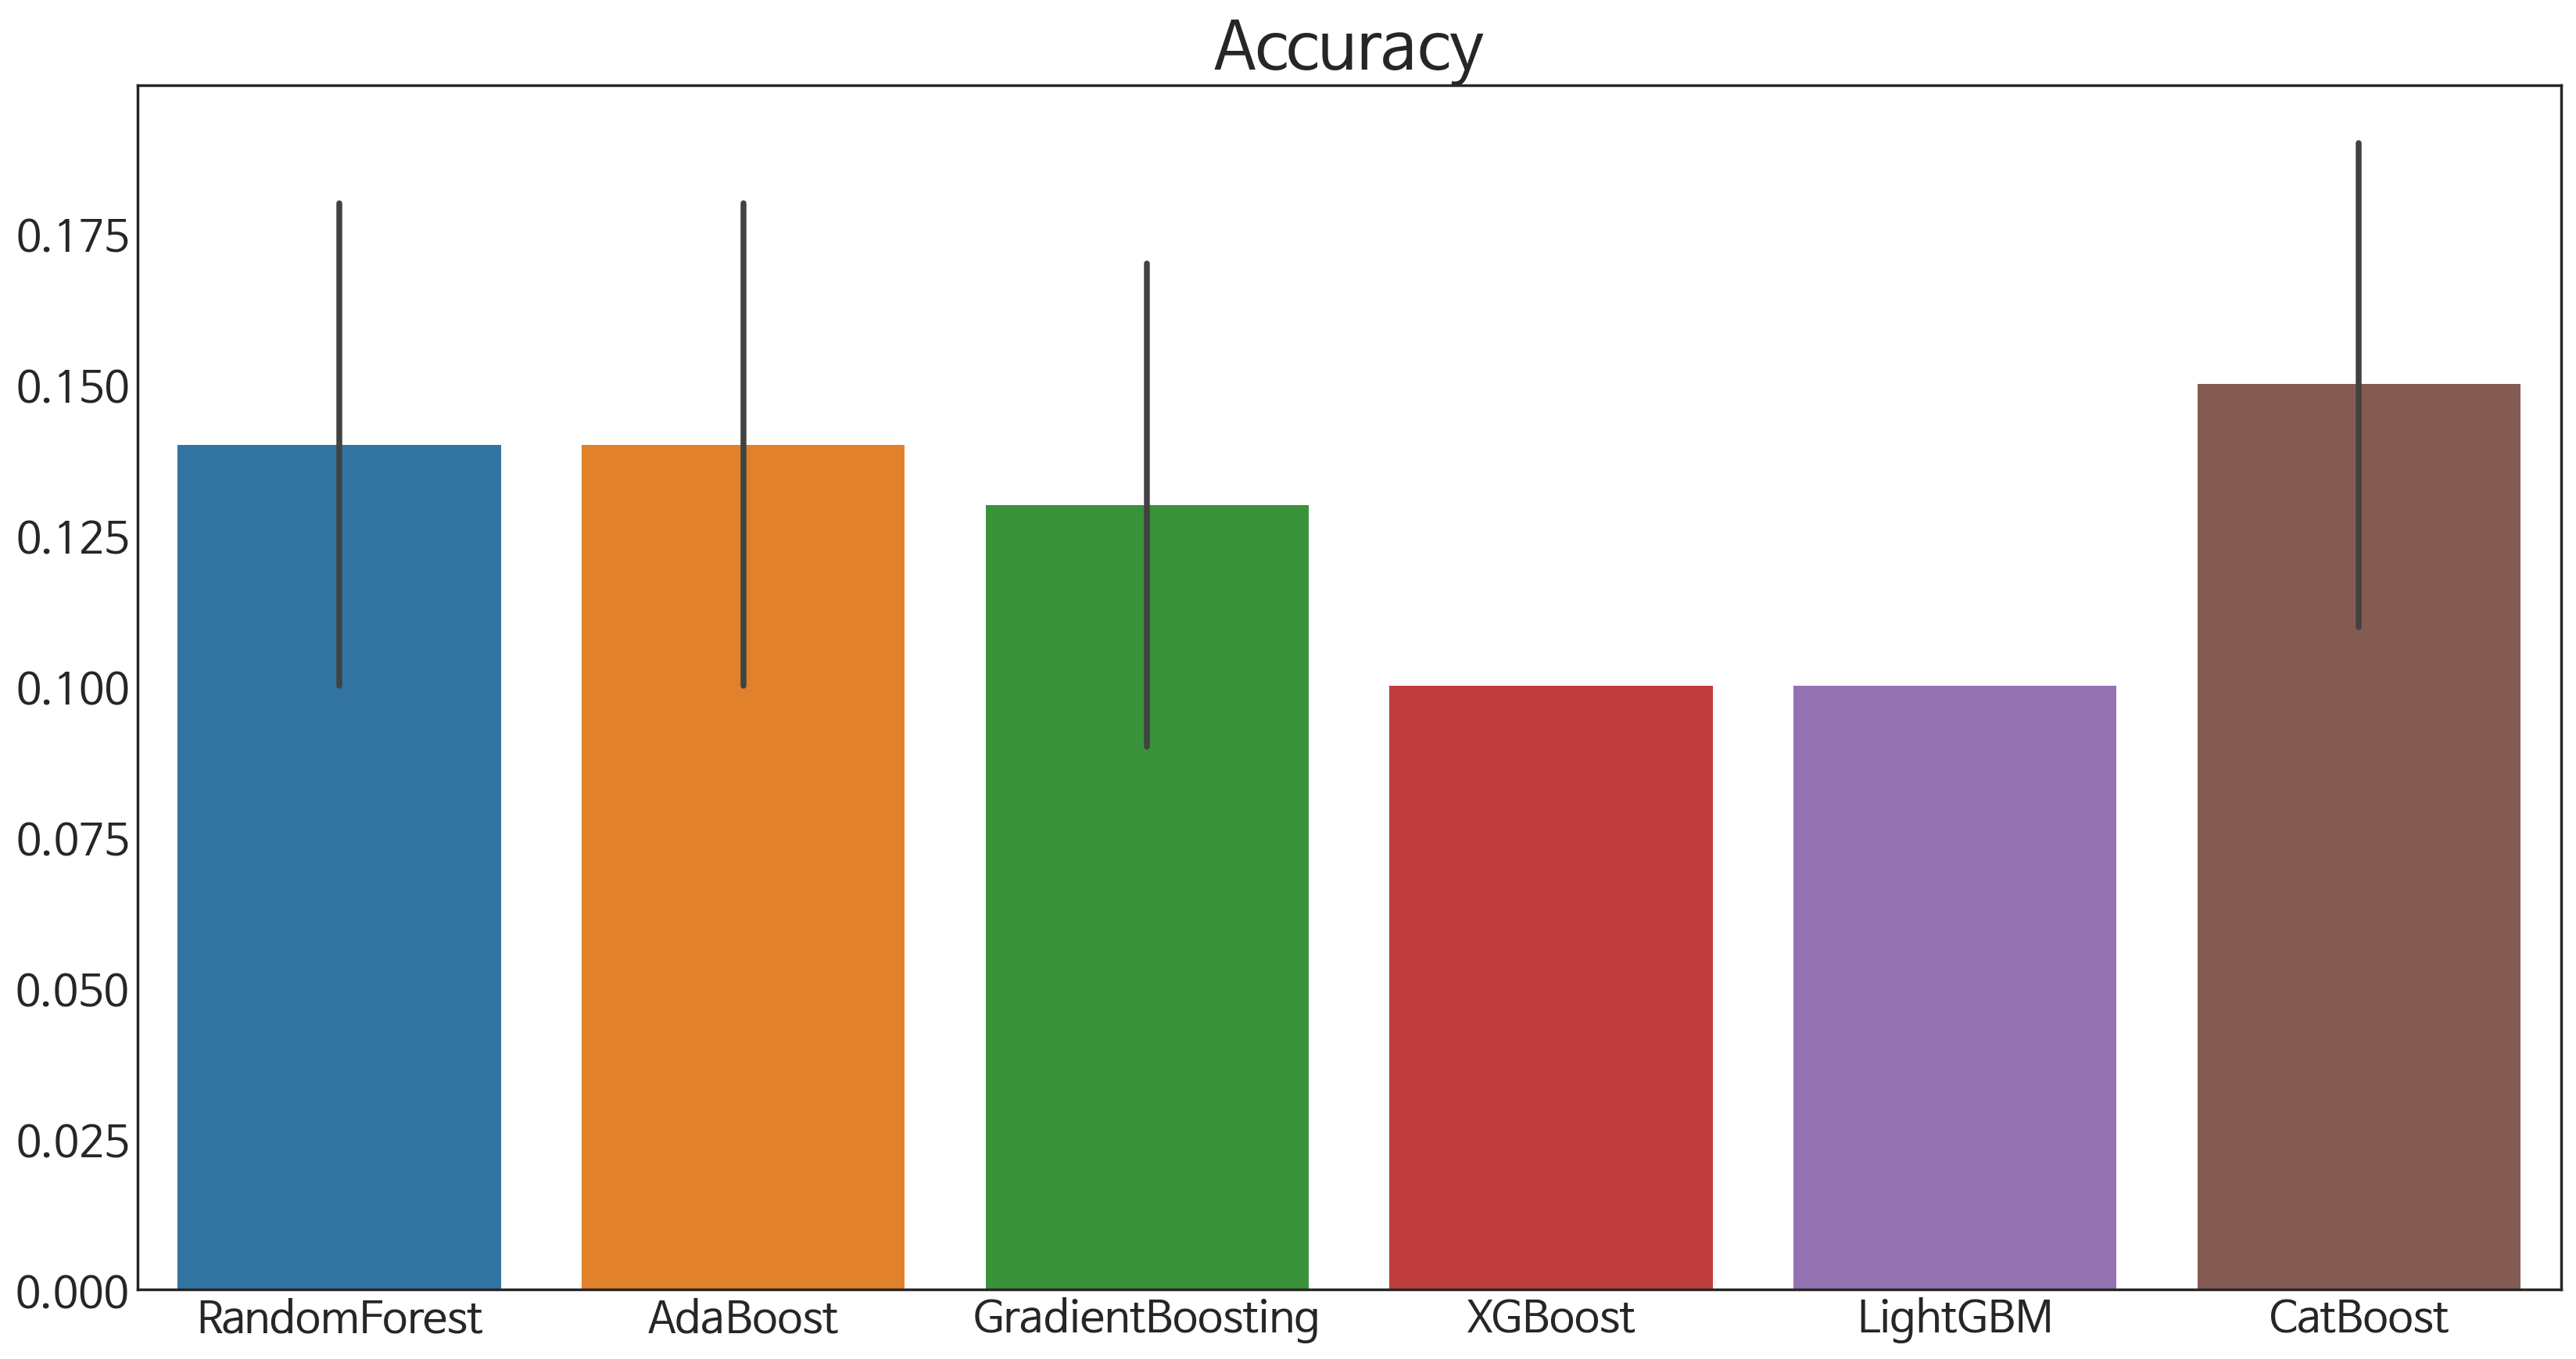

In [226]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.title('Accuracy', fontsize=30)
sns.barplot(data=df_result)
plt.show()

# wordcount

In [227]:
pre_wordcount

,arrest,baby,bro,buy,car,card,cheese,chef,cook,cool,...,skin,start,store,table,thing,time,trade,wait,yeah,label
Adopt Me!_0,0.0,0.137255,0.000000,0.035294,0.007843,0.0,0.011765,0.000000,0.000000,0.003922,...,0.0,0.000000,0.082353,0.000000,0.007843,0.031373,0.000000,0.023529,0.070588,0
Adopt Me!_1,0.0,0.000000,0.111842,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.019737,...,0.0,0.039474,0.000000,0.000000,0.019737,0.026316,0.144737,0.013158,0.019737,0
Adopt Me!_2,0.0,0.013889,0.000000,0.041667,0.000000,0.0,0.000000,0.000000,0.000000,0.027778,...,0.0,0.027778,0.000000,0.000000,0.041667,0.027778,0.388889,0.013889,0.041667,0
Adopt Me!_3,0.0,0.000000,0.000000,0.005263,0.000000,0.0,0.000000,0.000000,0.000000,0.005263,...,0.0,0.005263,0.000000,0.000000,0.005263,0.015789,0.257895,0.100000,0.015789,0
Adopt Me!_4,0.0,0.008230,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.012346,...,0.0,0.008230,0.000000,0.000000,0.008230,0.020576,0.230453,0.004115,0.004115,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Restaurant Tycoon_5,0.0,0.000000,0.023622,0.039370,0.000000,0.0,0.000000,0.000000,0.023622,0.007874,...,0.0,0.039370,0.015748,0.015748,0.015748,0.039370,0.000000,0.031496,0.015748,9
Restaurant Tycoon_6,0.0,0.000000,0.006803,0.170068,0.003401,0.0,0.006803,0.047619,0.102041,0.006803,...,0.0,0.000000,0.006803,0.047619,0.037415,0.010204,0.003401,0.054422,0.098639,9
Restaurant Tycoon_7,0.0,0.000000,0.000000,0.028302,0.000000,0.0,0.000000,0.028302,0.000000,0.018868,...,0.0,0.084906,0.009434,0.188679,0.028302,0.000000,0.000000,0.009434,0.066038,9
Restaurant Tycoon_8,0.0,0.000000,0.000000,0.036765,0.000000,0.0,0.007353,0.095588,0.022059,0.000000,...,0.0,0.014706,0.014706,0.088235,0.029412,0.022059,0.000000,0.058824,0.022059,9


## Training

In [228]:
X = pre_wordcount.iloc[:,:-1] # data
y = pre_wordcount.iloc[:,-1]  # label

In [229]:
X

,arrest,baby,bro,buy,car,card,cheese,chef,cook,cool,...,shovel,skin,start,store,table,thing,time,trade,wait,yeah
Adopt Me!_0,0.0,0.137255,0.000000,0.035294,0.007843,0.0,0.011765,0.000000,0.000000,0.003922,...,0.0,0.0,0.000000,0.082353,0.000000,0.007843,0.031373,0.000000,0.023529,0.070588
Adopt Me!_1,0.0,0.000000,0.111842,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.019737,...,0.0,0.0,0.039474,0.000000,0.000000,0.019737,0.026316,0.144737,0.013158,0.019737
Adopt Me!_2,0.0,0.013889,0.000000,0.041667,0.000000,0.0,0.000000,0.000000,0.000000,0.027778,...,0.0,0.0,0.027778,0.000000,0.000000,0.041667,0.027778,0.388889,0.013889,0.041667
Adopt Me!_3,0.0,0.000000,0.000000,0.005263,0.000000,0.0,0.000000,0.000000,0.000000,0.005263,...,0.0,0.0,0.005263,0.000000,0.000000,0.005263,0.015789,0.257895,0.100000,0.015789
Adopt Me!_4,0.0,0.008230,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.012346,...,0.0,0.0,0.008230,0.000000,0.000000,0.008230,0.020576,0.230453,0.004115,0.004115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Restaurant Tycoon_5,0.0,0.000000,0.023622,0.039370,0.000000,0.0,0.000000,0.000000,0.023622,0.007874,...,0.0,0.0,0.039370,0.015748,0.015748,0.015748,0.039370,0.000000,0.031496,0.015748
Restaurant Tycoon_6,0.0,0.000000,0.006803,0.170068,0.003401,0.0,0.006803,0.047619,0.102041,0.006803,...,0.0,0.0,0.000000,0.006803,0.047619,0.037415,0.010204,0.003401,0.054422,0.098639
Restaurant Tycoon_7,0.0,0.000000,0.000000,0.028302,0.000000,0.0,0.000000,0.028302,0.000000,0.018868,...,0.0,0.0,0.084906,0.009434,0.188679,0.028302,0.000000,0.000000,0.009434,0.066038
Restaurant Tycoon_8,0.0,0.000000,0.000000,0.036765,0.000000,0.0,0.007353,0.095588,0.022059,0.000000,...,0.0,0.0,0.014706,0.014706,0.088235,0.029412,0.022059,0.000000,0.058824,0.022059


In [230]:
y

Adopt Me!_0            0
Adopt Me!_1            0
Adopt Me!_2            0
Adopt Me!_3            0
Adopt Me!_4            0
                      ..
Restaurant Tycoon_5    9
Restaurant Tycoon_6    9
Restaurant Tycoon_7    9
Restaurant Tycoon_8    9
Restaurant Tycoon_9    9
Name: label, Length: 100, dtype: int64

### models

In [231]:
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf_ada = AdaBoostClassifier(n_estimators=1000, random_state=42)
clf_gb = GradientBoostingClassifier(n_estimators=1000, random_state=42)
clf_xgb = XGBClassifier(n_estimators=1000, random_state=42)
clf_lgb = LGBMClassifier(n_estimators=1000, random_state=42)
clf_cb = CatBoostClassifier(random_state=42)

lst_models = [clf_rf, clf_ada, clf_gb, clf_xgb, clf_lgb, clf_cb]

In [232]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, train_size=0.9, random_state=42)

In [233]:
next(iter(sss.split(X, y)))

(array([95, 93, 80, 61, 51, 20, 46, 17, 16, 71,  2, 64, 58, 59, 38, 10,  1,
        65, 23, 45, 82, 52, 97, 36, 62, 47,  0, 22, 19, 87, 32, 29, 15, 73,
        35, 81, 74, 53, 44, 98, 99, 70, 63,  5, 13, 66, 57, 89, 54, 21, 26,
        48, 43, 72, 41, 96, 28, 60, 55, 75, 33, 18, 77, 88,  9, 31, 92,  7,
        30, 86, 34, 84, 11, 68,  4,  8,  3, 79, 78, 42, 14, 37, 40, 67, 27,
        25, 50, 94, 85, 90]),
 array([76, 91, 12, 69, 56, 24,  6, 49, 39, 83]))

In [234]:
lst_accuracy = []

iteration = 0
for i, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]
    
    for model in lst_models:
        print('iter: {} / model: {}'.format(iteration, model))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        lst_accuracy.append(accuracy)
    iteration +=1

iter: 0 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
iter

143:	learn: 0.3451282	total: 547ms	remaining: 3.25s
144:	learn: 0.3414918	total: 550ms	remaining: 3.24s
145:	learn: 0.3383987	total: 553ms	remaining: 3.23s
146:	learn: 0.3347987	total: 556ms	remaining: 3.23s
147:	learn: 0.3310914	total: 559ms	remaining: 3.22s
148:	learn: 0.3274531	total: 562ms	remaining: 3.21s
149:	learn: 0.3245464	total: 566ms	remaining: 3.21s
150:	learn: 0.3212734	total: 569ms	remaining: 3.2s
151:	learn: 0.3187863	total: 572ms	remaining: 3.19s
152:	learn: 0.3160341	total: 575ms	remaining: 3.18s
153:	learn: 0.3115255	total: 578ms	remaining: 3.17s
154:	learn: 0.3086722	total: 581ms	remaining: 3.17s
155:	learn: 0.3050499	total: 584ms	remaining: 3.16s
156:	learn: 0.3027175	total: 587ms	remaining: 3.15s
157:	learn: 0.3001768	total: 590ms	remaining: 3.14s
158:	learn: 0.2971384	total: 593ms	remaining: 3.14s
159:	learn: 0.2945832	total: 596ms	remaining: 3.13s
160:	learn: 0.2913082	total: 599ms	remaining: 3.12s
161:	learn: 0.2890964	total: 602ms	remaining: 3.12s
162:	learn: 0

340:	learn: 0.1020347	total: 1.15s	remaining: 2.21s
341:	learn: 0.1016387	total: 1.15s	remaining: 2.21s
342:	learn: 0.1012199	total: 1.15s	remaining: 2.21s
343:	learn: 0.1008331	total: 1.15s	remaining: 2.2s
344:	learn: 0.1006955	total: 1.16s	remaining: 2.2s
345:	learn: 0.1001798	total: 1.16s	remaining: 2.19s
346:	learn: 0.0996397	total: 1.16s	remaining: 2.19s
347:	learn: 0.0990274	total: 1.17s	remaining: 2.19s
348:	learn: 0.0986557	total: 1.17s	remaining: 2.18s
349:	learn: 0.0983304	total: 1.17s	remaining: 2.18s
350:	learn: 0.0979691	total: 1.18s	remaining: 2.18s
351:	learn: 0.0976065	total: 1.18s	remaining: 2.17s
352:	learn: 0.0972530	total: 1.18s	remaining: 2.17s
353:	learn: 0.0970223	total: 1.19s	remaining: 2.16s
354:	learn: 0.0966552	total: 1.19s	remaining: 2.16s
355:	learn: 0.0963005	total: 1.19s	remaining: 2.16s
356:	learn: 0.0960814	total: 1.2s	remaining: 2.15s
357:	learn: 0.0957295	total: 1.2s	remaining: 2.15s
358:	learn: 0.0953576	total: 1.2s	remaining: 2.15s
359:	learn: 0.095

539:	learn: 0.0553243	total: 1.74s	remaining: 1.49s
540:	learn: 0.0550824	total: 1.75s	remaining: 1.48s
541:	learn: 0.0549395	total: 1.75s	remaining: 1.48s
542:	learn: 0.0548146	total: 1.75s	remaining: 1.48s
543:	learn: 0.0546898	total: 1.75s	remaining: 1.47s
544:	learn: 0.0545998	total: 1.76s	remaining: 1.47s
545:	learn: 0.0544537	total: 1.76s	remaining: 1.47s
546:	learn: 0.0543227	total: 1.76s	remaining: 1.46s
547:	learn: 0.0542317	total: 1.77s	remaining: 1.46s
548:	learn: 0.0541077	total: 1.77s	remaining: 1.45s
549:	learn: 0.0539980	total: 1.77s	remaining: 1.45s
550:	learn: 0.0538463	total: 1.78s	remaining: 1.45s
551:	learn: 0.0536833	total: 1.78s	remaining: 1.44s
552:	learn: 0.0534992	total: 1.78s	remaining: 1.44s
553:	learn: 0.0533758	total: 1.78s	remaining: 1.44s
554:	learn: 0.0532155	total: 1.79s	remaining: 1.43s
555:	learn: 0.0530784	total: 1.79s	remaining: 1.43s
556:	learn: 0.0529458	total: 1.79s	remaining: 1.43s
557:	learn: 0.0528066	total: 1.8s	remaining: 1.42s
558:	learn: 0

734:	learn: 0.0371622	total: 2.34s	remaining: 844ms
735:	learn: 0.0371026	total: 2.34s	remaining: 841ms
736:	learn: 0.0370431	total: 2.35s	remaining: 838ms
737:	learn: 0.0369805	total: 2.35s	remaining: 835ms
738:	learn: 0.0369020	total: 2.35s	remaining: 831ms
739:	learn: 0.0368473	total: 2.36s	remaining: 828ms
740:	learn: 0.0367641	total: 2.36s	remaining: 825ms
741:	learn: 0.0367001	total: 2.36s	remaining: 821ms
742:	learn: 0.0366286	total: 2.37s	remaining: 818ms
743:	learn: 0.0365695	total: 2.37s	remaining: 815ms
744:	learn: 0.0365248	total: 2.37s	remaining: 812ms
745:	learn: 0.0364174	total: 2.37s	remaining: 809ms
746:	learn: 0.0363477	total: 2.38s	remaining: 805ms
747:	learn: 0.0362937	total: 2.38s	remaining: 802ms
748:	learn: 0.0362262	total: 2.38s	remaining: 799ms
749:	learn: 0.0361801	total: 2.39s	remaining: 796ms
750:	learn: 0.0361220	total: 2.39s	remaining: 793ms
751:	learn: 0.0360788	total: 2.39s	remaining: 789ms
752:	learn: 0.0359757	total: 2.4s	remaining: 786ms
753:	learn: 0

930:	learn: 0.0274812	total: 2.93s	remaining: 217ms
931:	learn: 0.0274495	total: 2.94s	remaining: 214ms
932:	learn: 0.0274189	total: 2.94s	remaining: 211ms
933:	learn: 0.0273932	total: 2.94s	remaining: 208ms
934:	learn: 0.0273583	total: 2.95s	remaining: 205ms
935:	learn: 0.0273349	total: 2.95s	remaining: 202ms
936:	learn: 0.0273029	total: 2.95s	remaining: 199ms
937:	learn: 0.0272702	total: 2.96s	remaining: 195ms
938:	learn: 0.0272319	total: 2.96s	remaining: 192ms
939:	learn: 0.0271904	total: 2.96s	remaining: 189ms
940:	learn: 0.0271517	total: 2.96s	remaining: 186ms
941:	learn: 0.0271105	total: 2.97s	remaining: 183ms
942:	learn: 0.0270807	total: 2.97s	remaining: 180ms
943:	learn: 0.0270554	total: 2.97s	remaining: 176ms
944:	learn: 0.0270152	total: 2.98s	remaining: 173ms
945:	learn: 0.0269736	total: 2.98s	remaining: 170ms
946:	learn: 0.0269334	total: 2.98s	remaining: 167ms
947:	learn: 0.0268946	total: 2.99s	remaining: 164ms
948:	learn: 0.0268613	total: 2.99s	remaining: 161ms
949:	learn: 

97:	learn: 0.6235455	total: 364ms	remaining: 3.35s
98:	learn: 0.6168704	total: 367ms	remaining: 3.34s
99:	learn: 0.6064581	total: 370ms	remaining: 3.33s
100:	learn: 0.5977398	total: 373ms	remaining: 3.32s
101:	learn: 0.5882574	total: 376ms	remaining: 3.31s
102:	learn: 0.5786479	total: 380ms	remaining: 3.31s
103:	learn: 0.5718462	total: 383ms	remaining: 3.3s
104:	learn: 0.5640408	total: 386ms	remaining: 3.29s
105:	learn: 0.5542507	total: 388ms	remaining: 3.27s
106:	learn: 0.5469212	total: 392ms	remaining: 3.27s
107:	learn: 0.5394634	total: 394ms	remaining: 3.26s
108:	learn: 0.5320240	total: 397ms	remaining: 3.25s
109:	learn: 0.5239502	total: 400ms	remaining: 3.24s
110:	learn: 0.5171702	total: 404ms	remaining: 3.23s
111:	learn: 0.5107379	total: 406ms	remaining: 3.22s
112:	learn: 0.5047240	total: 410ms	remaining: 3.21s
113:	learn: 0.4972808	total: 412ms	remaining: 3.2s
114:	learn: 0.4924753	total: 415ms	remaining: 3.19s
115:	learn: 0.4853613	total: 419ms	remaining: 3.19s
116:	learn: 0.480

290:	learn: 0.1316294	total: 959ms	remaining: 2.34s
291:	learn: 0.1311064	total: 962ms	remaining: 2.33s
292:	learn: 0.1305073	total: 965ms	remaining: 2.33s
293:	learn: 0.1300073	total: 969ms	remaining: 2.33s
294:	learn: 0.1293789	total: 972ms	remaining: 2.32s
295:	learn: 0.1287716	total: 974ms	remaining: 2.32s
296:	learn: 0.1281732	total: 978ms	remaining: 2.31s
297:	learn: 0.1280314	total: 980ms	remaining: 2.31s
298:	learn: 0.1274540	total: 983ms	remaining: 2.3s
299:	learn: 0.1266710	total: 986ms	remaining: 2.3s
300:	learn: 0.1259929	total: 989ms	remaining: 2.3s
301:	learn: 0.1254038	total: 993ms	remaining: 2.29s
302:	learn: 0.1247654	total: 996ms	remaining: 2.29s
303:	learn: 0.1241640	total: 999ms	remaining: 2.29s
304:	learn: 0.1235678	total: 1s	remaining: 2.28s
305:	learn: 0.1230255	total: 1s	remaining: 2.28s
306:	learn: 0.1224505	total: 1.01s	remaining: 2.27s
307:	learn: 0.1220564	total: 1.01s	remaining: 2.27s
308:	learn: 0.1214536	total: 1.01s	remaining: 2.27s
309:	learn: 0.1209352

482:	learn: 0.0667857	total: 1.56s	remaining: 1.67s
483:	learn: 0.0666261	total: 1.56s	remaining: 1.66s
484:	learn: 0.0664566	total: 1.56s	remaining: 1.66s
485:	learn: 0.0661906	total: 1.57s	remaining: 1.66s
486:	learn: 0.0660568	total: 1.57s	remaining: 1.65s
487:	learn: 0.0658834	total: 1.57s	remaining: 1.65s
488:	learn: 0.0657561	total: 1.57s	remaining: 1.65s
489:	learn: 0.0656593	total: 1.58s	remaining: 1.64s
490:	learn: 0.0654331	total: 1.58s	remaining: 1.64s
491:	learn: 0.0651803	total: 1.58s	remaining: 1.64s
492:	learn: 0.0650029	total: 1.59s	remaining: 1.63s
493:	learn: 0.0647794	total: 1.59s	remaining: 1.63s
494:	learn: 0.0646212	total: 1.59s	remaining: 1.63s
495:	learn: 0.0644177	total: 1.6s	remaining: 1.62s
496:	learn: 0.0642419	total: 1.6s	remaining: 1.62s
497:	learn: 0.0640969	total: 1.6s	remaining: 1.62s
498:	learn: 0.0638984	total: 1.61s	remaining: 1.61s
499:	learn: 0.0637347	total: 1.61s	remaining: 1.61s
500:	learn: 0.0635554	total: 1.61s	remaining: 1.61s
501:	learn: 0.0

674:	learn: 0.0426672	total: 2.15s	remaining: 1.03s
675:	learn: 0.0426114	total: 2.15s	remaining: 1.03s
676:	learn: 0.0425172	total: 2.16s	remaining: 1.03s
677:	learn: 0.0424433	total: 2.16s	remaining: 1.02s
678:	learn: 0.0423655	total: 2.16s	remaining: 1.02s
679:	learn: 0.0422816	total: 2.17s	remaining: 1.02s
680:	learn: 0.0421862	total: 2.17s	remaining: 1.02s
681:	learn: 0.0421237	total: 2.17s	remaining: 1.01s
682:	learn: 0.0420909	total: 2.17s	remaining: 1.01s
683:	learn: 0.0420131	total: 2.18s	remaining: 1.01s
684:	learn: 0.0419273	total: 2.18s	remaining: 1s
685:	learn: 0.0418459	total: 2.18s	remaining: 1s
686:	learn: 0.0418153	total: 2.19s	remaining: 997ms
687:	learn: 0.0417724	total: 2.19s	remaining: 994ms
688:	learn: 0.0416741	total: 2.19s	remaining: 990ms
689:	learn: 0.0415888	total: 2.2s	remaining: 987ms
690:	learn: 0.0415395	total: 2.2s	remaining: 984ms
691:	learn: 0.0414370	total: 2.2s	remaining: 981ms
692:	learn: 0.0413378	total: 2.21s	remaining: 977ms
693:	learn: 0.0412619

869:	learn: 0.0310204	total: 2.75s	remaining: 411ms
870:	learn: 0.0309830	total: 2.75s	remaining: 408ms
871:	learn: 0.0309391	total: 2.76s	remaining: 405ms
872:	learn: 0.0309122	total: 2.76s	remaining: 401ms
873:	learn: 0.0308635	total: 2.76s	remaining: 398ms
874:	learn: 0.0308033	total: 2.77s	remaining: 395ms
875:	learn: 0.0307783	total: 2.77s	remaining: 392ms
876:	learn: 0.0307549	total: 2.77s	remaining: 389ms
877:	learn: 0.0307113	total: 2.77s	remaining: 386ms
878:	learn: 0.0306757	total: 2.78s	remaining: 382ms
879:	learn: 0.0306413	total: 2.78s	remaining: 379ms
880:	learn: 0.0306125	total: 2.78s	remaining: 376ms
881:	learn: 0.0305725	total: 2.79s	remaining: 373ms
882:	learn: 0.0305308	total: 2.79s	remaining: 370ms
883:	learn: 0.0304932	total: 2.79s	remaining: 367ms
884:	learn: 0.0304692	total: 2.79s	remaining: 363ms
885:	learn: 0.0304603	total: 2.8s	remaining: 360ms
886:	learn: 0.0304253	total: 2.8s	remaining: 357ms
887:	learn: 0.0303657	total: 2.81s	remaining: 354ms
888:	learn: 0.

24:	learn: 1.6695026	total: 171ms	remaining: 6.68s
25:	learn: 1.6468218	total: 174ms	remaining: 6.53s
26:	learn: 1.6293089	total: 178ms	remaining: 6.4s
27:	learn: 1.5972302	total: 180ms	remaining: 6.26s
28:	learn: 1.5796336	total: 183ms	remaining: 6.14s
29:	learn: 1.5654357	total: 186ms	remaining: 6.02s
30:	learn: 1.5458971	total: 189ms	remaining: 5.92s
31:	learn: 1.5224049	total: 192ms	remaining: 5.81s
32:	learn: 1.4979353	total: 195ms	remaining: 5.73s
33:	learn: 1.4758316	total: 198ms	remaining: 5.64s
34:	learn: 1.4567621	total: 202ms	remaining: 5.57s
35:	learn: 1.4406566	total: 205ms	remaining: 5.5s
36:	learn: 1.4230001	total: 209ms	remaining: 5.43s
37:	learn: 1.4060665	total: 211ms	remaining: 5.35s
38:	learn: 1.3909932	total: 214ms	remaining: 5.28s
39:	learn: 1.3756317	total: 217ms	remaining: 5.22s
40:	learn: 1.3610716	total: 221ms	remaining: 5.16s
41:	learn: 1.3480015	total: 224ms	remaining: 5.11s
42:	learn: 1.3326415	total: 227ms	remaining: 5.05s
43:	learn: 1.3158301	total: 230ms

217:	learn: 0.1993192	total: 765ms	remaining: 2.75s
218:	learn: 0.1976998	total: 769ms	remaining: 2.74s
219:	learn: 0.1963504	total: 771ms	remaining: 2.73s
220:	learn: 0.1950167	total: 775ms	remaining: 2.73s
221:	learn: 0.1936190	total: 777ms	remaining: 2.72s
222:	learn: 0.1922715	total: 780ms	remaining: 2.72s
223:	learn: 0.1909770	total: 784ms	remaining: 2.71s
224:	learn: 0.1900010	total: 787ms	remaining: 2.71s
225:	learn: 0.1884381	total: 790ms	remaining: 2.71s
226:	learn: 0.1870292	total: 793ms	remaining: 2.7s
227:	learn: 0.1860610	total: 795ms	remaining: 2.69s
228:	learn: 0.1849184	total: 798ms	remaining: 2.69s
229:	learn: 0.1836785	total: 801ms	remaining: 2.68s
230:	learn: 0.1826750	total: 804ms	remaining: 2.68s
231:	learn: 0.1818312	total: 808ms	remaining: 2.67s
232:	learn: 0.1807692	total: 811ms	remaining: 2.67s
233:	learn: 0.1796717	total: 814ms	remaining: 2.66s
234:	learn: 0.1786539	total: 817ms	remaining: 2.66s
235:	learn: 0.1774792	total: 820ms	remaining: 2.65s
236:	learn: 0

412:	learn: 0.0836541	total: 1.37s	remaining: 1.94s
413:	learn: 0.0833522	total: 1.37s	remaining: 1.94s
414:	learn: 0.0830997	total: 1.37s	remaining: 1.94s
415:	learn: 0.0829510	total: 1.38s	remaining: 1.93s
416:	learn: 0.0827371	total: 1.38s	remaining: 1.93s
417:	learn: 0.0824679	total: 1.38s	remaining: 1.92s
418:	learn: 0.0821849	total: 1.39s	remaining: 1.92s
419:	learn: 0.0819863	total: 1.39s	remaining: 1.92s
420:	learn: 0.0816127	total: 1.39s	remaining: 1.91s
421:	learn: 0.0813685	total: 1.39s	remaining: 1.91s
422:	learn: 0.0810896	total: 1.4s	remaining: 1.91s
423:	learn: 0.0808077	total: 1.4s	remaining: 1.9s
424:	learn: 0.0805641	total: 1.4s	remaining: 1.9s
425:	learn: 0.0803812	total: 1.41s	remaining: 1.89s
426:	learn: 0.0801826	total: 1.41s	remaining: 1.89s
427:	learn: 0.0801023	total: 1.41s	remaining: 1.89s
428:	learn: 0.0797979	total: 1.42s	remaining: 1.88s
429:	learn: 0.0795713	total: 1.42s	remaining: 1.88s
430:	learn: 0.0792679	total: 1.42s	remaining: 1.88s
431:	learn: 0.078

606:	learn: 0.0510301	total: 1.96s	remaining: 1.27s
607:	learn: 0.0509348	total: 1.96s	remaining: 1.27s
608:	learn: 0.0508236	total: 1.97s	remaining: 1.26s
609:	learn: 0.0507395	total: 1.97s	remaining: 1.26s
610:	learn: 0.0506463	total: 1.97s	remaining: 1.26s
611:	learn: 0.0505834	total: 1.98s	remaining: 1.25s
612:	learn: 0.0504728	total: 1.98s	remaining: 1.25s
613:	learn: 0.0503734	total: 1.98s	remaining: 1.25s
614:	learn: 0.0502437	total: 1.99s	remaining: 1.24s
615:	learn: 0.0501151	total: 1.99s	remaining: 1.24s
616:	learn: 0.0500175	total: 1.99s	remaining: 1.24s
617:	learn: 0.0499098	total: 1.99s	remaining: 1.23s
618:	learn: 0.0497918	total: 2s	remaining: 1.23s
619:	learn: 0.0496610	total: 2s	remaining: 1.23s
620:	learn: 0.0495729	total: 2s	remaining: 1.22s
621:	learn: 0.0494433	total: 2.01s	remaining: 1.22s
622:	learn: 0.0493399	total: 2.01s	remaining: 1.22s
623:	learn: 0.0492582	total: 2.01s	remaining: 1.21s
624:	learn: 0.0491611	total: 2.02s	remaining: 1.21s
625:	learn: 0.0490401

802:	learn: 0.0356481	total: 2.56s	remaining: 628ms
803:	learn: 0.0355952	total: 2.56s	remaining: 625ms
804:	learn: 0.0355392	total: 2.57s	remaining: 622ms
805:	learn: 0.0354841	total: 2.57s	remaining: 618ms
806:	learn: 0.0354235	total: 2.57s	remaining: 615ms
807:	learn: 0.0353672	total: 2.58s	remaining: 612ms
808:	learn: 0.0352901	total: 2.58s	remaining: 609ms
809:	learn: 0.0352330	total: 2.58s	remaining: 606ms
810:	learn: 0.0351760	total: 2.58s	remaining: 602ms
811:	learn: 0.0351377	total: 2.59s	remaining: 599ms
812:	learn: 0.0350691	total: 2.59s	remaining: 596ms
813:	learn: 0.0350051	total: 2.59s	remaining: 593ms
814:	learn: 0.0349531	total: 2.6s	remaining: 590ms
815:	learn: 0.0349042	total: 2.6s	remaining: 586ms
816:	learn: 0.0348522	total: 2.6s	remaining: 583ms
817:	learn: 0.0347782	total: 2.6s	remaining: 580ms
818:	learn: 0.0347214	total: 2.61s	remaining: 576ms
819:	learn: 0.0346572	total: 2.61s	remaining: 573ms
820:	learn: 0.0346095	total: 2.61s	remaining: 570ms
821:	learn: 0.03

998:	learn: 0.0272432	total: 3.16s	remaining: 3.16ms
999:	learn: 0.0272135	total: 3.16s	remaining: 0us
iter: 3 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 3 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 3 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 3 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=

152:	learn: 0.3218135	total: 573ms	remaining: 3.17s
153:	learn: 0.3178738	total: 575ms	remaining: 3.16s
154:	learn: 0.3150908	total: 579ms	remaining: 3.15s
155:	learn: 0.3120052	total: 582ms	remaining: 3.15s
156:	learn: 0.3089126	total: 585ms	remaining: 3.14s
157:	learn: 0.3057936	total: 588ms	remaining: 3.13s
158:	learn: 0.3029882	total: 592ms	remaining: 3.13s
159:	learn: 0.3000262	total: 594ms	remaining: 3.12s
160:	learn: 0.2973269	total: 597ms	remaining: 3.11s
161:	learn: 0.2948617	total: 600ms	remaining: 3.1s
162:	learn: 0.2923590	total: 603ms	remaining: 3.1s
163:	learn: 0.2895766	total: 606ms	remaining: 3.09s
164:	learn: 0.2871895	total: 609ms	remaining: 3.08s
165:	learn: 0.2848055	total: 612ms	remaining: 3.07s
166:	learn: 0.2822623	total: 614ms	remaining: 3.06s
167:	learn: 0.2794133	total: 618ms	remaining: 3.06s
168:	learn: 0.2770354	total: 620ms	remaining: 3.05s
169:	learn: 0.2749964	total: 623ms	remaining: 3.04s
170:	learn: 0.2724737	total: 627ms	remaining: 3.04s
171:	learn: 0.

346:	learn: 0.1029189	total: 1.17s	remaining: 2.2s
347:	learn: 0.1026040	total: 1.17s	remaining: 2.2s
348:	learn: 0.1021664	total: 1.18s	remaining: 2.19s
349:	learn: 0.1017954	total: 1.18s	remaining: 2.19s
350:	learn: 0.1013225	total: 1.18s	remaining: 2.19s
351:	learn: 0.1010169	total: 1.19s	remaining: 2.19s
352:	learn: 0.1006236	total: 1.19s	remaining: 2.18s
353:	learn: 0.1002230	total: 1.19s	remaining: 2.18s
354:	learn: 0.0998863	total: 1.2s	remaining: 2.17s
355:	learn: 0.0995198	total: 1.2s	remaining: 2.17s
356:	learn: 0.0992419	total: 1.2s	remaining: 2.17s
357:	learn: 0.0988690	total: 1.21s	remaining: 2.16s
358:	learn: 0.0984912	total: 1.21s	remaining: 2.16s
359:	learn: 0.0981044	total: 1.21s	remaining: 2.15s
360:	learn: 0.0976986	total: 1.21s	remaining: 2.15s
361:	learn: 0.0973133	total: 1.22s	remaining: 2.15s
362:	learn: 0.0968643	total: 1.22s	remaining: 2.14s
363:	learn: 0.0964829	total: 1.22s	remaining: 2.14s
364:	learn: 0.0962065	total: 1.23s	remaining: 2.13s
365:	learn: 0.095

540:	learn: 0.0568232	total: 1.77s	remaining: 1.5s
541:	learn: 0.0566664	total: 1.77s	remaining: 1.5s
542:	learn: 0.0565172	total: 1.77s	remaining: 1.49s
543:	learn: 0.0563456	total: 1.78s	remaining: 1.49s
544:	learn: 0.0561747	total: 1.78s	remaining: 1.49s
545:	learn: 0.0560052	total: 1.78s	remaining: 1.48s
546:	learn: 0.0558792	total: 1.79s	remaining: 1.48s
547:	learn: 0.0556995	total: 1.79s	remaining: 1.48s
548:	learn: 0.0555221	total: 1.79s	remaining: 1.47s
549:	learn: 0.0554135	total: 1.79s	remaining: 1.47s
550:	learn: 0.0553023	total: 1.8s	remaining: 1.47s
551:	learn: 0.0552597	total: 1.8s	remaining: 1.46s
552:	learn: 0.0551642	total: 1.8s	remaining: 1.46s
553:	learn: 0.0549769	total: 1.81s	remaining: 1.46s
554:	learn: 0.0548015	total: 1.81s	remaining: 1.45s
555:	learn: 0.0546536	total: 1.81s	remaining: 1.45s
556:	learn: 0.0544848	total: 1.82s	remaining: 1.45s
557:	learn: 0.0543641	total: 1.82s	remaining: 1.44s
558:	learn: 0.0542229	total: 1.82s	remaining: 1.44s
559:	learn: 0.054

734:	learn: 0.0384355	total: 2.37s	remaining: 853ms
735:	learn: 0.0383866	total: 2.37s	remaining: 850ms
736:	learn: 0.0383477	total: 2.37s	remaining: 846ms
737:	learn: 0.0383296	total: 2.38s	remaining: 843ms
738:	learn: 0.0382712	total: 2.38s	remaining: 840ms
739:	learn: 0.0381914	total: 2.38s	remaining: 837ms
740:	learn: 0.0381391	total: 2.38s	remaining: 834ms
741:	learn: 0.0380834	total: 2.39s	remaining: 830ms
742:	learn: 0.0380220	total: 2.39s	remaining: 827ms
743:	learn: 0.0379565	total: 2.39s	remaining: 824ms
744:	learn: 0.0378892	total: 2.4s	remaining: 820ms
745:	learn: 0.0378186	total: 2.4s	remaining: 817ms
746:	learn: 0.0377494	total: 2.4s	remaining: 814ms
747:	learn: 0.0377154	total: 2.4s	remaining: 811ms
748:	learn: 0.0376460	total: 2.41s	remaining: 807ms
749:	learn: 0.0375676	total: 2.41s	remaining: 804ms
750:	learn: 0.0375029	total: 2.42s	remaining: 801ms
751:	learn: 0.0374368	total: 2.42s	remaining: 798ms
752:	learn: 0.0373475	total: 2.42s	remaining: 795ms
753:	learn: 0.03

927:	learn: 0.0287677	total: 2.96s	remaining: 230ms
928:	learn: 0.0287328	total: 2.97s	remaining: 227ms
929:	learn: 0.0286859	total: 2.97s	remaining: 224ms
930:	learn: 0.0286471	total: 2.97s	remaining: 220ms
931:	learn: 0.0286112	total: 2.98s	remaining: 217ms
932:	learn: 0.0285657	total: 2.98s	remaining: 214ms
933:	learn: 0.0285317	total: 2.98s	remaining: 211ms
934:	learn: 0.0284861	total: 2.98s	remaining: 208ms
935:	learn: 0.0284457	total: 2.99s	remaining: 204ms
936:	learn: 0.0284140	total: 2.99s	remaining: 201ms
937:	learn: 0.0283794	total: 2.99s	remaining: 198ms
938:	learn: 0.0283468	total: 3s	remaining: 195ms
939:	learn: 0.0283341	total: 3s	remaining: 192ms
940:	learn: 0.0283046	total: 3s	remaining: 188ms
941:	learn: 0.0282672	total: 3.01s	remaining: 185ms
942:	learn: 0.0282180	total: 3.01s	remaining: 182ms
943:	learn: 0.0281831	total: 3.01s	remaining: 179ms
944:	learn: 0.0281492	total: 3.02s	remaining: 176ms
945:	learn: 0.0281118	total: 3.02s	remaining: 172ms
946:	learn: 0.0280736

113:	learn: 0.5086173	total: 380ms	remaining: 2.95s
114:	learn: 0.5029340	total: 383ms	remaining: 2.94s
115:	learn: 0.4963536	total: 386ms	remaining: 2.94s
116:	learn: 0.4889748	total: 388ms	remaining: 2.93s
117:	learn: 0.4830869	total: 391ms	remaining: 2.92s
118:	learn: 0.4760841	total: 394ms	remaining: 2.92s
119:	learn: 0.4702046	total: 397ms	remaining: 2.91s
120:	learn: 0.4647302	total: 401ms	remaining: 2.91s
121:	learn: 0.4600243	total: 404ms	remaining: 2.91s
122:	learn: 0.4537283	total: 407ms	remaining: 2.9s
123:	learn: 0.4494928	total: 409ms	remaining: 2.89s
124:	learn: 0.4439147	total: 413ms	remaining: 2.89s
125:	learn: 0.4398113	total: 416ms	remaining: 2.88s
126:	learn: 0.4358982	total: 419ms	remaining: 2.88s
127:	learn: 0.4314264	total: 422ms	remaining: 2.88s
128:	learn: 0.4275573	total: 425ms	remaining: 2.87s
129:	learn: 0.4226514	total: 429ms	remaining: 2.87s
130:	learn: 0.4184643	total: 432ms	remaining: 2.86s
131:	learn: 0.4134645	total: 434ms	remaining: 2.86s
132:	learn: 0

309:	learn: 0.1241350	total: 977ms	remaining: 2.17s
310:	learn: 0.1236252	total: 979ms	remaining: 2.17s
311:	learn: 0.1231294	total: 982ms	remaining: 2.17s
312:	learn: 0.1226092	total: 986ms	remaining: 2.16s
313:	learn: 0.1222567	total: 989ms	remaining: 2.16s
314:	learn: 0.1217144	total: 991ms	remaining: 2.15s
315:	learn: 0.1212900	total: 994ms	remaining: 2.15s
316:	learn: 0.1207386	total: 997ms	remaining: 2.15s
317:	learn: 0.1205210	total: 1s	remaining: 2.15s
318:	learn: 0.1200990	total: 1s	remaining: 2.14s
319:	learn: 0.1194826	total: 1s	remaining: 2.14s
320:	learn: 0.1189680	total: 1.01s	remaining: 2.13s
321:	learn: 0.1185951	total: 1.01s	remaining: 2.13s
322:	learn: 0.1180233	total: 1.01s	remaining: 2.13s
323:	learn: 0.1174792	total: 1.02s	remaining: 2.12s
324:	learn: 0.1168517	total: 1.02s	remaining: 2.12s
325:	learn: 0.1163826	total: 1.02s	remaining: 2.12s
326:	learn: 0.1161440	total: 1.03s	remaining: 2.11s
327:	learn: 0.1156888	total: 1.03s	remaining: 2.11s
328:	learn: 0.1153189

502:	learn: 0.0643999	total: 1.57s	remaining: 1.55s
503:	learn: 0.0642516	total: 1.58s	remaining: 1.55s
504:	learn: 0.0640607	total: 1.58s	remaining: 1.55s
505:	learn: 0.0638670	total: 1.58s	remaining: 1.54s
506:	learn: 0.0637041	total: 1.58s	remaining: 1.54s
507:	learn: 0.0635544	total: 1.59s	remaining: 1.54s
508:	learn: 0.0632759	total: 1.59s	remaining: 1.53s
509:	learn: 0.0631369	total: 1.59s	remaining: 1.53s
510:	learn: 0.0630054	total: 1.6s	remaining: 1.53s
511:	learn: 0.0628526	total: 1.6s	remaining: 1.52s
512:	learn: 0.0626486	total: 1.6s	remaining: 1.52s
513:	learn: 0.0624809	total: 1.61s	remaining: 1.52s
514:	learn: 0.0623020	total: 1.61s	remaining: 1.51s
515:	learn: 0.0621322	total: 1.61s	remaining: 1.51s
516:	learn: 0.0619356	total: 1.61s	remaining: 1.51s
517:	learn: 0.0617565	total: 1.62s	remaining: 1.51s
518:	learn: 0.0616005	total: 1.62s	remaining: 1.5s
519:	learn: 0.0614124	total: 1.62s	remaining: 1.5s
520:	learn: 0.0612560	total: 1.63s	remaining: 1.5s
521:	learn: 0.0610

695:	learn: 0.0419944	total: 2.17s	remaining: 947ms
696:	learn: 0.0419093	total: 2.17s	remaining: 944ms
697:	learn: 0.0418517	total: 2.17s	remaining: 941ms
698:	learn: 0.0417790	total: 2.18s	remaining: 938ms
699:	learn: 0.0416768	total: 2.18s	remaining: 935ms
700:	learn: 0.0416142	total: 2.18s	remaining: 932ms
701:	learn: 0.0415240	total: 2.19s	remaining: 928ms
702:	learn: 0.0414774	total: 2.19s	remaining: 925ms
703:	learn: 0.0413381	total: 2.19s	remaining: 922ms
704:	learn: 0.0412455	total: 2.2s	remaining: 919ms
705:	learn: 0.0411823	total: 2.2s	remaining: 916ms
706:	learn: 0.0410621	total: 2.2s	remaining: 913ms
707:	learn: 0.0409345	total: 2.21s	remaining: 910ms
708:	learn: 0.0408356	total: 2.21s	remaining: 907ms
709:	learn: 0.0407339	total: 2.21s	remaining: 903ms
710:	learn: 0.0406524	total: 2.21s	remaining: 900ms
711:	learn: 0.0405953	total: 2.22s	remaining: 897ms
712:	learn: 0.0405273	total: 2.22s	remaining: 894ms
713:	learn: 0.0404633	total: 2.22s	remaining: 891ms
714:	learn: 0.0

893:	learn: 0.0307102	total: 2.77s	remaining: 328ms
894:	learn: 0.0306747	total: 2.77s	remaining: 325ms
895:	learn: 0.0306284	total: 2.77s	remaining: 322ms
896:	learn: 0.0305852	total: 2.78s	remaining: 319ms
897:	learn: 0.0305504	total: 2.78s	remaining: 316ms
898:	learn: 0.0304911	total: 2.78s	remaining: 313ms
899:	learn: 0.0304560	total: 2.79s	remaining: 310ms
900:	learn: 0.0304146	total: 2.79s	remaining: 306ms
901:	learn: 0.0303762	total: 2.79s	remaining: 303ms
902:	learn: 0.0303358	total: 2.79s	remaining: 300ms
903:	learn: 0.0302924	total: 2.8s	remaining: 297ms
904:	learn: 0.0302648	total: 2.8s	remaining: 294ms
905:	learn: 0.0302279	total: 2.8s	remaining: 291ms
906:	learn: 0.0301806	total: 2.81s	remaining: 288ms
907:	learn: 0.0301433	total: 2.81s	remaining: 285ms
908:	learn: 0.0300892	total: 2.81s	remaining: 282ms
909:	learn: 0.0300427	total: 2.82s	remaining: 279ms
910:	learn: 0.0300040	total: 2.82s	remaining: 275ms
911:	learn: 0.0299634	total: 2.82s	remaining: 272ms
912:	learn: 0.0

87:	learn: 0.7195747	total: 379ms	remaining: 3.92s
88:	learn: 0.7076609	total: 382ms	remaining: 3.91s
89:	learn: 0.6972174	total: 385ms	remaining: 3.89s
90:	learn: 0.6893097	total: 388ms	remaining: 3.88s
91:	learn: 0.6766132	total: 391ms	remaining: 3.86s
92:	learn: 0.6693524	total: 394ms	remaining: 3.84s
93:	learn: 0.6621256	total: 397ms	remaining: 3.83s
94:	learn: 0.6533403	total: 400ms	remaining: 3.81s
95:	learn: 0.6440523	total: 403ms	remaining: 3.79s
96:	learn: 0.6354832	total: 406ms	remaining: 3.77s
97:	learn: 0.6230531	total: 409ms	remaining: 3.76s
98:	learn: 0.6146544	total: 411ms	remaining: 3.74s
99:	learn: 0.6033006	total: 414ms	remaining: 3.73s
100:	learn: 0.5952503	total: 417ms	remaining: 3.71s
101:	learn: 0.5875747	total: 420ms	remaining: 3.7s
102:	learn: 0.5772596	total: 423ms	remaining: 3.69s
103:	learn: 0.5685740	total: 427ms	remaining: 3.67s
104:	learn: 0.5597638	total: 430ms	remaining: 3.66s
105:	learn: 0.5501210	total: 432ms	remaining: 3.65s
106:	learn: 0.5448355	tota

283:	learn: 0.1399422	total: 975ms	remaining: 2.46s
284:	learn: 0.1392343	total: 978ms	remaining: 2.45s
285:	learn: 0.1388516	total: 981ms	remaining: 2.45s
286:	learn: 0.1382372	total: 984ms	remaining: 2.44s
287:	learn: 0.1377678	total: 987ms	remaining: 2.44s
288:	learn: 0.1373389	total: 989ms	remaining: 2.43s
289:	learn: 0.1367500	total: 992ms	remaining: 2.43s
290:	learn: 0.1361295	total: 995ms	remaining: 2.42s
291:	learn: 0.1353744	total: 998ms	remaining: 2.42s
292:	learn: 0.1347020	total: 1s	remaining: 2.42s
293:	learn: 0.1340005	total: 1s	remaining: 2.41s
294:	learn: 0.1331711	total: 1.01s	remaining: 2.41s
295:	learn: 0.1324296	total: 1.01s	remaining: 2.4s
296:	learn: 0.1318796	total: 1.01s	remaining: 2.4s
297:	learn: 0.1312787	total: 1.02s	remaining: 2.4s
298:	learn: 0.1305872	total: 1.02s	remaining: 2.39s
299:	learn: 0.1301367	total: 1.02s	remaining: 2.39s
300:	learn: 0.1294996	total: 1.03s	remaining: 2.38s
301:	learn: 0.1288988	total: 1.03s	remaining: 2.38s
302:	learn: 0.1282158

479:	learn: 0.0695254	total: 1.57s	remaining: 1.7s
480:	learn: 0.0692647	total: 1.57s	remaining: 1.7s
481:	learn: 0.0691380	total: 1.58s	remaining: 1.7s
482:	learn: 0.0690533	total: 1.58s	remaining: 1.69s
483:	learn: 0.0688090	total: 1.58s	remaining: 1.69s
484:	learn: 0.0686005	total: 1.59s	remaining: 1.68s
485:	learn: 0.0684400	total: 1.59s	remaining: 1.68s
486:	learn: 0.0682557	total: 1.59s	remaining: 1.68s
487:	learn: 0.0680889	total: 1.59s	remaining: 1.67s
488:	learn: 0.0679019	total: 1.6s	remaining: 1.67s
489:	learn: 0.0676404	total: 1.6s	remaining: 1.67s
490:	learn: 0.0675290	total: 1.6s	remaining: 1.66s
491:	learn: 0.0673219	total: 1.61s	remaining: 1.66s
492:	learn: 0.0671237	total: 1.61s	remaining: 1.65s
493:	learn: 0.0668830	total: 1.61s	remaining: 1.65s
494:	learn: 0.0666397	total: 1.61s	remaining: 1.65s
495:	learn: 0.0665403	total: 1.62s	remaining: 1.64s
496:	learn: 0.0664027	total: 1.62s	remaining: 1.64s
497:	learn: 0.0661731	total: 1.62s	remaining: 1.64s
498:	learn: 0.0660

676:	learn: 0.0445794	total: 2.17s	remaining: 1.03s
677:	learn: 0.0444860	total: 2.17s	remaining: 1.03s
678:	learn: 0.0444147	total: 2.17s	remaining: 1.03s
679:	learn: 0.0443280	total: 2.18s	remaining: 1.02s
680:	learn: 0.0442569	total: 2.18s	remaining: 1.02s
681:	learn: 0.0441568	total: 2.18s	remaining: 1.02s
682:	learn: 0.0440629	total: 2.19s	remaining: 1.01s
683:	learn: 0.0439894	total: 2.19s	remaining: 1.01s
684:	learn: 0.0439120	total: 2.19s	remaining: 1.01s
685:	learn: 0.0438183	total: 2.2s	remaining: 1s
686:	learn: 0.0437457	total: 2.2s	remaining: 1s
687:	learn: 0.0436702	total: 2.2s	remaining: 999ms
688:	learn: 0.0436070	total: 2.21s	remaining: 996ms
689:	learn: 0.0435180	total: 2.21s	remaining: 993ms
690:	learn: 0.0434314	total: 2.21s	remaining: 990ms
691:	learn: 0.0433496	total: 2.21s	remaining: 986ms
692:	learn: 0.0432835	total: 2.22s	remaining: 983ms
693:	learn: 0.0432047	total: 2.22s	remaining: 980ms
694:	learn: 0.0431368	total: 2.23s	remaining: 977ms
695:	learn: 0.0430473

873:	learn: 0.0320436	total: 2.77s	remaining: 399ms
874:	learn: 0.0319915	total: 2.77s	remaining: 396ms
875:	learn: 0.0319378	total: 2.77s	remaining: 393ms
876:	learn: 0.0318843	total: 2.78s	remaining: 390ms
877:	learn: 0.0318369	total: 2.78s	remaining: 386ms
878:	learn: 0.0318036	total: 2.78s	remaining: 383ms
879:	learn: 0.0317520	total: 2.79s	remaining: 380ms
880:	learn: 0.0316991	total: 2.79s	remaining: 377ms
881:	learn: 0.0316583	total: 2.79s	remaining: 374ms
882:	learn: 0.0316190	total: 2.8s	remaining: 371ms
883:	learn: 0.0315845	total: 2.8s	remaining: 367ms
884:	learn: 0.0315477	total: 2.8s	remaining: 364ms
885:	learn: 0.0314995	total: 2.81s	remaining: 361ms
886:	learn: 0.0314559	total: 2.81s	remaining: 358ms
887:	learn: 0.0314245	total: 2.81s	remaining: 355ms
888:	learn: 0.0313847	total: 2.81s	remaining: 351ms
889:	learn: 0.0313119	total: 2.82s	remaining: 348ms
890:	learn: 0.0312671	total: 2.82s	remaining: 345ms
891:	learn: 0.0312216	total: 2.82s	remaining: 342ms
892:	learn: 0.0

28:	learn: 1.5971893	total: 178ms	remaining: 5.95s
29:	learn: 1.5748133	total: 181ms	remaining: 5.84s
30:	learn: 1.5600807	total: 183ms	remaining: 5.74s
31:	learn: 1.5425241	total: 187ms	remaining: 5.64s
32:	learn: 1.5174848	total: 190ms	remaining: 5.56s
33:	learn: 1.4941857	total: 193ms	remaining: 5.48s
34:	learn: 1.4776805	total: 196ms	remaining: 5.41s
35:	learn: 1.4618556	total: 199ms	remaining: 5.34s
36:	learn: 1.4403256	total: 202ms	remaining: 5.26s
37:	learn: 1.4244571	total: 205ms	remaining: 5.19s
38:	learn: 1.4039904	total: 208ms	remaining: 5.13s
39:	learn: 1.3804921	total: 211ms	remaining: 5.07s
40:	learn: 1.3618763	total: 214ms	remaining: 5.01s
41:	learn: 1.3458985	total: 217ms	remaining: 4.96s
42:	learn: 1.3278064	total: 220ms	remaining: 4.89s
43:	learn: 1.3090941	total: 223ms	remaining: 4.84s
44:	learn: 1.2925270	total: 226ms	remaining: 4.79s
45:	learn: 1.2743632	total: 229ms	remaining: 4.75s
46:	learn: 1.2573179	total: 232ms	remaining: 4.7s
47:	learn: 1.2443560	total: 235m

221:	learn: 0.1869055	total: 776ms	remaining: 2.72s
222:	learn: 0.1854183	total: 779ms	remaining: 2.71s
223:	learn: 0.1841796	total: 782ms	remaining: 2.71s
224:	learn: 0.1830612	total: 785ms	remaining: 2.7s
225:	learn: 0.1819450	total: 788ms	remaining: 2.7s
226:	learn: 0.1811841	total: 791ms	remaining: 2.69s
227:	learn: 0.1800420	total: 795ms	remaining: 2.69s
228:	learn: 0.1786431	total: 798ms	remaining: 2.69s
229:	learn: 0.1777174	total: 801ms	remaining: 2.68s
230:	learn: 0.1765695	total: 804ms	remaining: 2.68s
231:	learn: 0.1755059	total: 807ms	remaining: 2.67s
232:	learn: 0.1746900	total: 810ms	remaining: 2.67s
233:	learn: 0.1737459	total: 813ms	remaining: 2.66s
234:	learn: 0.1726426	total: 816ms	remaining: 2.66s
235:	learn: 0.1723283	total: 819ms	remaining: 2.65s
236:	learn: 0.1708791	total: 822ms	remaining: 2.65s
237:	learn: 0.1700021	total: 824ms	remaining: 2.64s
238:	learn: 0.1687805	total: 828ms	remaining: 2.63s
239:	learn: 0.1679080	total: 831ms	remaining: 2.63s
240:	learn: 0.

416:	learn: 0.0799793	total: 1.37s	remaining: 1.92s
417:	learn: 0.0797385	total: 1.38s	remaining: 1.92s
418:	learn: 0.0795030	total: 1.38s	remaining: 1.91s
419:	learn: 0.0794031	total: 1.38s	remaining: 1.91s
420:	learn: 0.0792098	total: 1.39s	remaining: 1.91s
421:	learn: 0.0789883	total: 1.39s	remaining: 1.9s
422:	learn: 0.0787763	total: 1.39s	remaining: 1.9s
423:	learn: 0.0785120	total: 1.39s	remaining: 1.89s
424:	learn: 0.0782939	total: 1.4s	remaining: 1.89s
425:	learn: 0.0780244	total: 1.4s	remaining: 1.89s
426:	learn: 0.0777640	total: 1.4s	remaining: 1.88s
427:	learn: 0.0775672	total: 1.41s	remaining: 1.88s
428:	learn: 0.0773409	total: 1.41s	remaining: 1.88s
429:	learn: 0.0771092	total: 1.41s	remaining: 1.87s
430:	learn: 0.0769588	total: 1.42s	remaining: 1.87s
431:	learn: 0.0767515	total: 1.42s	remaining: 1.87s
432:	learn: 0.0764728	total: 1.42s	remaining: 1.86s
433:	learn: 0.0761924	total: 1.43s	remaining: 1.86s
434:	learn: 0.0758936	total: 1.43s	remaining: 1.85s
435:	learn: 0.075

609:	learn: 0.0488160	total: 1.97s	remaining: 1.26s
610:	learn: 0.0487172	total: 1.97s	remaining: 1.25s
611:	learn: 0.0486233	total: 1.97s	remaining: 1.25s
612:	learn: 0.0484770	total: 1.98s	remaining: 1.25s
613:	learn: 0.0483620	total: 1.98s	remaining: 1.25s
614:	learn: 0.0482558	total: 1.98s	remaining: 1.24s
615:	learn: 0.0481789	total: 1.99s	remaining: 1.24s
616:	learn: 0.0480757	total: 1.99s	remaining: 1.24s
617:	learn: 0.0479588	total: 1.99s	remaining: 1.23s
618:	learn: 0.0479043	total: 2s	remaining: 1.23s
619:	learn: 0.0478676	total: 2s	remaining: 1.23s
620:	learn: 0.0478302	total: 2s	remaining: 1.22s
621:	learn: 0.0477280	total: 2s	remaining: 1.22s
622:	learn: 0.0476207	total: 2.01s	remaining: 1.22s
623:	learn: 0.0475290	total: 2.01s	remaining: 1.21s
624:	learn: 0.0474208	total: 2.01s	remaining: 1.21s
625:	learn: 0.0473165	total: 2.02s	remaining: 1.2s
626:	learn: 0.0472139	total: 2.02s	remaining: 1.2s
627:	learn: 0.0470946	total: 2.02s	remaining: 1.2s
628:	learn: 0.0470491	total

804:	learn: 0.0345755	total: 2.56s	remaining: 621ms
805:	learn: 0.0345161	total: 2.57s	remaining: 618ms
806:	learn: 0.0344643	total: 2.57s	remaining: 615ms
807:	learn: 0.0344177	total: 2.57s	remaining: 611ms
808:	learn: 0.0343516	total: 2.58s	remaining: 608ms
809:	learn: 0.0343077	total: 2.58s	remaining: 605ms
810:	learn: 0.0342519	total: 2.58s	remaining: 601ms
811:	learn: 0.0342099	total: 2.58s	remaining: 598ms
812:	learn: 0.0341558	total: 2.59s	remaining: 595ms
813:	learn: 0.0341194	total: 2.59s	remaining: 592ms
814:	learn: 0.0340723	total: 2.59s	remaining: 589ms
815:	learn: 0.0340125	total: 2.6s	remaining: 585ms
816:	learn: 0.0339865	total: 2.6s	remaining: 582ms
817:	learn: 0.0339417	total: 2.6s	remaining: 579ms
818:	learn: 0.0338847	total: 2.6s	remaining: 576ms
819:	learn: 0.0338365	total: 2.61s	remaining: 573ms
820:	learn: 0.0337660	total: 2.61s	remaining: 569ms
821:	learn: 0.0337290	total: 2.61s	remaining: 566ms
822:	learn: 0.0336791	total: 2.62s	remaining: 563ms
823:	learn: 0.03

iter: 7 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 7 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 7 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 7 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 7 / mode

172:	learn: 0.2745604	total: 586ms	remaining: 2.8s
173:	learn: 0.2718067	total: 589ms	remaining: 2.8s
174:	learn: 0.2691545	total: 592ms	remaining: 2.79s
175:	learn: 0.2674063	total: 595ms	remaining: 2.79s
176:	learn: 0.2650540	total: 598ms	remaining: 2.78s
177:	learn: 0.2634932	total: 600ms	remaining: 2.77s
178:	learn: 0.2613327	total: 603ms	remaining: 2.77s
179:	learn: 0.2596640	total: 607ms	remaining: 2.77s
180:	learn: 0.2577025	total: 610ms	remaining: 2.76s
181:	learn: 0.2550306	total: 614ms	remaining: 2.76s
182:	learn: 0.2530689	total: 617ms	remaining: 2.75s
183:	learn: 0.2508762	total: 620ms	remaining: 2.75s
184:	learn: 0.2488397	total: 623ms	remaining: 2.75s
185:	learn: 0.2465310	total: 626ms	remaining: 2.74s
186:	learn: 0.2448332	total: 629ms	remaining: 2.74s
187:	learn: 0.2431093	total: 632ms	remaining: 2.73s
188:	learn: 0.2418027	total: 635ms	remaining: 2.73s
189:	learn: 0.2401941	total: 638ms	remaining: 2.72s
190:	learn: 0.2380382	total: 642ms	remaining: 2.72s
191:	learn: 0.

365:	learn: 0.1012164	total: 1.18s	remaining: 2.05s
366:	learn: 0.1010381	total: 1.19s	remaining: 2.05s
367:	learn: 0.1005194	total: 1.19s	remaining: 2.04s
368:	learn: 0.1001743	total: 1.19s	remaining: 2.04s
369:	learn: 0.0998445	total: 1.2s	remaining: 2.04s
370:	learn: 0.0995042	total: 1.2s	remaining: 2.04s
371:	learn: 0.0990447	total: 1.2s	remaining: 2.03s
372:	learn: 0.0987432	total: 1.21s	remaining: 2.03s
373:	learn: 0.0984988	total: 1.21s	remaining: 2.02s
374:	learn: 0.0980824	total: 1.21s	remaining: 2.02s
375:	learn: 0.0977080	total: 1.22s	remaining: 2.02s
376:	learn: 0.0972181	total: 1.22s	remaining: 2.01s
377:	learn: 0.0968261	total: 1.22s	remaining: 2.01s
378:	learn: 0.0963699	total: 1.23s	remaining: 2.01s
379:	learn: 0.0959985	total: 1.23s	remaining: 2s
380:	learn: 0.0956131	total: 1.23s	remaining: 2s
381:	learn: 0.0952947	total: 1.24s	remaining: 2s
382:	learn: 0.0948871	total: 1.24s	remaining: 2s
383:	learn: 0.0945871	total: 1.24s	remaining: 1.99s
384:	learn: 0.0944677	total

561:	learn: 0.0570655	total: 1.78s	remaining: 1.39s
562:	learn: 0.0569364	total: 1.79s	remaining: 1.39s
563:	learn: 0.0568079	total: 1.79s	remaining: 1.38s
564:	learn: 0.0566621	total: 1.79s	remaining: 1.38s
565:	learn: 0.0564908	total: 1.8s	remaining: 1.38s
566:	learn: 0.0563623	total: 1.8s	remaining: 1.37s
567:	learn: 0.0562874	total: 1.8s	remaining: 1.37s
568:	learn: 0.0561322	total: 1.81s	remaining: 1.37s
569:	learn: 0.0560095	total: 1.81s	remaining: 1.36s
570:	learn: 0.0558428	total: 1.81s	remaining: 1.36s
571:	learn: 0.0557394	total: 1.81s	remaining: 1.36s
572:	learn: 0.0555394	total: 1.82s	remaining: 1.35s
573:	learn: 0.0554492	total: 1.82s	remaining: 1.35s
574:	learn: 0.0553145	total: 1.82s	remaining: 1.35s
575:	learn: 0.0551955	total: 1.83s	remaining: 1.35s
576:	learn: 0.0550523	total: 1.83s	remaining: 1.34s
577:	learn: 0.0549325	total: 1.83s	remaining: 1.34s
578:	learn: 0.0548273	total: 1.84s	remaining: 1.34s
579:	learn: 0.0546786	total: 1.84s	remaining: 1.33s
580:	learn: 0.0

755:	learn: 0.0390277	total: 2.38s	remaining: 769ms
756:	learn: 0.0389468	total: 2.38s	remaining: 766ms
757:	learn: 0.0388758	total: 2.39s	remaining: 763ms
758:	learn: 0.0388018	total: 2.39s	remaining: 760ms
759:	learn: 0.0387067	total: 2.39s	remaining: 756ms
760:	learn: 0.0386419	total: 2.4s	remaining: 753ms
761:	learn: 0.0385912	total: 2.4s	remaining: 750ms
762:	learn: 0.0385460	total: 2.4s	remaining: 747ms
763:	learn: 0.0384810	total: 2.41s	remaining: 743ms
764:	learn: 0.0384020	total: 2.41s	remaining: 740ms
765:	learn: 0.0383522	total: 2.41s	remaining: 737ms
766:	learn: 0.0383043	total: 2.42s	remaining: 734ms
767:	learn: 0.0382559	total: 2.42s	remaining: 731ms
768:	learn: 0.0381886	total: 2.42s	remaining: 728ms
769:	learn: 0.0381214	total: 2.42s	remaining: 724ms
770:	learn: 0.0380839	total: 2.43s	remaining: 721ms
771:	learn: 0.0380092	total: 2.43s	remaining: 718ms
772:	learn: 0.0379237	total: 2.43s	remaining: 715ms
773:	learn: 0.0378648	total: 2.44s	remaining: 712ms
774:	learn: 0.0

948:	learn: 0.0292031	total: 2.98s	remaining: 160ms
949:	learn: 0.0291773	total: 2.98s	remaining: 157ms
950:	learn: 0.0291459	total: 2.98s	remaining: 154ms
951:	learn: 0.0291094	total: 2.99s	remaining: 151ms
952:	learn: 0.0290784	total: 2.99s	remaining: 147ms
953:	learn: 0.0290535	total: 2.99s	remaining: 144ms
954:	learn: 0.0290079	total: 3s	remaining: 141ms
955:	learn: 0.0289924	total: 3s	remaining: 138ms
956:	learn: 0.0289777	total: 3s	remaining: 135ms
957:	learn: 0.0289371	total: 3s	remaining: 132ms
958:	learn: 0.0288971	total: 3.01s	remaining: 129ms
959:	learn: 0.0288734	total: 3.01s	remaining: 125ms
960:	learn: 0.0288280	total: 3.01s	remaining: 122ms
961:	learn: 0.0287914	total: 3.02s	remaining: 119ms
962:	learn: 0.0287490	total: 3.02s	remaining: 116ms
963:	learn: 0.0287120	total: 3.02s	remaining: 113ms
964:	learn: 0.0286854	total: 3.02s	remaining: 110ms
965:	learn: 0.0286439	total: 3.03s	remaining: 107ms
966:	learn: 0.0286077	total: 3.03s	remaining: 103ms
967:	learn: 0.0285780	to

87:	learn: 0.7286900	total: 364ms	remaining: 3.77s
88:	learn: 0.7211073	total: 367ms	remaining: 3.76s
89:	learn: 0.7131613	total: 370ms	remaining: 3.74s
90:	learn: 0.6998322	total: 373ms	remaining: 3.72s
91:	learn: 0.6859830	total: 376ms	remaining: 3.71s
92:	learn: 0.6765688	total: 379ms	remaining: 3.69s
93:	learn: 0.6678758	total: 382ms	remaining: 3.68s
94:	learn: 0.6562369	total: 385ms	remaining: 3.67s
95:	learn: 0.6462578	total: 388ms	remaining: 3.66s
96:	learn: 0.6383361	total: 391ms	remaining: 3.64s
97:	learn: 0.6280968	total: 394ms	remaining: 3.62s
98:	learn: 0.6175857	total: 397ms	remaining: 3.61s
99:	learn: 0.6102177	total: 400ms	remaining: 3.6s
100:	learn: 0.6023385	total: 403ms	remaining: 3.58s
101:	learn: 0.5923747	total: 406ms	remaining: 3.57s
102:	learn: 0.5817236	total: 408ms	remaining: 3.56s
103:	learn: 0.5740197	total: 412ms	remaining: 3.55s
104:	learn: 0.5643267	total: 415ms	remaining: 3.54s
105:	learn: 0.5558942	total: 418ms	remaining: 3.52s
106:	learn: 0.5471757	tota

282:	learn: 0.1381162	total: 960ms	remaining: 2.43s
283:	learn: 0.1373627	total: 963ms	remaining: 2.43s
284:	learn: 0.1365801	total: 966ms	remaining: 2.42s
285:	learn: 0.1356179	total: 969ms	remaining: 2.42s
286:	learn: 0.1347332	total: 972ms	remaining: 2.42s
287:	learn: 0.1343148	total: 975ms	remaining: 2.41s
288:	learn: 0.1337119	total: 979ms	remaining: 2.41s
289:	learn: 0.1331217	total: 982ms	remaining: 2.4s
290:	learn: 0.1322023	total: 985ms	remaining: 2.4s
291:	learn: 0.1316613	total: 989ms	remaining: 2.4s
292:	learn: 0.1311326	total: 992ms	remaining: 2.39s
293:	learn: 0.1300721	total: 995ms	remaining: 2.39s
294:	learn: 0.1296876	total: 998ms	remaining: 2.38s
295:	learn: 0.1288263	total: 1s	remaining: 2.38s
296:	learn: 0.1281765	total: 1s	remaining: 2.38s
297:	learn: 0.1277110	total: 1.01s	remaining: 2.37s
298:	learn: 0.1271254	total: 1.01s	remaining: 2.37s
299:	learn: 0.1262236	total: 1.01s	remaining: 2.36s
300:	learn: 0.1253274	total: 1.02s	remaining: 2.36s
301:	learn: 0.1246149

476:	learn: 0.0657610	total: 1.56s	remaining: 1.71s
477:	learn: 0.0656108	total: 1.56s	remaining: 1.7s
478:	learn: 0.0654837	total: 1.56s	remaining: 1.7s
479:	learn: 0.0653256	total: 1.57s	remaining: 1.7s
480:	learn: 0.0651534	total: 1.57s	remaining: 1.69s
481:	learn: 0.0650554	total: 1.57s	remaining: 1.69s
482:	learn: 0.0648714	total: 1.58s	remaining: 1.69s
483:	learn: 0.0646073	total: 1.58s	remaining: 1.68s
484:	learn: 0.0644076	total: 1.58s	remaining: 1.68s
485:	learn: 0.0642329	total: 1.58s	remaining: 1.68s
486:	learn: 0.0640478	total: 1.59s	remaining: 1.67s
487:	learn: 0.0639352	total: 1.59s	remaining: 1.67s
488:	learn: 0.0637346	total: 1.59s	remaining: 1.66s
489:	learn: 0.0635594	total: 1.59s	remaining: 1.66s
490:	learn: 0.0634106	total: 1.6s	remaining: 1.66s
491:	learn: 0.0632349	total: 1.6s	remaining: 1.65s
492:	learn: 0.0631482	total: 1.6s	remaining: 1.65s
493:	learn: 0.0629646	total: 1.61s	remaining: 1.65s
494:	learn: 0.0627915	total: 1.61s	remaining: 1.64s
495:	learn: 0.0625

671:	learn: 0.0420820	total: 2.15s	remaining: 1.05s
672:	learn: 0.0420029	total: 2.16s	remaining: 1.05s
673:	learn: 0.0419232	total: 2.16s	remaining: 1.04s
674:	learn: 0.0418264	total: 2.16s	remaining: 1.04s
675:	learn: 0.0417337	total: 2.17s	remaining: 1.04s
676:	learn: 0.0416711	total: 2.17s	remaining: 1.03s
677:	learn: 0.0416247	total: 2.17s	remaining: 1.03s
678:	learn: 0.0415217	total: 2.18s	remaining: 1.03s
679:	learn: 0.0414427	total: 2.18s	remaining: 1.03s
680:	learn: 0.0413454	total: 2.18s	remaining: 1.02s
681:	learn: 0.0412918	total: 2.19s	remaining: 1.02s
682:	learn: 0.0412165	total: 2.19s	remaining: 1.02s
683:	learn: 0.0411340	total: 2.19s	remaining: 1.01s
684:	learn: 0.0410602	total: 2.19s	remaining: 1.01s
685:	learn: 0.0409920	total: 2.2s	remaining: 1.01s
686:	learn: 0.0409171	total: 2.2s	remaining: 1s
687:	learn: 0.0408246	total: 2.2s	remaining: 1000ms
688:	learn: 0.0407447	total: 2.21s	remaining: 996ms
689:	learn: 0.0406538	total: 2.21s	remaining: 993ms
690:	learn: 0.040

867:	learn: 0.0304658	total: 2.75s	remaining: 418ms
868:	learn: 0.0303925	total: 2.75s	remaining: 415ms
869:	learn: 0.0303474	total: 2.76s	remaining: 412ms
870:	learn: 0.0302959	total: 2.76s	remaining: 409ms
871:	learn: 0.0302534	total: 2.76s	remaining: 406ms
872:	learn: 0.0302075	total: 2.77s	remaining: 402ms
873:	learn: 0.0301670	total: 2.77s	remaining: 399ms
874:	learn: 0.0301173	total: 2.77s	remaining: 396ms
875:	learn: 0.0300784	total: 2.77s	remaining: 393ms
876:	learn: 0.0300386	total: 2.78s	remaining: 390ms
877:	learn: 0.0299879	total: 2.78s	remaining: 387ms
878:	learn: 0.0299358	total: 2.78s	remaining: 383ms
879:	learn: 0.0298879	total: 2.79s	remaining: 380ms
880:	learn: 0.0298486	total: 2.79s	remaining: 377ms
881:	learn: 0.0297950	total: 2.79s	remaining: 374ms
882:	learn: 0.0297322	total: 2.8s	remaining: 371ms
883:	learn: 0.0296908	total: 2.8s	remaining: 367ms
884:	learn: 0.0296524	total: 2.8s	remaining: 364ms
885:	learn: 0.0296138	total: 2.81s	remaining: 361ms
886:	learn: 0.0

32:	learn: 1.4779041	total: 193ms	remaining: 5.66s
33:	learn: 1.4521827	total: 196ms	remaining: 5.57s
34:	learn: 1.4349330	total: 199ms	remaining: 5.5s
35:	learn: 1.4195558	total: 202ms	remaining: 5.42s
36:	learn: 1.4032200	total: 206ms	remaining: 5.37s
37:	learn: 1.3833221	total: 210ms	remaining: 5.32s
38:	learn: 1.3676505	total: 214ms	remaining: 5.27s
39:	learn: 1.3490994	total: 218ms	remaining: 5.22s
40:	learn: 1.3325558	total: 220ms	remaining: 5.16s
41:	learn: 1.3168519	total: 223ms	remaining: 5.1s
42:	learn: 1.2932061	total: 227ms	remaining: 5.05s
43:	learn: 1.2738066	total: 230ms	remaining: 5s
44:	learn: 1.2579434	total: 233ms	remaining: 4.95s
45:	learn: 1.2443443	total: 236ms	remaining: 4.89s
46:	learn: 1.2278979	total: 240ms	remaining: 4.86s
47:	learn: 1.2069050	total: 242ms	remaining: 4.81s
48:	learn: 1.1867644	total: 246ms	remaining: 4.77s
49:	learn: 1.1643835	total: 249ms	remaining: 4.72s
50:	learn: 1.1506067	total: 252ms	remaining: 4.68s
51:	learn: 1.1361945	total: 254ms	re

226:	learn: 0.1779797	total: 791ms	remaining: 2.69s
227:	learn: 0.1770067	total: 793ms	remaining: 2.69s
228:	learn: 0.1762500	total: 796ms	remaining: 2.68s
229:	learn: 0.1749485	total: 799ms	remaining: 2.67s
230:	learn: 0.1740359	total: 802ms	remaining: 2.67s
231:	learn: 0.1725868	total: 805ms	remaining: 2.67s
232:	learn: 0.1716324	total: 809ms	remaining: 2.66s
233:	learn: 0.1704721	total: 812ms	remaining: 2.66s
234:	learn: 0.1698426	total: 815ms	remaining: 2.65s
235:	learn: 0.1690456	total: 818ms	remaining: 2.65s
236:	learn: 0.1681867	total: 822ms	remaining: 2.65s
237:	learn: 0.1673744	total: 825ms	remaining: 2.64s
238:	learn: 0.1664267	total: 828ms	remaining: 2.64s
239:	learn: 0.1655988	total: 831ms	remaining: 2.63s
240:	learn: 0.1647272	total: 835ms	remaining: 2.63s
241:	learn: 0.1635665	total: 837ms	remaining: 2.62s
242:	learn: 0.1624064	total: 840ms	remaining: 2.62s
243:	learn: 0.1613440	total: 843ms	remaining: 2.61s
244:	learn: 0.1601928	total: 847ms	remaining: 2.61s
245:	learn: 

422:	learn: 0.0755860	total: 1.39s	remaining: 1.89s
423:	learn: 0.0753036	total: 1.39s	remaining: 1.89s
424:	learn: 0.0750908	total: 1.39s	remaining: 1.88s
425:	learn: 0.0747777	total: 1.4s	remaining: 1.88s
426:	learn: 0.0745362	total: 1.4s	remaining: 1.88s
427:	learn: 0.0743517	total: 1.4s	remaining: 1.87s
428:	learn: 0.0741435	total: 1.41s	remaining: 1.87s
429:	learn: 0.0738650	total: 1.41s	remaining: 1.87s
430:	learn: 0.0736127	total: 1.41s	remaining: 1.86s
431:	learn: 0.0733578	total: 1.41s	remaining: 1.86s
432:	learn: 0.0731037	total: 1.42s	remaining: 1.86s
433:	learn: 0.0728767	total: 1.42s	remaining: 1.85s
434:	learn: 0.0726483	total: 1.42s	remaining: 1.85s
435:	learn: 0.0724253	total: 1.43s	remaining: 1.84s
436:	learn: 0.0720890	total: 1.43s	remaining: 1.84s
437:	learn: 0.0719072	total: 1.43s	remaining: 1.84s
438:	learn: 0.0716669	total: 1.44s	remaining: 1.83s
439:	learn: 0.0714923	total: 1.44s	remaining: 1.83s
440:	learn: 0.0712295	total: 1.44s	remaining: 1.83s
441:	learn: 0.0

618:	learn: 0.0456521	total: 1.98s	remaining: 1.22s
619:	learn: 0.0455595	total: 1.99s	remaining: 1.22s
620:	learn: 0.0454383	total: 1.99s	remaining: 1.21s
621:	learn: 0.0453167	total: 1.99s	remaining: 1.21s
622:	learn: 0.0451989	total: 2s	remaining: 1.21s
623:	learn: 0.0450853	total: 2s	remaining: 1.2s
624:	learn: 0.0449604	total: 2s	remaining: 1.2s
625:	learn: 0.0448762	total: 2s	remaining: 1.2s
626:	learn: 0.0447557	total: 2.01s	remaining: 1.19s
627:	learn: 0.0446799	total: 2.01s	remaining: 1.19s
628:	learn: 0.0445609	total: 2.01s	remaining: 1.19s
629:	learn: 0.0444844	total: 2.02s	remaining: 1.18s
630:	learn: 0.0444008	total: 2.02s	remaining: 1.18s
631:	learn: 0.0443207	total: 2.02s	remaining: 1.18s
632:	learn: 0.0442321	total: 2.03s	remaining: 1.17s
633:	learn: 0.0441264	total: 2.03s	remaining: 1.17s
634:	learn: 0.0440370	total: 2.03s	remaining: 1.17s
635:	learn: 0.0439688	total: 2.03s	remaining: 1.16s
636:	learn: 0.0438910	total: 2.04s	remaining: 1.16s
637:	learn: 0.0438151	total

815:	learn: 0.0321254	total: 2.58s	remaining: 583ms
816:	learn: 0.0320866	total: 2.59s	remaining: 580ms
817:	learn: 0.0320519	total: 2.59s	remaining: 576ms
818:	learn: 0.0320099	total: 2.59s	remaining: 573ms
819:	learn: 0.0319638	total: 2.6s	remaining: 570ms
820:	learn: 0.0319317	total: 2.6s	remaining: 567ms
821:	learn: 0.0318823	total: 2.6s	remaining: 564ms
822:	learn: 0.0318290	total: 2.61s	remaining: 561ms
823:	learn: 0.0317732	total: 2.61s	remaining: 558ms
824:	learn: 0.0317297	total: 2.61s	remaining: 554ms
825:	learn: 0.0316729	total: 2.62s	remaining: 551ms
826:	learn: 0.0316340	total: 2.62s	remaining: 548ms
827:	learn: 0.0315583	total: 2.62s	remaining: 545ms
828:	learn: 0.0315191	total: 2.63s	remaining: 542ms
829:	learn: 0.0314649	total: 2.63s	remaining: 539ms
830:	learn: 0.0314227	total: 2.63s	remaining: 535ms
831:	learn: 0.0313919	total: 2.63s	remaining: 532ms
832:	learn: 0.0313473	total: 2.64s	remaining: 529ms
833:	learn: 0.0313073	total: 2.64s	remaining: 526ms
834:	learn: 0.0

## Evaluation

In [235]:
data = np.array(lst_accuracy).reshape(-1, 6)

In [236]:
df_result = pd.DataFrame(data=data, columns=['RandomForest', 'AdaBoost', 'GradientBoosting', 'XGBoost', 'LightGBM', 'CatBoost'])

In [237]:
df_result

,RandomForest,AdaBoost,GradientBoosting,XGBoost,LightGBM,CatBoost
0,0.7,0.3,0.6,0.7,0.7,0.7
1,0.7,0.3,0.6,0.7,0.6,0.7
2,0.9,0.3,0.8,0.8,0.5,1.0
3,0.9,0.3,0.7,0.8,0.6,0.8
4,0.9,0.3,0.8,0.8,0.6,0.8
5,0.8,0.3,0.5,0.7,0.7,0.8
6,0.8,0.3,0.5,0.7,0.6,0.7
7,0.7,0.3,0.7,0.8,0.6,0.7
8,0.7,0.2,0.5,0.5,0.5,0.7
9,0.7,0.3,0.6,0.6,0.5,0.7


In [238]:
df_result.to_excel('./result_wordcount_norm.xlsx')

### visualization

In [239]:
df_result = pd.read_excel('result_wordcount_norm.xlsx', index_col=0)

In [240]:
df_result

,RandomForest,AdaBoost,GradientBoosting,XGBoost,LightGBM,CatBoost
0,0.7,0.3,0.6,0.7,0.7,0.7
1,0.7,0.3,0.6,0.7,0.6,0.7
2,0.9,0.3,0.8,0.8,0.5,1.0
3,0.9,0.3,0.7,0.8,0.6,0.8
4,0.9,0.3,0.8,0.8,0.6,0.8
5,0.8,0.3,0.5,0.7,0.7,0.8
6,0.8,0.3,0.5,0.7,0.6,0.7
7,0.7,0.3,0.7,0.8,0.6,0.7
8,0.7,0.2,0.5,0.5,0.5,0.7
9,0.7,0.3,0.6,0.6,0.5,0.7


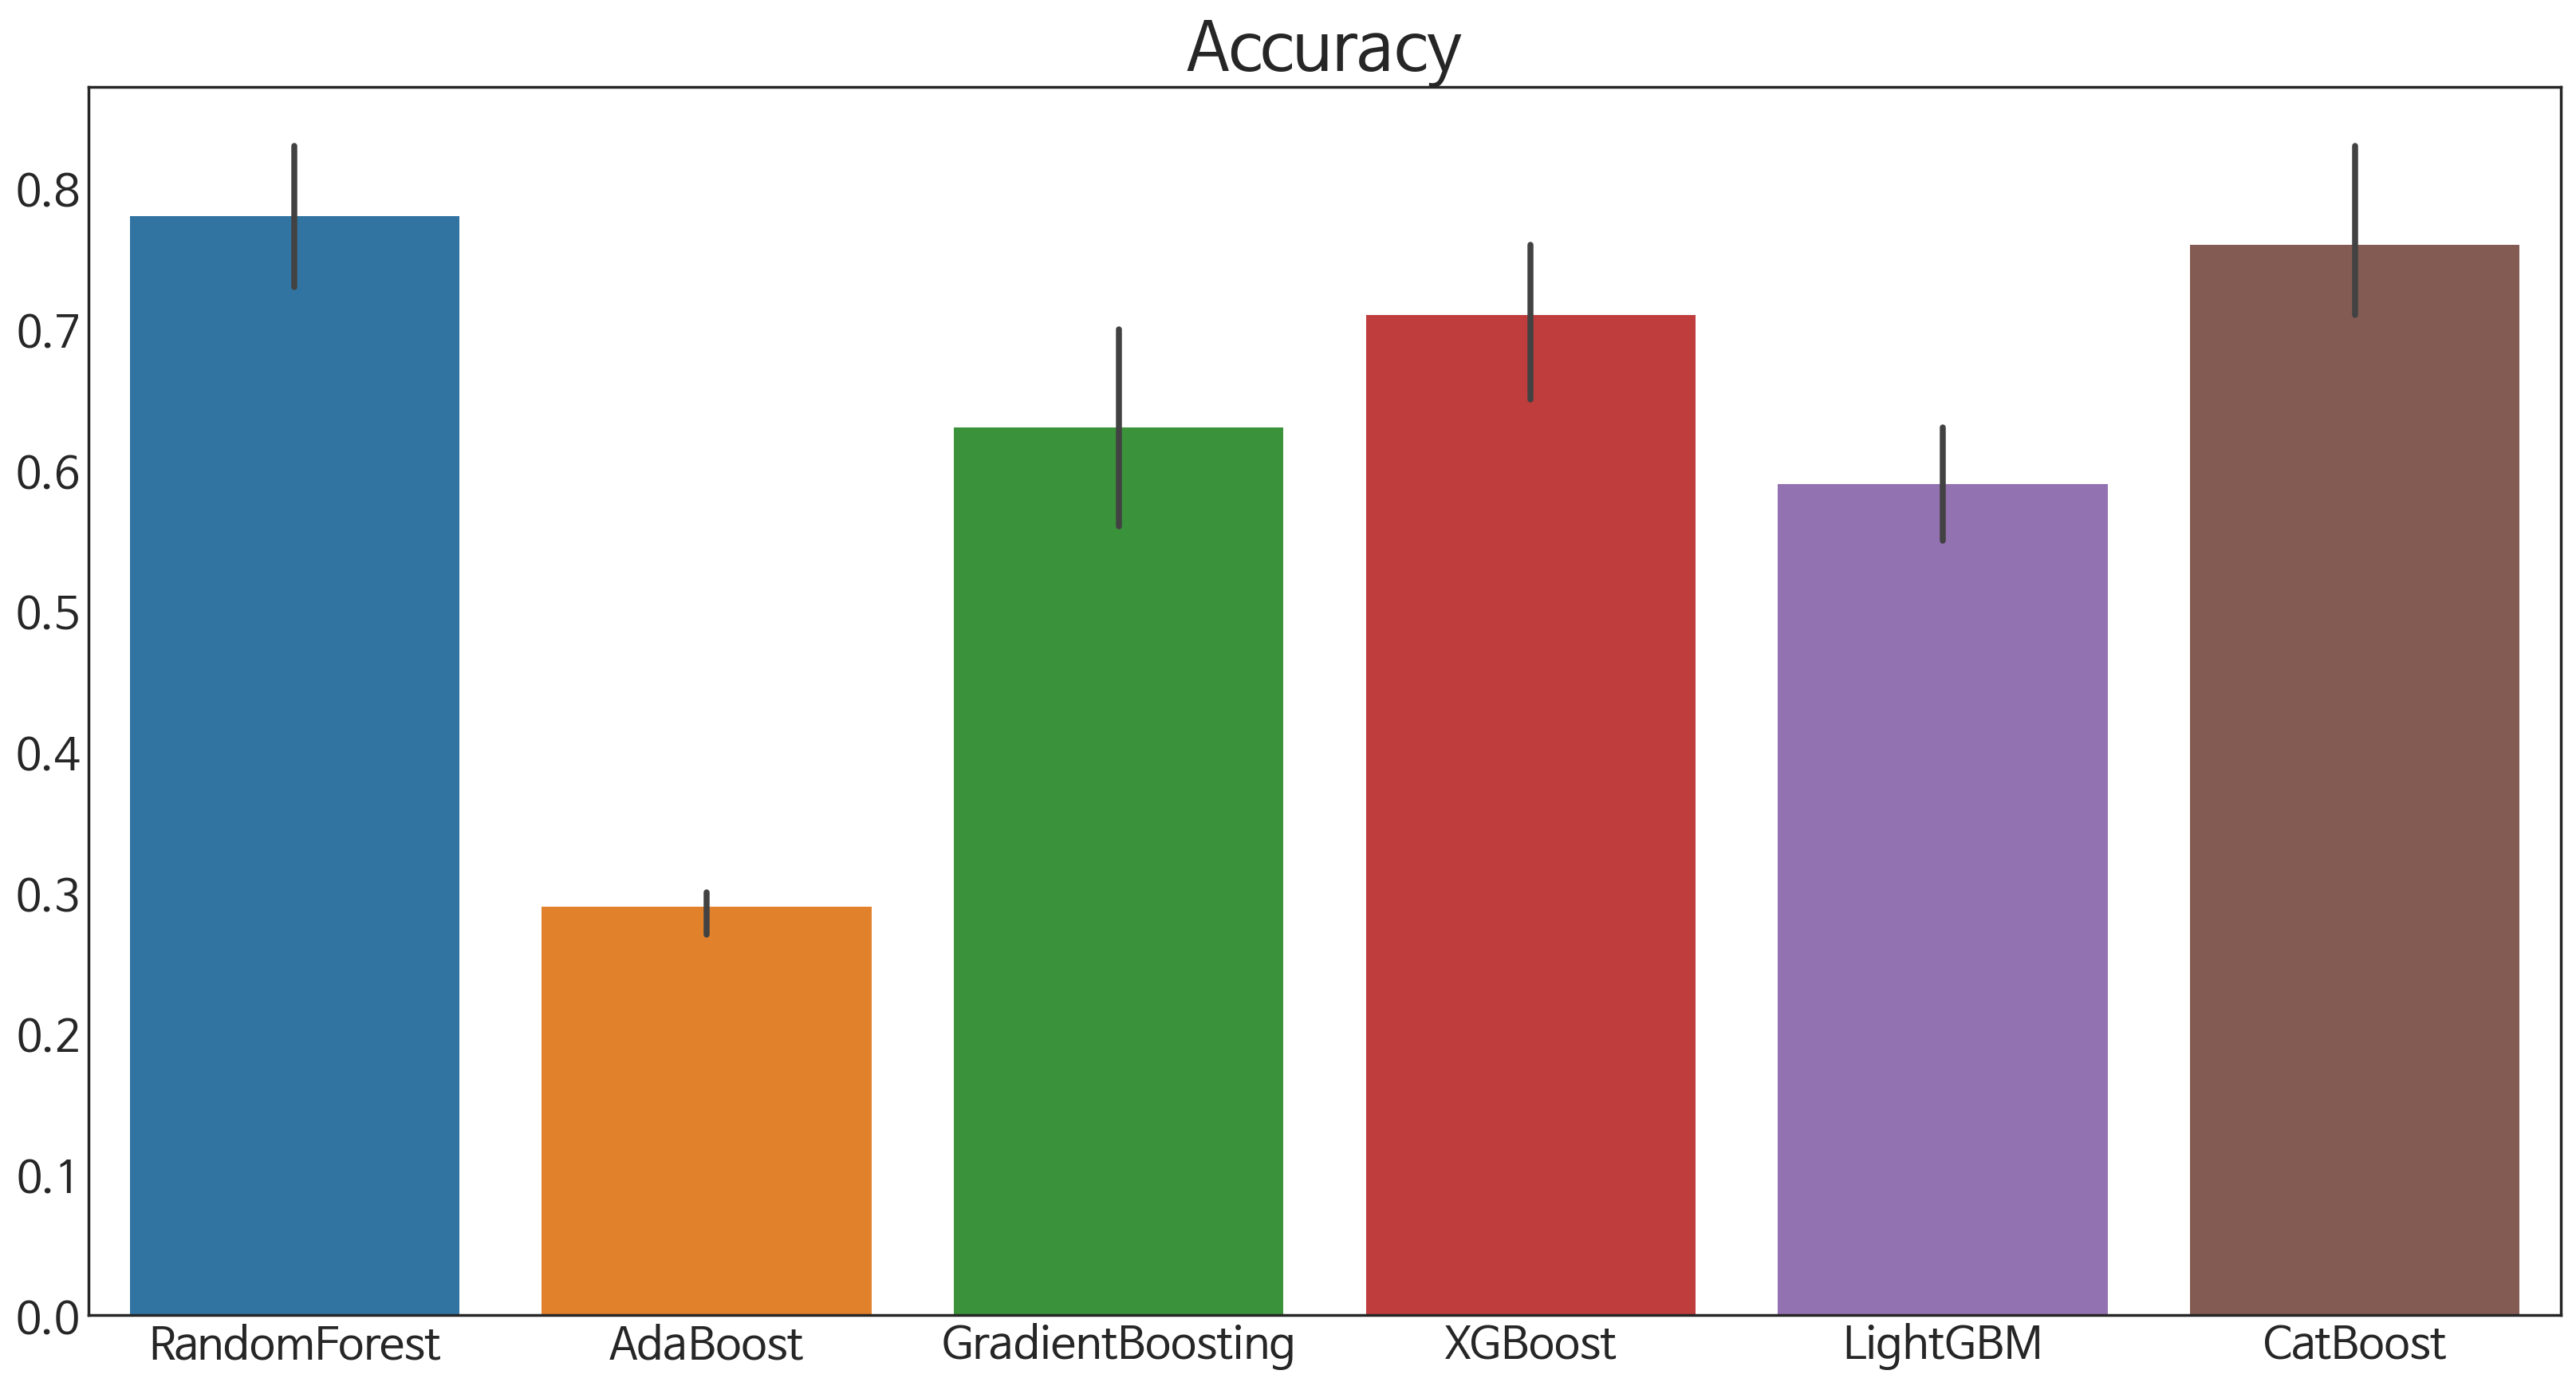

In [241]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.title('Accuracy', fontsize=30)
sns.barplot(data=df_result)
plt.show()

# tfidf

## Training

In [242]:
X = pre_tfidf.iloc[:,:-1] # data
y = pre_tfidf.iloc[:,-1]  # label

In [243]:
X

,adopt,arrest,bella,blocksburg,bro,buy,car,card,carrot,checkpoint,...,shovel,skin,skirt,table,time,tower,trade,wait,waiter,yeah
Adopt Me!_0,0.078212,0.0,0.0,0.0,0.000000,0.050279,0.011173,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.044693,0.00000,0.000000,0.033520,0.000000,0.100559
Adopt Me!_1,0.007299,0.0,0.0,0.0,0.124088,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.029197,0.00000,0.160584,0.014599,0.000000,0.021898
Adopt Me!_2,0.000000,0.0,0.0,0.0,0.000000,0.035714,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.023810,0.00000,0.333333,0.011905,0.000000,0.035714
Adopt Me!_3,0.053571,0.0,0.0,0.0,0.000000,0.005952,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.017857,0.00000,0.291667,0.113095,0.000000,0.017857
Adopt Me!_4,0.024390,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.020325,0.00813,0.227642,0.004065,0.000000,0.004065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Restaurant Tycoon_5,0.000000,0.0,0.0,0.0,0.031250,0.052083,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.020833,0.052083,0.00000,0.000000,0.041667,0.000000,0.020833
Restaurant Tycoon_6,0.000000,0.0,0.0,0.0,0.007634,0.190840,0.003817,0.0,0.0,0.0,...,0.0,0.0,0.0,0.053435,0.011450,0.00000,0.003817,0.061069,0.068702,0.110687
Restaurant Tycoon_7,0.000000,0.0,0.0,0.0,0.000000,0.032258,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.215054,0.000000,0.00000,0.000000,0.010753,0.000000,0.075269
Restaurant Tycoon_8,0.000000,0.0,0.0,0.0,0.000000,0.034722,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.083333,0.020833,0.00000,0.000000,0.055556,0.097222,0.020833


In [244]:
y

Adopt Me!_0            0
Adopt Me!_1            0
Adopt Me!_2            0
Adopt Me!_3            0
Adopt Me!_4            0
                      ..
Restaurant Tycoon_5    9
Restaurant Tycoon_6    9
Restaurant Tycoon_7    9
Restaurant Tycoon_8    9
Restaurant Tycoon_9    9
Name: label, Length: 100, dtype: int64

### models

In [245]:
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf_ada = AdaBoostClassifier(n_estimators=1000, random_state=42)
clf_gb = GradientBoostingClassifier(n_estimators=1000, random_state=42)
clf_xgb = XGBClassifier(n_estimators=1000, random_state=42)
clf_lgb = LGBMClassifier(n_estimators=1000, random_state=42)
clf_cb = CatBoostClassifier(random_state=42)

lst_models = [clf_rf, clf_ada, clf_gb, clf_xgb, clf_lgb, clf_cb]

In [246]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, train_size=0.9, random_state=42)

In [247]:
next(iter(sss.split(X, y)))

(array([95, 93, 80, 61, 51, 20, 46, 17, 16, 71,  2, 64, 58, 59, 38, 10,  1,
        65, 23, 45, 82, 52, 97, 36, 62, 47,  0, 22, 19, 87, 32, 29, 15, 73,
        35, 81, 74, 53, 44, 98, 99, 70, 63,  5, 13, 66, 57, 89, 54, 21, 26,
        48, 43, 72, 41, 96, 28, 60, 55, 75, 33, 18, 77, 88,  9, 31, 92,  7,
        30, 86, 34, 84, 11, 68,  4,  8,  3, 79, 78, 42, 14, 37, 40, 67, 27,
        25, 50, 94, 85, 90]),
 array([76, 91, 12, 69, 56, 24,  6, 49, 39, 83]))

In [248]:
lst_accuracy = []

iteration = 0
for i, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]
    
    for model in lst_models:
        print('iter: {} / model: {}'.format(iteration, model))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        lst_accuracy.append(accuracy)
    iteration +=1

iter: 0 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
iter

165:	learn: 0.2310762	total: 560ms	remaining: 2.81s
166:	learn: 0.2288447	total: 563ms	remaining: 2.81s
167:	learn: 0.2273333	total: 566ms	remaining: 2.8s
168:	learn: 0.2250070	total: 569ms	remaining: 2.79s
169:	learn: 0.2232807	total: 571ms	remaining: 2.79s
170:	learn: 0.2214089	total: 574ms	remaining: 2.78s
171:	learn: 0.2191291	total: 578ms	remaining: 2.78s
172:	learn: 0.2181648	total: 580ms	remaining: 2.77s
173:	learn: 0.2163932	total: 583ms	remaining: 2.77s
174:	learn: 0.2145778	total: 586ms	remaining: 2.76s
175:	learn: 0.2125112	total: 588ms	remaining: 2.75s
176:	learn: 0.2108388	total: 592ms	remaining: 2.75s
177:	learn: 0.2093657	total: 594ms	remaining: 2.74s
178:	learn: 0.2075442	total: 597ms	remaining: 2.74s
179:	learn: 0.2064815	total: 601ms	remaining: 2.74s
180:	learn: 0.2045926	total: 604ms	remaining: 2.73s
181:	learn: 0.2032984	total: 606ms	remaining: 2.73s
182:	learn: 0.2014896	total: 609ms	remaining: 2.72s
183:	learn: 0.1998906	total: 612ms	remaining: 2.71s
184:	learn: 0

377:	learn: 0.0716371	total: 1.16s	remaining: 1.91s
378:	learn: 0.0714025	total: 1.16s	remaining: 1.9s
379:	learn: 0.0711649	total: 1.16s	remaining: 1.9s
380:	learn: 0.0709509	total: 1.17s	remaining: 1.9s
381:	learn: 0.0708080	total: 1.17s	remaining: 1.89s
382:	learn: 0.0706290	total: 1.17s	remaining: 1.89s
383:	learn: 0.0703431	total: 1.17s	remaining: 1.88s
384:	learn: 0.0701834	total: 1.18s	remaining: 1.88s
385:	learn: 0.0700197	total: 1.18s	remaining: 1.88s
386:	learn: 0.0697893	total: 1.18s	remaining: 1.88s
387:	learn: 0.0695960	total: 1.19s	remaining: 1.87s
388:	learn: 0.0692837	total: 1.19s	remaining: 1.87s
389:	learn: 0.0690023	total: 1.19s	remaining: 1.86s
390:	learn: 0.0688274	total: 1.2s	remaining: 1.86s
391:	learn: 0.0685354	total: 1.2s	remaining: 1.86s
392:	learn: 0.0682701	total: 1.2s	remaining: 1.85s
393:	learn: 0.0681857	total: 1.2s	remaining: 1.85s
394:	learn: 0.0679205	total: 1.21s	remaining: 1.85s
395:	learn: 0.0676636	total: 1.21s	remaining: 1.84s
396:	learn: 0.06748

592:	learn: 0.0399352	total: 1.75s	remaining: 1.2s
593:	learn: 0.0398136	total: 1.76s	remaining: 1.2s
594:	learn: 0.0397148	total: 1.76s	remaining: 1.2s
595:	learn: 0.0396321	total: 1.76s	remaining: 1.19s
596:	learn: 0.0395271	total: 1.76s	remaining: 1.19s
597:	learn: 0.0394335	total: 1.77s	remaining: 1.19s
598:	learn: 0.0393523	total: 1.77s	remaining: 1.19s
599:	learn: 0.0392850	total: 1.77s	remaining: 1.18s
600:	learn: 0.0391953	total: 1.77s	remaining: 1.18s
601:	learn: 0.0390931	total: 1.78s	remaining: 1.18s
602:	learn: 0.0390315	total: 1.78s	remaining: 1.17s
603:	learn: 0.0389508	total: 1.78s	remaining: 1.17s
604:	learn: 0.0388658	total: 1.79s	remaining: 1.17s
605:	learn: 0.0387750	total: 1.79s	remaining: 1.16s
606:	learn: 0.0387270	total: 1.79s	remaining: 1.16s
607:	learn: 0.0386605	total: 1.79s	remaining: 1.16s
608:	learn: 0.0385646	total: 1.8s	remaining: 1.15s
609:	learn: 0.0384649	total: 1.8s	remaining: 1.15s
610:	learn: 0.0383899	total: 1.8s	remaining: 1.15s
611:	learn: 0.0383

806:	learn: 0.0270145	total: 2.35s	remaining: 563ms
807:	learn: 0.0269810	total: 2.36s	remaining: 560ms
808:	learn: 0.0269316	total: 2.36s	remaining: 557ms
809:	learn: 0.0269026	total: 2.36s	remaining: 554ms
810:	learn: 0.0268717	total: 2.37s	remaining: 551ms
811:	learn: 0.0268362	total: 2.37s	remaining: 548ms
812:	learn: 0.0267977	total: 2.37s	remaining: 545ms
813:	learn: 0.0267584	total: 2.37s	remaining: 542ms
814:	learn: 0.0266978	total: 2.38s	remaining: 539ms
815:	learn: 0.0266550	total: 2.38s	remaining: 536ms
816:	learn: 0.0266360	total: 2.38s	remaining: 533ms
817:	learn: 0.0265937	total: 2.38s	remaining: 530ms
818:	learn: 0.0265460	total: 2.39s	remaining: 528ms
819:	learn: 0.0265037	total: 2.39s	remaining: 525ms
820:	learn: 0.0264798	total: 2.39s	remaining: 522ms
821:	learn: 0.0264137	total: 2.4s	remaining: 519ms
822:	learn: 0.0263880	total: 2.4s	remaining: 516ms
823:	learn: 0.0263535	total: 2.4s	remaining: 513ms
824:	learn: 0.0263240	total: 2.4s	remaining: 510ms
825:	learn: 0.02

iter: 1 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 1 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 1 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 1 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 1 / model: <catb

163:	learn: 0.2373913	total: 536ms	remaining: 2.73s
164:	learn: 0.2353405	total: 540ms	remaining: 2.73s
165:	learn: 0.2330956	total: 542ms	remaining: 2.72s
166:	learn: 0.2319108	total: 545ms	remaining: 2.72s
167:	learn: 0.2299931	total: 548ms	remaining: 2.71s
168:	learn: 0.2274505	total: 551ms	remaining: 2.71s
169:	learn: 0.2254871	total: 553ms	remaining: 2.7s
170:	learn: 0.2237992	total: 556ms	remaining: 2.7s
171:	learn: 0.2220752	total: 559ms	remaining: 2.69s
172:	learn: 0.2206465	total: 563ms	remaining: 2.69s
173:	learn: 0.2188993	total: 566ms	remaining: 2.68s
174:	learn: 0.2171966	total: 569ms	remaining: 2.68s
175:	learn: 0.2155503	total: 572ms	remaining: 2.68s
176:	learn: 0.2138548	total: 575ms	remaining: 2.67s
177:	learn: 0.2123464	total: 578ms	remaining: 2.67s
178:	learn: 0.2104832	total: 581ms	remaining: 2.66s
179:	learn: 0.2094848	total: 583ms	remaining: 2.66s
180:	learn: 0.2078714	total: 586ms	remaining: 2.65s
181:	learn: 0.2060008	total: 589ms	remaining: 2.65s
182:	learn: 0.

373:	learn: 0.0709020	total: 1.13s	remaining: 1.89s
374:	learn: 0.0706057	total: 1.13s	remaining: 1.89s
375:	learn: 0.0704060	total: 1.14s	remaining: 1.89s
376:	learn: 0.0702035	total: 1.14s	remaining: 1.88s
377:	learn: 0.0698657	total: 1.14s	remaining: 1.88s
378:	learn: 0.0696448	total: 1.15s	remaining: 1.88s
379:	learn: 0.0694126	total: 1.15s	remaining: 1.87s
380:	learn: 0.0692112	total: 1.15s	remaining: 1.87s
381:	learn: 0.0691349	total: 1.15s	remaining: 1.87s
382:	learn: 0.0689086	total: 1.16s	remaining: 1.86s
383:	learn: 0.0686984	total: 1.16s	remaining: 1.86s
384:	learn: 0.0684455	total: 1.16s	remaining: 1.85s
385:	learn: 0.0682280	total: 1.16s	remaining: 1.85s
386:	learn: 0.0679325	total: 1.17s	remaining: 1.85s
387:	learn: 0.0676130	total: 1.17s	remaining: 1.84s
388:	learn: 0.0674689	total: 1.17s	remaining: 1.84s
389:	learn: 0.0672613	total: 1.18s	remaining: 1.84s
390:	learn: 0.0670573	total: 1.18s	remaining: 1.83s
391:	learn: 0.0667073	total: 1.18s	remaining: 1.83s
392:	learn: 

584:	learn: 0.0390186	total: 1.73s	remaining: 1.23s
585:	learn: 0.0389194	total: 1.73s	remaining: 1.22s
586:	learn: 0.0388151	total: 1.73s	remaining: 1.22s
587:	learn: 0.0387408	total: 1.74s	remaining: 1.22s
588:	learn: 0.0386360	total: 1.74s	remaining: 1.21s
589:	learn: 0.0385515	total: 1.74s	remaining: 1.21s
590:	learn: 0.0384425	total: 1.75s	remaining: 1.21s
591:	learn: 0.0383550	total: 1.75s	remaining: 1.21s
592:	learn: 0.0382714	total: 1.75s	remaining: 1.2s
593:	learn: 0.0381956	total: 1.75s	remaining: 1.2s
594:	learn: 0.0381227	total: 1.76s	remaining: 1.2s
595:	learn: 0.0380328	total: 1.76s	remaining: 1.19s
596:	learn: 0.0379285	total: 1.76s	remaining: 1.19s
597:	learn: 0.0378372	total: 1.76s	remaining: 1.19s
598:	learn: 0.0377548	total: 1.77s	remaining: 1.18s
599:	learn: 0.0376450	total: 1.77s	remaining: 1.18s
600:	learn: 0.0375624	total: 1.77s	remaining: 1.18s
601:	learn: 0.0374994	total: 1.78s	remaining: 1.17s
602:	learn: 0.0374477	total: 1.78s	remaining: 1.17s
603:	learn: 0.0

795:	learn: 0.0264246	total: 2.32s	remaining: 595ms
796:	learn: 0.0263737	total: 2.33s	remaining: 593ms
797:	learn: 0.0263368	total: 2.33s	remaining: 590ms
798:	learn: 0.0262954	total: 2.33s	remaining: 587ms
799:	learn: 0.0262622	total: 2.33s	remaining: 584ms
800:	learn: 0.0262387	total: 2.34s	remaining: 581ms
801:	learn: 0.0261968	total: 2.34s	remaining: 578ms
802:	learn: 0.0261692	total: 2.34s	remaining: 575ms
803:	learn: 0.0261454	total: 2.35s	remaining: 572ms
804:	learn: 0.0260958	total: 2.35s	remaining: 569ms
805:	learn: 0.0260592	total: 2.35s	remaining: 566ms
806:	learn: 0.0260208	total: 2.35s	remaining: 563ms
807:	learn: 0.0259688	total: 2.36s	remaining: 560ms
808:	learn: 0.0259239	total: 2.36s	remaining: 557ms
809:	learn: 0.0258796	total: 2.36s	remaining: 554ms
810:	learn: 0.0258474	total: 2.37s	remaining: 552ms
811:	learn: 0.0258058	total: 2.37s	remaining: 549ms
812:	learn: 0.0257789	total: 2.37s	remaining: 546ms
813:	learn: 0.0257418	total: 2.37s	remaining: 543ms
814:	learn: 

iter: 2 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 2 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 2 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 2 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 2 / mode

169:	learn: 0.2364519	total: 582ms	remaining: 2.84s
170:	learn: 0.2342687	total: 585ms	remaining: 2.84s
171:	learn: 0.2318400	total: 589ms	remaining: 2.83s
172:	learn: 0.2298582	total: 592ms	remaining: 2.83s
173:	learn: 0.2279951	total: 595ms	remaining: 2.82s
174:	learn: 0.2271167	total: 598ms	remaining: 2.82s
175:	learn: 0.2244390	total: 601ms	remaining: 2.81s
176:	learn: 0.2234210	total: 603ms	remaining: 2.8s
177:	learn: 0.2218123	total: 606ms	remaining: 2.8s
178:	learn: 0.2196627	total: 609ms	remaining: 2.79s
179:	learn: 0.2185762	total: 612ms	remaining: 2.79s
180:	learn: 0.2171097	total: 615ms	remaining: 2.78s
181:	learn: 0.2146861	total: 618ms	remaining: 2.78s
182:	learn: 0.2131947	total: 621ms	remaining: 2.77s
183:	learn: 0.2115771	total: 623ms	remaining: 2.76s
184:	learn: 0.2095010	total: 626ms	remaining: 2.76s
185:	learn: 0.2082775	total: 629ms	remaining: 2.75s
186:	learn: 0.2063677	total: 632ms	remaining: 2.75s
187:	learn: 0.2048671	total: 635ms	remaining: 2.74s
188:	learn: 0.

377:	learn: 0.0757610	total: 1.18s	remaining: 1.94s
378:	learn: 0.0755774	total: 1.18s	remaining: 1.93s
379:	learn: 0.0752765	total: 1.18s	remaining: 1.93s
380:	learn: 0.0750344	total: 1.19s	remaining: 1.93s
381:	learn: 0.0748392	total: 1.19s	remaining: 1.92s
382:	learn: 0.0746304	total: 1.19s	remaining: 1.92s
383:	learn: 0.0744066	total: 1.19s	remaining: 1.91s
384:	learn: 0.0741720	total: 1.2s	remaining: 1.91s
385:	learn: 0.0738530	total: 1.2s	remaining: 1.91s
386:	learn: 0.0735475	total: 1.2s	remaining: 1.9s
387:	learn: 0.0733611	total: 1.2s	remaining: 1.9s
388:	learn: 0.0731462	total: 1.21s	remaining: 1.9s
389:	learn: 0.0729360	total: 1.21s	remaining: 1.89s
390:	learn: 0.0727170	total: 1.21s	remaining: 1.89s
391:	learn: 0.0724276	total: 1.22s	remaining: 1.89s
392:	learn: 0.0721398	total: 1.22s	remaining: 1.88s
393:	learn: 0.0717835	total: 1.22s	remaining: 1.88s
394:	learn: 0.0716567	total: 1.22s	remaining: 1.88s
395:	learn: 0.0714625	total: 1.23s	remaining: 1.87s
396:	learn: 0.07107

589:	learn: 0.0417150	total: 1.77s	remaining: 1.23s
590:	learn: 0.0416034	total: 1.78s	remaining: 1.23s
591:	learn: 0.0414885	total: 1.78s	remaining: 1.23s
592:	learn: 0.0414017	total: 1.78s	remaining: 1.22s
593:	learn: 0.0412658	total: 1.78s	remaining: 1.22s
594:	learn: 0.0411551	total: 1.79s	remaining: 1.22s
595:	learn: 0.0411009	total: 1.79s	remaining: 1.21s
596:	learn: 0.0410063	total: 1.79s	remaining: 1.21s
597:	learn: 0.0409191	total: 1.8s	remaining: 1.21s
598:	learn: 0.0408161	total: 1.8s	remaining: 1.2s
599:	learn: 0.0407797	total: 1.8s	remaining: 1.2s
600:	learn: 0.0406821	total: 1.8s	remaining: 1.2s
601:	learn: 0.0405834	total: 1.81s	remaining: 1.2s
602:	learn: 0.0405161	total: 1.81s	remaining: 1.19s
603:	learn: 0.0404090	total: 1.81s	remaining: 1.19s
604:	learn: 0.0403030	total: 1.82s	remaining: 1.19s
605:	learn: 0.0402089	total: 1.82s	remaining: 1.18s
606:	learn: 0.0401212	total: 1.82s	remaining: 1.18s
607:	learn: 0.0400157	total: 1.82s	remaining: 1.18s
608:	learn: 0.039933

796:	learn: 0.0285111	total: 2.37s	remaining: 603ms
797:	learn: 0.0284579	total: 2.37s	remaining: 600ms
798:	learn: 0.0284081	total: 2.37s	remaining: 597ms
799:	learn: 0.0283690	total: 2.38s	remaining: 594ms
800:	learn: 0.0283221	total: 2.38s	remaining: 591ms
801:	learn: 0.0282732	total: 2.38s	remaining: 588ms
802:	learn: 0.0282216	total: 2.38s	remaining: 585ms
803:	learn: 0.0281779	total: 2.39s	remaining: 582ms
804:	learn: 0.0281317	total: 2.39s	remaining: 579ms
805:	learn: 0.0280801	total: 2.39s	remaining: 576ms
806:	learn: 0.0280464	total: 2.4s	remaining: 573ms
807:	learn: 0.0280048	total: 2.4s	remaining: 570ms
808:	learn: 0.0279589	total: 2.4s	remaining: 567ms
809:	learn: 0.0279245	total: 2.4s	remaining: 564ms
810:	learn: 0.0278668	total: 2.41s	remaining: 561ms
811:	learn: 0.0278060	total: 2.41s	remaining: 558ms
812:	learn: 0.0277502	total: 2.41s	remaining: 555ms
813:	learn: 0.0277041	total: 2.42s	remaining: 552ms
814:	learn: 0.0276638	total: 2.42s	remaining: 549ms
815:	learn: 0.02

iter: 3 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 3 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 3 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 3 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 3 / mode

166:	learn: 0.2346601	total: 572ms	remaining: 2.85s
167:	learn: 0.2329482	total: 575ms	remaining: 2.85s
168:	learn: 0.2310105	total: 578ms	remaining: 2.84s
169:	learn: 0.2289802	total: 581ms	remaining: 2.83s
170:	learn: 0.2266185	total: 583ms	remaining: 2.83s
171:	learn: 0.2245416	total: 586ms	remaining: 2.82s
172:	learn: 0.2218977	total: 589ms	remaining: 2.81s
173:	learn: 0.2203722	total: 592ms	remaining: 2.81s
174:	learn: 0.2187650	total: 595ms	remaining: 2.8s
175:	learn: 0.2171052	total: 598ms	remaining: 2.8s
176:	learn: 0.2152724	total: 601ms	remaining: 2.79s
177:	learn: 0.2133708	total: 604ms	remaining: 2.79s
178:	learn: 0.2116412	total: 607ms	remaining: 2.78s
179:	learn: 0.2100341	total: 610ms	remaining: 2.78s
180:	learn: 0.2084314	total: 613ms	remaining: 2.77s
181:	learn: 0.2068217	total: 615ms	remaining: 2.77s
182:	learn: 0.2051654	total: 618ms	remaining: 2.76s
183:	learn: 0.2035059	total: 621ms	remaining: 2.75s
184:	learn: 0.2016973	total: 624ms	remaining: 2.75s
185:	learn: 0.

377:	learn: 0.0722446	total: 1.17s	remaining: 1.93s
378:	learn: 0.0719322	total: 1.17s	remaining: 1.92s
379:	learn: 0.0716449	total: 1.18s	remaining: 1.92s
380:	learn: 0.0713987	total: 1.18s	remaining: 1.91s
381:	learn: 0.0711963	total: 1.18s	remaining: 1.91s
382:	learn: 0.0709476	total: 1.18s	remaining: 1.91s
383:	learn: 0.0707812	total: 1.19s	remaining: 1.9s
384:	learn: 0.0704933	total: 1.19s	remaining: 1.9s
385:	learn: 0.0701842	total: 1.19s	remaining: 1.9s
386:	learn: 0.0699330	total: 1.2s	remaining: 1.89s
387:	learn: 0.0697253	total: 1.2s	remaining: 1.89s
388:	learn: 0.0695907	total: 1.2s	remaining: 1.89s
389:	learn: 0.0693570	total: 1.2s	remaining: 1.88s
390:	learn: 0.0691387	total: 1.21s	remaining: 1.88s
391:	learn: 0.0688865	total: 1.21s	remaining: 1.88s
392:	learn: 0.0687164	total: 1.21s	remaining: 1.87s
393:	learn: 0.0684059	total: 1.22s	remaining: 1.87s
394:	learn: 0.0682225	total: 1.22s	remaining: 1.86s
395:	learn: 0.0679953	total: 1.22s	remaining: 1.86s
396:	learn: 0.06772

586:	learn: 0.0404655	total: 1.77s	remaining: 1.24s
587:	learn: 0.0403895	total: 1.77s	remaining: 1.24s
588:	learn: 0.0402813	total: 1.77s	remaining: 1.24s
589:	learn: 0.0401824	total: 1.77s	remaining: 1.23s
590:	learn: 0.0400840	total: 1.78s	remaining: 1.23s
591:	learn: 0.0400213	total: 1.78s	remaining: 1.23s
592:	learn: 0.0399087	total: 1.78s	remaining: 1.22s
593:	learn: 0.0398218	total: 1.79s	remaining: 1.22s
594:	learn: 0.0397250	total: 1.79s	remaining: 1.22s
595:	learn: 0.0396098	total: 1.79s	remaining: 1.21s
596:	learn: 0.0395438	total: 1.79s	remaining: 1.21s
597:	learn: 0.0394202	total: 1.8s	remaining: 1.21s
598:	learn: 0.0393380	total: 1.8s	remaining: 1.2s
599:	learn: 0.0392143	total: 1.8s	remaining: 1.2s
600:	learn: 0.0391149	total: 1.8s	remaining: 1.2s
601:	learn: 0.0390001	total: 1.81s	remaining: 1.19s
602:	learn: 0.0389119	total: 1.81s	remaining: 1.19s
603:	learn: 0.0388043	total: 1.81s	remaining: 1.19s
604:	learn: 0.0387326	total: 1.81s	remaining: 1.19s
605:	learn: 0.03868

794:	learn: 0.0273087	total: 2.36s	remaining: 608ms
795:	learn: 0.0272957	total: 2.36s	remaining: 605ms
796:	learn: 0.0272512	total: 2.36s	remaining: 602ms
797:	learn: 0.0272050	total: 2.37s	remaining: 599ms
798:	learn: 0.0271393	total: 2.37s	remaining: 596ms
799:	learn: 0.0271147	total: 2.37s	remaining: 593ms
800:	learn: 0.0270604	total: 2.38s	remaining: 590ms
801:	learn: 0.0270088	total: 2.38s	remaining: 587ms
802:	learn: 0.0269625	total: 2.38s	remaining: 584ms
803:	learn: 0.0269350	total: 2.38s	remaining: 581ms
804:	learn: 0.0268970	total: 2.39s	remaining: 578ms
805:	learn: 0.0268618	total: 2.39s	remaining: 575ms
806:	learn: 0.0268219	total: 2.39s	remaining: 572ms
807:	learn: 0.0267657	total: 2.39s	remaining: 569ms
808:	learn: 0.0267423	total: 2.4s	remaining: 566ms
809:	learn: 0.0267130	total: 2.4s	remaining: 563ms
810:	learn: 0.0266788	total: 2.4s	remaining: 560ms
811:	learn: 0.0266301	total: 2.4s	remaining: 557ms
812:	learn: 0.0265967	total: 2.41s	remaining: 554ms
813:	learn: 0.02

iter: 4 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 4 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 4 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 4 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 4 / mode

166:	learn: 0.2399428	total: 572ms	remaining: 2.85s
167:	learn: 0.2378767	total: 575ms	remaining: 2.85s
168:	learn: 0.2358549	total: 578ms	remaining: 2.84s
169:	learn: 0.2332916	total: 581ms	remaining: 2.84s
170:	learn: 0.2316839	total: 584ms	remaining: 2.83s
171:	learn: 0.2305172	total: 587ms	remaining: 2.83s
172:	learn: 0.2284159	total: 590ms	remaining: 2.82s
173:	learn: 0.2265378	total: 593ms	remaining: 2.81s
174:	learn: 0.2245763	total: 596ms	remaining: 2.81s
175:	learn: 0.2222437	total: 598ms	remaining: 2.8s
176:	learn: 0.2208903	total: 601ms	remaining: 2.79s
177:	learn: 0.2191705	total: 604ms	remaining: 2.79s
178:	learn: 0.2167044	total: 607ms	remaining: 2.78s
179:	learn: 0.2144249	total: 610ms	remaining: 2.78s
180:	learn: 0.2127344	total: 612ms	remaining: 2.77s
181:	learn: 0.2106747	total: 615ms	remaining: 2.77s
182:	learn: 0.2093789	total: 618ms	remaining: 2.76s
183:	learn: 0.2077568	total: 621ms	remaining: 2.75s
184:	learn: 0.2057531	total: 623ms	remaining: 2.75s
185:	learn: 0

375:	learn: 0.0754451	total: 1.17s	remaining: 1.94s
376:	learn: 0.0752270	total: 1.17s	remaining: 1.94s
377:	learn: 0.0748688	total: 1.18s	remaining: 1.94s
378:	learn: 0.0746077	total: 1.18s	remaining: 1.93s
379:	learn: 0.0744183	total: 1.18s	remaining: 1.93s
380:	learn: 0.0740311	total: 1.19s	remaining: 1.93s
381:	learn: 0.0738809	total: 1.19s	remaining: 1.92s
382:	learn: 0.0737048	total: 1.19s	remaining: 1.92s
383:	learn: 0.0734181	total: 1.19s	remaining: 1.91s
384:	learn: 0.0731968	total: 1.2s	remaining: 1.91s
385:	learn: 0.0729141	total: 1.2s	remaining: 1.91s
386:	learn: 0.0726228	total: 1.2s	remaining: 1.9s
387:	learn: 0.0723445	total: 1.2s	remaining: 1.9s
388:	learn: 0.0721379	total: 1.21s	remaining: 1.9s
389:	learn: 0.0717100	total: 1.21s	remaining: 1.89s
390:	learn: 0.0714390	total: 1.21s	remaining: 1.89s
391:	learn: 0.0713018	total: 1.22s	remaining: 1.89s
392:	learn: 0.0710785	total: 1.22s	remaining: 1.88s
393:	learn: 0.0708551	total: 1.22s	remaining: 1.88s
394:	learn: 0.07069

584:	learn: 0.0416951	total: 1.77s	remaining: 1.25s
585:	learn: 0.0415988	total: 1.77s	remaining: 1.25s
586:	learn: 0.0414952	total: 1.77s	remaining: 1.25s
587:	learn: 0.0414012	total: 1.77s	remaining: 1.24s
588:	learn: 0.0413024	total: 1.78s	remaining: 1.24s
589:	learn: 0.0412373	total: 1.78s	remaining: 1.24s
590:	learn: 0.0411463	total: 1.78s	remaining: 1.23s
591:	learn: 0.0410722	total: 1.79s	remaining: 1.23s
592:	learn: 0.0409681	total: 1.79s	remaining: 1.23s
593:	learn: 0.0408858	total: 1.79s	remaining: 1.22s
594:	learn: 0.0407970	total: 1.79s	remaining: 1.22s
595:	learn: 0.0407062	total: 1.8s	remaining: 1.22s
596:	learn: 0.0406154	total: 1.8s	remaining: 1.22s
597:	learn: 0.0405339	total: 1.8s	remaining: 1.21s
598:	learn: 0.0404613	total: 1.81s	remaining: 1.21s
599:	learn: 0.0403848	total: 1.81s	remaining: 1.21s
600:	learn: 0.0402731	total: 1.81s	remaining: 1.2s
601:	learn: 0.0402189	total: 1.81s	remaining: 1.2s
602:	learn: 0.0401208	total: 1.82s	remaining: 1.2s
603:	learn: 0.0400

793:	learn: 0.0284501	total: 2.36s	remaining: 613ms
794:	learn: 0.0284012	total: 2.37s	remaining: 610ms
795:	learn: 0.0283749	total: 2.37s	remaining: 607ms
796:	learn: 0.0283365	total: 2.37s	remaining: 604ms
797:	learn: 0.0282718	total: 2.37s	remaining: 601ms
798:	learn: 0.0282564	total: 2.38s	remaining: 598ms
799:	learn: 0.0282250	total: 2.38s	remaining: 595ms
800:	learn: 0.0281880	total: 2.38s	remaining: 592ms
801:	learn: 0.0281409	total: 2.38s	remaining: 589ms
802:	learn: 0.0281051	total: 2.39s	remaining: 586ms
803:	learn: 0.0280684	total: 2.39s	remaining: 583ms
804:	learn: 0.0280243	total: 2.39s	remaining: 580ms
805:	learn: 0.0279850	total: 2.4s	remaining: 577ms
806:	learn: 0.0279387	total: 2.4s	remaining: 574ms
807:	learn: 0.0278861	total: 2.4s	remaining: 571ms
808:	learn: 0.0278500	total: 2.4s	remaining: 568ms
809:	learn: 0.0278016	total: 2.41s	remaining: 565ms
810:	learn: 0.0277614	total: 2.41s	remaining: 562ms
811:	learn: 0.0277324	total: 2.41s	remaining: 559ms
812:	learn: 0.02

iter: 5 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 5 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 5 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 5 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 5 / mode

191:	learn: 0.1824159	total: 590ms	remaining: 2.48s
192:	learn: 0.1809328	total: 593ms	remaining: 2.48s
193:	learn: 0.1796757	total: 595ms	remaining: 2.47s
194:	learn: 0.1782551	total: 598ms	remaining: 2.47s
195:	learn: 0.1769060	total: 601ms	remaining: 2.46s
196:	learn: 0.1755904	total: 604ms	remaining: 2.46s
197:	learn: 0.1744234	total: 607ms	remaining: 2.46s
198:	learn: 0.1727818	total: 609ms	remaining: 2.45s
199:	learn: 0.1715828	total: 612ms	remaining: 2.45s
200:	learn: 0.1703391	total: 615ms	remaining: 2.44s
201:	learn: 0.1688318	total: 618ms	remaining: 2.44s
202:	learn: 0.1679364	total: 621ms	remaining: 2.44s
203:	learn: 0.1666333	total: 623ms	remaining: 2.43s
204:	learn: 0.1656535	total: 626ms	remaining: 2.43s
205:	learn: 0.1640986	total: 629ms	remaining: 2.42s
206:	learn: 0.1630102	total: 632ms	remaining: 2.42s
207:	learn: 0.1619907	total: 635ms	remaining: 2.42s
208:	learn: 0.1612055	total: 637ms	remaining: 2.41s
209:	learn: 0.1599299	total: 640ms	remaining: 2.41s
210:	learn: 

402:	learn: 0.0637682	total: 1.19s	remaining: 1.76s
403:	learn: 0.0635564	total: 1.19s	remaining: 1.75s
404:	learn: 0.0633360	total: 1.19s	remaining: 1.75s
405:	learn: 0.0631110	total: 1.19s	remaining: 1.75s
406:	learn: 0.0629325	total: 1.2s	remaining: 1.74s
407:	learn: 0.0626763	total: 1.2s	remaining: 1.74s
408:	learn: 0.0625086	total: 1.2s	remaining: 1.74s
409:	learn: 0.0622257	total: 1.21s	remaining: 1.73s
410:	learn: 0.0620401	total: 1.21s	remaining: 1.73s
411:	learn: 0.0617782	total: 1.21s	remaining: 1.73s
412:	learn: 0.0614981	total: 1.21s	remaining: 1.72s
413:	learn: 0.0613002	total: 1.22s	remaining: 1.72s
414:	learn: 0.0610688	total: 1.22s	remaining: 1.72s
415:	learn: 0.0607819	total: 1.22s	remaining: 1.72s
416:	learn: 0.0605387	total: 1.22s	remaining: 1.71s
417:	learn: 0.0603770	total: 1.23s	remaining: 1.71s
418:	learn: 0.0601759	total: 1.23s	remaining: 1.71s
419:	learn: 0.0600170	total: 1.23s	remaining: 1.7s
420:	learn: 0.0598466	total: 1.24s	remaining: 1.7s
421:	learn: 0.059

612:	learn: 0.0365277	total: 1.78s	remaining: 1.13s
613:	learn: 0.0364647	total: 1.79s	remaining: 1.12s
614:	learn: 0.0364207	total: 1.79s	remaining: 1.12s
615:	learn: 0.0363612	total: 1.79s	remaining: 1.12s
616:	learn: 0.0362902	total: 1.79s	remaining: 1.11s
617:	learn: 0.0361728	total: 1.8s	remaining: 1.11s
618:	learn: 0.0360997	total: 1.8s	remaining: 1.11s
619:	learn: 0.0360124	total: 1.8s	remaining: 1.1s
620:	learn: 0.0359286	total: 1.8s	remaining: 1.1s
621:	learn: 0.0358421	total: 1.81s	remaining: 1.1s
622:	learn: 0.0357716	total: 1.81s	remaining: 1.09s
623:	learn: 0.0356791	total: 1.81s	remaining: 1.09s
624:	learn: 0.0356243	total: 1.82s	remaining: 1.09s
625:	learn: 0.0355666	total: 1.82s	remaining: 1.09s
626:	learn: 0.0355046	total: 1.82s	remaining: 1.08s
627:	learn: 0.0354147	total: 1.82s	remaining: 1.08s
628:	learn: 0.0353625	total: 1.83s	remaining: 1.08s
629:	learn: 0.0352765	total: 1.83s	remaining: 1.07s
630:	learn: 0.0352128	total: 1.83s	remaining: 1.07s
631:	learn: 0.03514

825:	learn: 0.0251402	total: 2.38s	remaining: 501ms
826:	learn: 0.0250935	total: 2.38s	remaining: 498ms
827:	learn: 0.0250526	total: 2.38s	remaining: 495ms
828:	learn: 0.0250187	total: 2.38s	remaining: 492ms
829:	learn: 0.0249756	total: 2.39s	remaining: 489ms
830:	learn: 0.0249401	total: 2.39s	remaining: 486ms
831:	learn: 0.0248908	total: 2.39s	remaining: 483ms
832:	learn: 0.0248754	total: 2.4s	remaining: 480ms
833:	learn: 0.0248348	total: 2.4s	remaining: 478ms
834:	learn: 0.0247952	total: 2.4s	remaining: 475ms
835:	learn: 0.0247498	total: 2.4s	remaining: 472ms
836:	learn: 0.0247022	total: 2.41s	remaining: 469ms
837:	learn: 0.0246647	total: 2.41s	remaining: 466ms
838:	learn: 0.0246211	total: 2.41s	remaining: 463ms
839:	learn: 0.0245807	total: 2.42s	remaining: 460ms
840:	learn: 0.0245381	total: 2.42s	remaining: 457ms
841:	learn: 0.0245119	total: 2.42s	remaining: 454ms
842:	learn: 0.0244856	total: 2.42s	remaining: 452ms
843:	learn: 0.0244561	total: 2.43s	remaining: 449ms
844:	learn: 0.02

iter: 6 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 6 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 6 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 6 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 6 / model: <catb

162:	learn: 0.2358436	total: 556ms	remaining: 2.85s
163:	learn: 0.2342878	total: 559ms	remaining: 2.85s
164:	learn: 0.2320008	total: 562ms	remaining: 2.84s
165:	learn: 0.2300276	total: 564ms	remaining: 2.83s
166:	learn: 0.2272522	total: 568ms	remaining: 2.83s
167:	learn: 0.2246253	total: 570ms	remaining: 2.82s
168:	learn: 0.2226454	total: 573ms	remaining: 2.82s
169:	learn: 0.2207815	total: 576ms	remaining: 2.81s
170:	learn: 0.2189654	total: 578ms	remaining: 2.8s
171:	learn: 0.2169744	total: 581ms	remaining: 2.8s
172:	learn: 0.2150814	total: 584ms	remaining: 2.79s
173:	learn: 0.2133050	total: 587ms	remaining: 2.78s
174:	learn: 0.2112462	total: 590ms	remaining: 2.78s
175:	learn: 0.2099472	total: 593ms	remaining: 2.77s
176:	learn: 0.2079407	total: 595ms	remaining: 2.77s
177:	learn: 0.2059437	total: 598ms	remaining: 2.76s
178:	learn: 0.2043174	total: 601ms	remaining: 2.75s
179:	learn: 0.2032091	total: 604ms	remaining: 2.75s
180:	learn: 0.2015820	total: 606ms	remaining: 2.74s
181:	learn: 0.

374:	learn: 0.0699984	total: 1.15s	remaining: 1.92s
375:	learn: 0.0697199	total: 1.15s	remaining: 1.91s
376:	learn: 0.0694755	total: 1.16s	remaining: 1.91s
377:	learn: 0.0691228	total: 1.16s	remaining: 1.91s
378:	learn: 0.0689345	total: 1.16s	remaining: 1.9s
379:	learn: 0.0687523	total: 1.16s	remaining: 1.9s
380:	learn: 0.0684375	total: 1.17s	remaining: 1.9s
381:	learn: 0.0682847	total: 1.17s	remaining: 1.89s
382:	learn: 0.0679925	total: 1.17s	remaining: 1.89s
383:	learn: 0.0676153	total: 1.18s	remaining: 1.89s
384:	learn: 0.0674118	total: 1.18s	remaining: 1.89s
385:	learn: 0.0673006	total: 1.18s	remaining: 1.88s
386:	learn: 0.0670605	total: 1.19s	remaining: 1.88s
387:	learn: 0.0667495	total: 1.19s	remaining: 1.88s
388:	learn: 0.0665907	total: 1.19s	remaining: 1.87s
389:	learn: 0.0663567	total: 1.19s	remaining: 1.87s
390:	learn: 0.0660862	total: 1.2s	remaining: 1.86s
391:	learn: 0.0658981	total: 1.2s	remaining: 1.86s
392:	learn: 0.0656273	total: 1.2s	remaining: 1.86s
393:	learn: 0.0653

586:	learn: 0.0393653	total: 1.75s	remaining: 1.23s
587:	learn: 0.0392720	total: 1.75s	remaining: 1.23s
588:	learn: 0.0391989	total: 1.75s	remaining: 1.22s
589:	learn: 0.0391201	total: 1.76s	remaining: 1.22s
590:	learn: 0.0390764	total: 1.76s	remaining: 1.22s
591:	learn: 0.0389974	total: 1.76s	remaining: 1.22s
592:	learn: 0.0389047	total: 1.77s	remaining: 1.21s
593:	learn: 0.0388487	total: 1.77s	remaining: 1.21s
594:	learn: 0.0387789	total: 1.77s	remaining: 1.21s
595:	learn: 0.0386933	total: 1.77s	remaining: 1.2s
596:	learn: 0.0386222	total: 1.78s	remaining: 1.2s
597:	learn: 0.0385498	total: 1.78s	remaining: 1.2s
598:	learn: 0.0384692	total: 1.78s	remaining: 1.19s
599:	learn: 0.0384206	total: 1.79s	remaining: 1.19s
600:	learn: 0.0383436	total: 1.79s	remaining: 1.19s
601:	learn: 0.0382852	total: 1.79s	remaining: 1.18s
602:	learn: 0.0381986	total: 1.79s	remaining: 1.18s
603:	learn: 0.0381268	total: 1.8s	remaining: 1.18s
604:	learn: 0.0380675	total: 1.8s	remaining: 1.18s
605:	learn: 0.037

800:	learn: 0.0266442	total: 2.35s	remaining: 584ms
801:	learn: 0.0266083	total: 2.35s	remaining: 581ms
802:	learn: 0.0265851	total: 2.35s	remaining: 578ms
803:	learn: 0.0265704	total: 2.36s	remaining: 575ms
804:	learn: 0.0265215	total: 2.36s	remaining: 572ms
805:	learn: 0.0265018	total: 2.36s	remaining: 569ms
806:	learn: 0.0264641	total: 2.37s	remaining: 566ms
807:	learn: 0.0264305	total: 2.37s	remaining: 563ms
808:	learn: 0.0263837	total: 2.37s	remaining: 560ms
809:	learn: 0.0263156	total: 2.37s	remaining: 557ms
810:	learn: 0.0262650	total: 2.38s	remaining: 554ms
811:	learn: 0.0262280	total: 2.38s	remaining: 551ms
812:	learn: 0.0261902	total: 2.38s	remaining: 548ms
813:	learn: 0.0261498	total: 2.39s	remaining: 545ms
814:	learn: 0.0261158	total: 2.39s	remaining: 542ms
815:	learn: 0.0260668	total: 2.39s	remaining: 539ms
816:	learn: 0.0260186	total: 2.39s	remaining: 536ms
817:	learn: 0.0259659	total: 2.4s	remaining: 533ms
818:	learn: 0.0259330	total: 2.4s	remaining: 531ms
819:	learn: 0.

iter: 7 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 7 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 7 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 7 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 7 / mode

167:	learn: 0.2323134	total: 576ms	remaining: 2.85s
168:	learn: 0.2301157	total: 579ms	remaining: 2.85s
169:	learn: 0.2283142	total: 583ms	remaining: 2.84s
170:	learn: 0.2265269	total: 585ms	remaining: 2.84s
171:	learn: 0.2239277	total: 588ms	remaining: 2.83s
172:	learn: 0.2225373	total: 591ms	remaining: 2.82s
173:	learn: 0.2207265	total: 593ms	remaining: 2.81s
174:	learn: 0.2189564	total: 596ms	remaining: 2.81s
175:	learn: 0.2167963	total: 599ms	remaining: 2.81s
176:	learn: 0.2148194	total: 603ms	remaining: 2.8s
177:	learn: 0.2126837	total: 605ms	remaining: 2.79s
178:	learn: 0.2112389	total: 608ms	remaining: 2.79s
179:	learn: 0.2096516	total: 611ms	remaining: 2.78s
180:	learn: 0.2072421	total: 614ms	remaining: 2.78s
181:	learn: 0.2056089	total: 617ms	remaining: 2.77s
182:	learn: 0.2038772	total: 620ms	remaining: 2.77s
183:	learn: 0.2023792	total: 623ms	remaining: 2.76s
184:	learn: 0.1998898	total: 625ms	remaining: 2.75s
185:	learn: 0.1983972	total: 628ms	remaining: 2.75s
186:	learn: 0

377:	learn: 0.0745422	total: 1.17s	remaining: 1.93s
378:	learn: 0.0742448	total: 1.18s	remaining: 1.93s
379:	learn: 0.0739637	total: 1.18s	remaining: 1.92s
380:	learn: 0.0737444	total: 1.18s	remaining: 1.92s
381:	learn: 0.0734822	total: 1.18s	remaining: 1.92s
382:	learn: 0.0732895	total: 1.19s	remaining: 1.91s
383:	learn: 0.0730149	total: 1.19s	remaining: 1.91s
384:	learn: 0.0727617	total: 1.19s	remaining: 1.91s
385:	learn: 0.0724393	total: 1.2s	remaining: 1.9s
386:	learn: 0.0721686	total: 1.2s	remaining: 1.9s
387:	learn: 0.0719903	total: 1.2s	remaining: 1.9s
388:	learn: 0.0717436	total: 1.2s	remaining: 1.89s
389:	learn: 0.0716166	total: 1.21s	remaining: 1.89s
390:	learn: 0.0714303	total: 1.21s	remaining: 1.88s
391:	learn: 0.0711379	total: 1.21s	remaining: 1.88s
392:	learn: 0.0708180	total: 1.22s	remaining: 1.88s
393:	learn: 0.0706395	total: 1.22s	remaining: 1.87s
394:	learn: 0.0703263	total: 1.22s	remaining: 1.87s
395:	learn: 0.0700409	total: 1.23s	remaining: 1.87s
396:	learn: 0.06968

591:	learn: 0.0419238	total: 1.77s	remaining: 1.22s
592:	learn: 0.0418225	total: 1.77s	remaining: 1.22s
593:	learn: 0.0417195	total: 1.78s	remaining: 1.21s
594:	learn: 0.0416361	total: 1.78s	remaining: 1.21s
595:	learn: 0.0415493	total: 1.78s	remaining: 1.21s
596:	learn: 0.0414248	total: 1.78s	remaining: 1.21s
597:	learn: 0.0413267	total: 1.79s	remaining: 1.2s
598:	learn: 0.0412670	total: 1.79s	remaining: 1.2s
599:	learn: 0.0411837	total: 1.79s	remaining: 1.2s
600:	learn: 0.0411470	total: 1.8s	remaining: 1.19s
601:	learn: 0.0410571	total: 1.8s	remaining: 1.19s
602:	learn: 0.0409793	total: 1.8s	remaining: 1.19s
603:	learn: 0.0408531	total: 1.8s	remaining: 1.18s
604:	learn: 0.0407593	total: 1.81s	remaining: 1.18s
605:	learn: 0.0406588	total: 1.81s	remaining: 1.18s
606:	learn: 0.0405676	total: 1.81s	remaining: 1.17s
607:	learn: 0.0404565	total: 1.82s	remaining: 1.17s
608:	learn: 0.0403402	total: 1.82s	remaining: 1.17s
609:	learn: 0.0402630	total: 1.82s	remaining: 1.16s
610:	learn: 0.04017

801:	learn: 0.0282513	total: 2.37s	remaining: 584ms
802:	learn: 0.0281982	total: 2.37s	remaining: 581ms
803:	learn: 0.0281654	total: 2.37s	remaining: 578ms
804:	learn: 0.0281413	total: 2.38s	remaining: 575ms
805:	learn: 0.0281023	total: 2.38s	remaining: 572ms
806:	learn: 0.0280508	total: 2.38s	remaining: 569ms
807:	learn: 0.0279923	total: 2.38s	remaining: 566ms
808:	learn: 0.0279413	total: 2.39s	remaining: 563ms
809:	learn: 0.0278857	total: 2.39s	remaining: 560ms
810:	learn: 0.0278356	total: 2.39s	remaining: 557ms
811:	learn: 0.0277856	total: 2.39s	remaining: 554ms
812:	learn: 0.0277334	total: 2.4s	remaining: 551ms
813:	learn: 0.0276960	total: 2.4s	remaining: 548ms
814:	learn: 0.0276572	total: 2.4s	remaining: 545ms
815:	learn: 0.0276200	total: 2.4s	remaining: 542ms
816:	learn: 0.0275750	total: 2.41s	remaining: 539ms
817:	learn: 0.0275236	total: 2.41s	remaining: 536ms
818:	learn: 0.0275015	total: 2.41s	remaining: 533ms
819:	learn: 0.0274521	total: 2.42s	remaining: 531ms
820:	learn: 0.02

iter: 8 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 8 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 8 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 8 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 8 / mode

188:	learn: 0.1875651	total: 563ms	remaining: 2.41s
189:	learn: 0.1862706	total: 565ms	remaining: 2.41s
190:	learn: 0.1848073	total: 568ms	remaining: 2.41s
191:	learn: 0.1836967	total: 571ms	remaining: 2.4s
192:	learn: 0.1825921	total: 574ms	remaining: 2.4s
193:	learn: 0.1815735	total: 577ms	remaining: 2.4s
194:	learn: 0.1804636	total: 579ms	remaining: 2.39s
195:	learn: 0.1786976	total: 582ms	remaining: 2.39s
196:	learn: 0.1777563	total: 585ms	remaining: 2.38s
197:	learn: 0.1766592	total: 588ms	remaining: 2.38s
198:	learn: 0.1755987	total: 591ms	remaining: 2.38s
199:	learn: 0.1746608	total: 594ms	remaining: 2.37s
200:	learn: 0.1732852	total: 597ms	remaining: 2.37s
201:	learn: 0.1722984	total: 600ms	remaining: 2.37s
202:	learn: 0.1714400	total: 603ms	remaining: 2.37s
203:	learn: 0.1704420	total: 606ms	remaining: 2.36s
204:	learn: 0.1688191	total: 609ms	remaining: 2.36s
205:	learn: 0.1677355	total: 612ms	remaining: 2.36s
206:	learn: 0.1664640	total: 615ms	remaining: 2.36s
207:	learn: 0.1

398:	learn: 0.0640963	total: 1.16s	remaining: 1.75s
399:	learn: 0.0639152	total: 1.16s	remaining: 1.74s
400:	learn: 0.0636978	total: 1.17s	remaining: 1.74s
401:	learn: 0.0634154	total: 1.17s	remaining: 1.74s
402:	learn: 0.0631633	total: 1.17s	remaining: 1.73s
403:	learn: 0.0629732	total: 1.17s	remaining: 1.73s
404:	learn: 0.0627935	total: 1.18s	remaining: 1.73s
405:	learn: 0.0626112	total: 1.18s	remaining: 1.73s
406:	learn: 0.0624240	total: 1.18s	remaining: 1.72s
407:	learn: 0.0622030	total: 1.18s	remaining: 1.72s
408:	learn: 0.0619906	total: 1.19s	remaining: 1.72s
409:	learn: 0.0617105	total: 1.19s	remaining: 1.71s
410:	learn: 0.0614911	total: 1.19s	remaining: 1.71s
411:	learn: 0.0612741	total: 1.2s	remaining: 1.71s
412:	learn: 0.0610976	total: 1.2s	remaining: 1.7s
413:	learn: 0.0608544	total: 1.2s	remaining: 1.7s
414:	learn: 0.0607331	total: 1.2s	remaining: 1.7s
415:	learn: 0.0605286	total: 1.21s	remaining: 1.69s
416:	learn: 0.0602954	total: 1.21s	remaining: 1.69s
417:	learn: 0.06011

608:	learn: 0.0364515	total: 1.76s	remaining: 1.13s
609:	learn: 0.0363493	total: 1.76s	remaining: 1.13s
610:	learn: 0.0362605	total: 1.76s	remaining: 1.12s
611:	learn: 0.0361648	total: 1.77s	remaining: 1.12s
612:	learn: 0.0361119	total: 1.77s	remaining: 1.12s
613:	learn: 0.0360163	total: 1.77s	remaining: 1.11s
614:	learn: 0.0359403	total: 1.77s	remaining: 1.11s
615:	learn: 0.0358766	total: 1.78s	remaining: 1.11s
616:	learn: 0.0357891	total: 1.78s	remaining: 1.1s
617:	learn: 0.0357030	total: 1.78s	remaining: 1.1s
618:	learn: 0.0356452	total: 1.78s	remaining: 1.1s
619:	learn: 0.0355727	total: 1.79s	remaining: 1.09s
620:	learn: 0.0354891	total: 1.79s	remaining: 1.09s
621:	learn: 0.0353883	total: 1.79s	remaining: 1.09s
622:	learn: 0.0353075	total: 1.8s	remaining: 1.09s
623:	learn: 0.0352460	total: 1.8s	remaining: 1.08s
624:	learn: 0.0351868	total: 1.8s	remaining: 1.08s
625:	learn: 0.0351385	total: 1.8s	remaining: 1.08s
626:	learn: 0.0350458	total: 1.81s	remaining: 1.07s
627:	learn: 0.03498

818:	learn: 0.0249584	total: 2.35s	remaining: 520ms
819:	learn: 0.0249325	total: 2.35s	remaining: 517ms
820:	learn: 0.0248884	total: 2.36s	remaining: 514ms
821:	learn: 0.0248328	total: 2.36s	remaining: 511ms
822:	learn: 0.0247940	total: 2.36s	remaining: 508ms
823:	learn: 0.0247679	total: 2.37s	remaining: 505ms
824:	learn: 0.0247354	total: 2.37s	remaining: 502ms
825:	learn: 0.0246944	total: 2.37s	remaining: 500ms
826:	learn: 0.0246590	total: 2.37s	remaining: 497ms
827:	learn: 0.0246210	total: 2.38s	remaining: 494ms
828:	learn: 0.0245778	total: 2.38s	remaining: 491ms
829:	learn: 0.0245381	total: 2.38s	remaining: 488ms
830:	learn: 0.0245091	total: 2.38s	remaining: 485ms
831:	learn: 0.0244825	total: 2.39s	remaining: 482ms
832:	learn: 0.0244469	total: 2.39s	remaining: 479ms
833:	learn: 0.0244085	total: 2.39s	remaining: 476ms
834:	learn: 0.0243785	total: 2.4s	remaining: 473ms
835:	learn: 0.0243259	total: 2.4s	remaining: 471ms
836:	learn: 0.0242886	total: 2.4s	remaining: 468ms
837:	learn: 0.0

iter: 9 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 9 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 9 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 9 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 9 / model: <catb

168:	learn: 0.2291985	total: 567ms	remaining: 2.79s
169:	learn: 0.2268231	total: 570ms	remaining: 2.78s
170:	learn: 0.2248930	total: 573ms	remaining: 2.78s
171:	learn: 0.2224744	total: 576ms	remaining: 2.77s
172:	learn: 0.2203217	total: 579ms	remaining: 2.77s
173:	learn: 0.2181632	total: 582ms	remaining: 2.76s
174:	learn: 0.2162417	total: 584ms	remaining: 2.75s
175:	learn: 0.2139395	total: 586ms	remaining: 2.75s
176:	learn: 0.2124294	total: 590ms	remaining: 2.74s
177:	learn: 0.2102416	total: 593ms	remaining: 2.74s
178:	learn: 0.2086267	total: 596ms	remaining: 2.73s
179:	learn: 0.2073640	total: 599ms	remaining: 2.73s
180:	learn: 0.2052379	total: 602ms	remaining: 2.73s
181:	learn: 0.2035104	total: 605ms	remaining: 2.72s
182:	learn: 0.2020087	total: 608ms	remaining: 2.71s
183:	learn: 0.2001723	total: 611ms	remaining: 2.71s
184:	learn: 0.1984509	total: 614ms	remaining: 2.71s
185:	learn: 0.1971112	total: 617ms	remaining: 2.7s
186:	learn: 0.1955577	total: 620ms	remaining: 2.69s
187:	learn: 0

380:	learn: 0.0716224	total: 1.16s	remaining: 1.89s
381:	learn: 0.0713298	total: 1.17s	remaining: 1.89s
382:	learn: 0.0710567	total: 1.17s	remaining: 1.88s
383:	learn: 0.0707845	total: 1.17s	remaining: 1.88s
384:	learn: 0.0704764	total: 1.17s	remaining: 1.88s
385:	learn: 0.0702280	total: 1.18s	remaining: 1.87s
386:	learn: 0.0700287	total: 1.18s	remaining: 1.87s
387:	learn: 0.0698373	total: 1.18s	remaining: 1.87s
388:	learn: 0.0695264	total: 1.19s	remaining: 1.86s
389:	learn: 0.0692593	total: 1.19s	remaining: 1.86s
390:	learn: 0.0690603	total: 1.19s	remaining: 1.85s
391:	learn: 0.0688585	total: 1.19s	remaining: 1.85s
392:	learn: 0.0685575	total: 1.2s	remaining: 1.85s
393:	learn: 0.0683341	total: 1.2s	remaining: 1.84s
394:	learn: 0.0680111	total: 1.2s	remaining: 1.84s
395:	learn: 0.0676609	total: 1.21s	remaining: 1.84s
396:	learn: 0.0674502	total: 1.21s	remaining: 1.83s
397:	learn: 0.0671653	total: 1.21s	remaining: 1.83s
398:	learn: 0.0669396	total: 1.21s	remaining: 1.83s
399:	learn: 0.0

593:	learn: 0.0398742	total: 1.76s	remaining: 1.2s
594:	learn: 0.0398474	total: 1.76s	remaining: 1.2s
595:	learn: 0.0397633	total: 1.77s	remaining: 1.2s
596:	learn: 0.0396524	total: 1.77s	remaining: 1.2s
597:	learn: 0.0395557	total: 1.77s	remaining: 1.19s
598:	learn: 0.0394737	total: 1.77s	remaining: 1.19s
599:	learn: 0.0394321	total: 1.78s	remaining: 1.19s
600:	learn: 0.0393592	total: 1.78s	remaining: 1.18s
601:	learn: 0.0392643	total: 1.78s	remaining: 1.18s
602:	learn: 0.0391636	total: 1.79s	remaining: 1.18s
603:	learn: 0.0390875	total: 1.79s	remaining: 1.17s
604:	learn: 0.0389953	total: 1.79s	remaining: 1.17s
605:	learn: 0.0389131	total: 1.79s	remaining: 1.17s
606:	learn: 0.0388330	total: 1.8s	remaining: 1.16s
607:	learn: 0.0387452	total: 1.8s	remaining: 1.16s
608:	learn: 0.0386998	total: 1.8s	remaining: 1.16s
609:	learn: 0.0386132	total: 1.81s	remaining: 1.16s
610:	learn: 0.0385190	total: 1.81s	remaining: 1.15s
611:	learn: 0.0384242	total: 1.81s	remaining: 1.15s
612:	learn: 0.03833

806:	learn: 0.0272826	total: 2.35s	remaining: 563ms
807:	learn: 0.0272358	total: 2.36s	remaining: 560ms
808:	learn: 0.0271862	total: 2.36s	remaining: 557ms
809:	learn: 0.0271532	total: 2.36s	remaining: 555ms
810:	learn: 0.0271211	total: 2.37s	remaining: 552ms
811:	learn: 0.0270914	total: 2.37s	remaining: 549ms
812:	learn: 0.0270373	total: 2.37s	remaining: 546ms
813:	learn: 0.0269833	total: 2.38s	remaining: 543ms
814:	learn: 0.0269517	total: 2.38s	remaining: 540ms
815:	learn: 0.0269098	total: 2.38s	remaining: 537ms
816:	learn: 0.0268683	total: 2.38s	remaining: 534ms
817:	learn: 0.0268078	total: 2.39s	remaining: 531ms
818:	learn: 0.0267761	total: 2.39s	remaining: 528ms
819:	learn: 0.0267204	total: 2.39s	remaining: 525ms
820:	learn: 0.0266921	total: 2.4s	remaining: 522ms
821:	learn: 0.0266579	total: 2.4s	remaining: 519ms
822:	learn: 0.0266289	total: 2.4s	remaining: 516ms
823:	learn: 0.0265848	total: 2.4s	remaining: 513ms
824:	learn: 0.0265507	total: 2.41s	remaining: 511ms
825:	learn: 0.02

## Evaluation

In [249]:
data = np.array(lst_accuracy).reshape(-1, 6)

In [250]:
df_result = pd.DataFrame(data=data, columns=['RandomForest', 'AdaBoost', 'GradientBoosting', 'XGBoost', 'LightGBM', 'CatBoost'])

In [251]:
df_result

,RandomForest,AdaBoost,GradientBoosting,XGBoost,LightGBM,CatBoost
0,0.9,0.3,0.7,0.9,0.7,0.9
1,0.9,0.2,0.8,0.9,0.5,0.8
2,1.0,0.2,0.9,0.9,0.7,0.9
3,0.9,0.2,0.7,0.9,0.5,0.9
4,0.9,0.3,0.7,0.9,0.7,0.8
5,0.8,0.2,0.6,0.8,0.5,0.8
6,0.9,0.2,0.8,0.9,0.7,0.9
7,1.0,0.3,0.9,1.0,0.3,1.0
8,0.8,0.2,0.9,0.8,0.4,0.8
9,0.9,0.3,0.9,0.8,0.6,0.9


In [252]:
df_result.to_excel('./result_tfidf_norm.xlsx')

### visualization

In [253]:
df_result = pd.read_excel('result_tfidf_norm.xlsx', index_col=0)

In [254]:
df_result

,RandomForest,AdaBoost,GradientBoosting,XGBoost,LightGBM,CatBoost
0,0.9,0.3,0.7,0.9,0.7,0.9
1,0.9,0.2,0.8,0.9,0.5,0.8
2,1.0,0.2,0.9,0.9,0.7,0.9
3,0.9,0.2,0.7,0.9,0.5,0.9
4,0.9,0.3,0.7,0.9,0.7,0.8
5,0.8,0.2,0.6,0.8,0.5,0.8
6,0.9,0.2,0.8,0.9,0.7,0.9
7,1.0,0.3,0.9,1.0,0.3,1.0
8,0.8,0.2,0.9,0.8,0.4,0.8
9,0.9,0.3,0.9,0.8,0.6,0.9


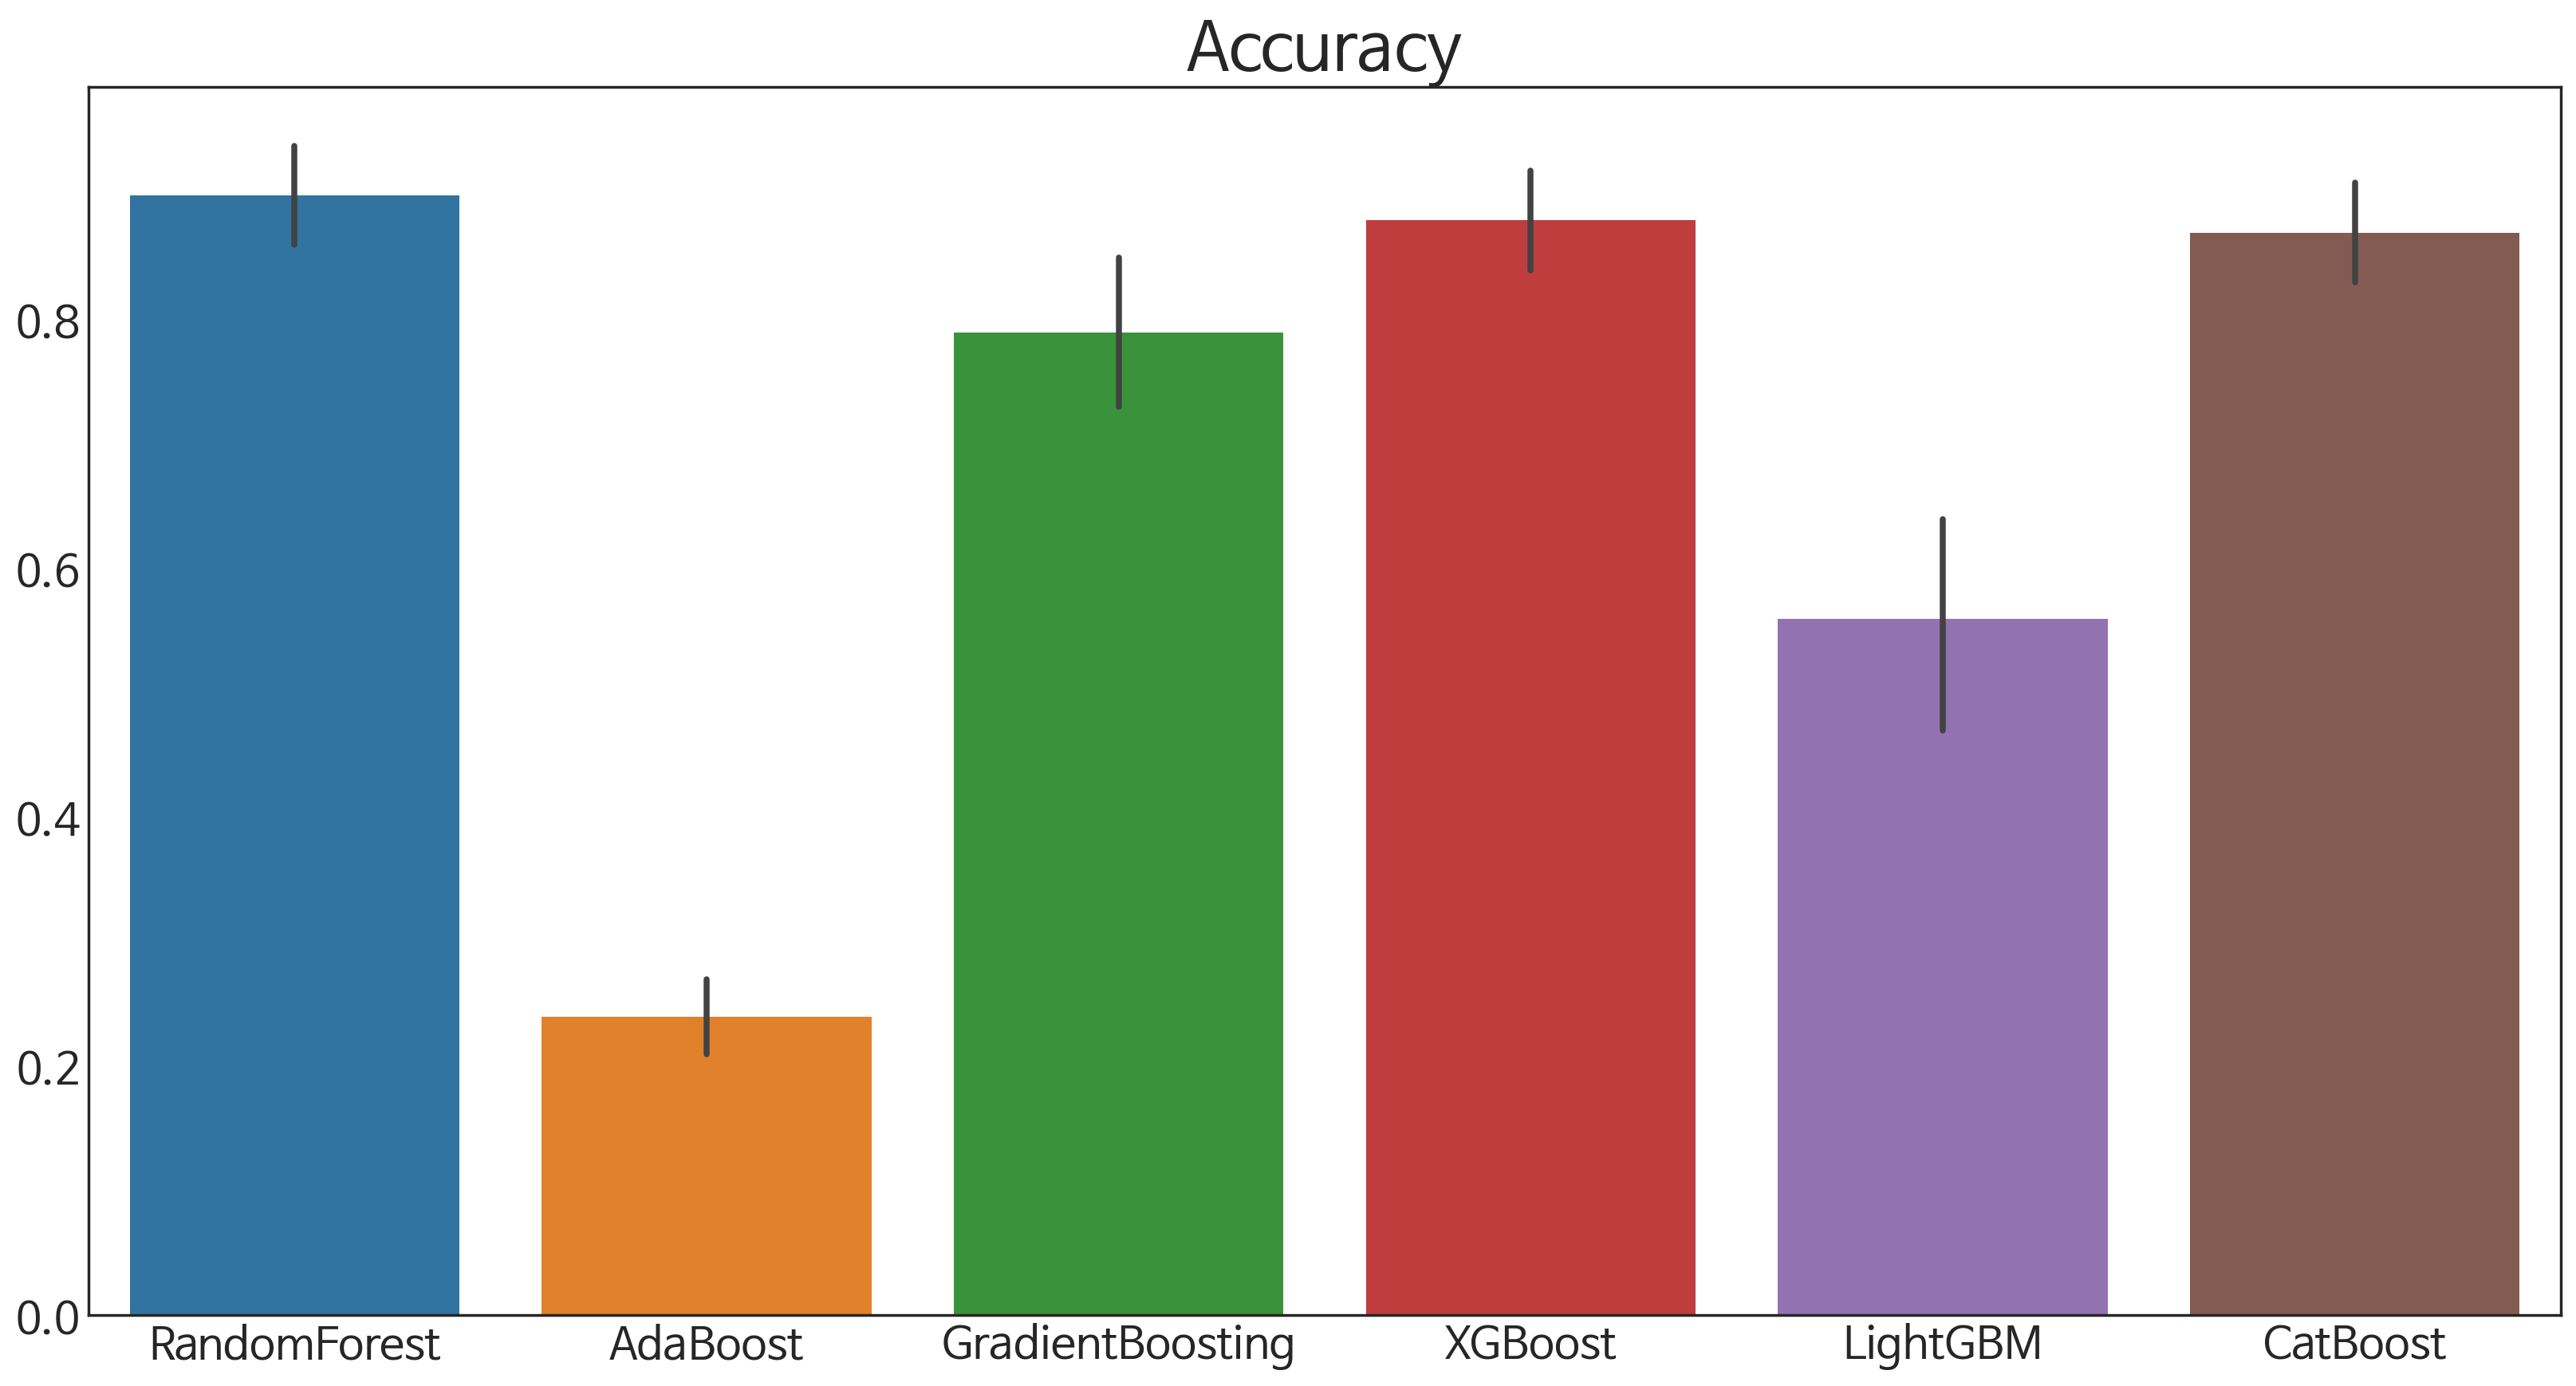

In [255]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.title('Accuracy', fontsize=30)
sns.barplot(data=df_result)
plt.show()

# fisher

## Training

In [256]:
X = pre_fisher.iloc[:,:-1] # data
y = pre_fisher.iloc[:,-1]  # label

In [257]:
X

,adopt,arrest,babe,baby,banana,bank,beat,bella,birthday,blocksburg,...,skirt,snow,spaghetti,sushi,table,teacher,tower,trade,trap,waiter
Adopt Me!_0,0.076923,0.0,0.0,0.192308,0.000000,0.0,0.005495,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Adopt Me!_1,0.009709,0.0,0.0,0.000000,0.000000,0.0,0.019417,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.213592,0.0,0.000000
Adopt Me!_2,0.000000,0.0,0.0,0.014493,0.000000,0.0,0.014493,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.405797,0.0,0.000000
Adopt Me!_3,0.067164,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.022388,0.0,0.000000,0.000000,0.0,0.000000,0.365672,0.0,0.000000
Adopt Me!_4,0.025424,0.0,0.0,0.008475,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.008475,0.237288,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Restaurant Tycoon_5,0.000000,0.0,0.0,0.000000,0.014706,0.0,0.014706,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.029412,0.0,0.000000,0.000000,0.0,0.000000
Restaurant Tycoon_6,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.063348,0.0,0.000000,0.004525,0.0,0.081448
Restaurant Tycoon_7,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.281690,0.0,0.000000,0.000000,0.0,0.000000
Restaurant Tycoon_8,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.098361,0.0,0.000000,0.000000,0.0,0.114754


In [258]:
y

Adopt Me!_0            0
Adopt Me!_1            0
Adopt Me!_2            0
Adopt Me!_3            0
Adopt Me!_4            0
                      ..
Restaurant Tycoon_5    9
Restaurant Tycoon_6    9
Restaurant Tycoon_7    9
Restaurant Tycoon_8    9
Restaurant Tycoon_9    9
Name: label, Length: 100, dtype: int64

### models

In [259]:
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf_ada = AdaBoostClassifier(n_estimators=1000, random_state=42)
clf_gb = GradientBoostingClassifier(n_estimators=1000, random_state=42)
clf_xgb = XGBClassifier(n_estimators=1000, random_state=42)
clf_lgb = LGBMClassifier(n_estimators=1000, random_state=42)
clf_cb = CatBoostClassifier(random_state=42)

lst_models = [clf_rf, clf_ada, clf_gb, clf_xgb, clf_lgb, clf_cb]

In [260]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, train_size=0.9, random_state=42)

In [261]:
next(iter(sss.split(X, y)))

(array([95, 93, 80, 61, 51, 20, 46, 17, 16, 71,  2, 64, 58, 59, 38, 10,  1,
        65, 23, 45, 82, 52, 97, 36, 62, 47,  0, 22, 19, 87, 32, 29, 15, 73,
        35, 81, 74, 53, 44, 98, 99, 70, 63,  5, 13, 66, 57, 89, 54, 21, 26,
        48, 43, 72, 41, 96, 28, 60, 55, 75, 33, 18, 77, 88,  9, 31, 92,  7,
        30, 86, 34, 84, 11, 68,  4,  8,  3, 79, 78, 42, 14, 37, 40, 67, 27,
        25, 50, 94, 85, 90]),
 array([76, 91, 12, 69, 56, 24,  6, 49, 39, 83]))

In [262]:
lst_accuracy = []

iteration = 0
for i, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    X_train = X.iloc[train_idx]
    y_train = y.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]
    
    for model in lst_models:
        print('iter: {} / model: {}'.format(iteration, model))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        lst_accuracy.append(accuracy)
    iteration +=1

iter: 0 / model: RandomForestClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 0 / model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
iter

184:	learn: 0.2007885	total: 574ms	remaining: 2.53s
185:	learn: 0.1990293	total: 577ms	remaining: 2.52s
186:	learn: 0.1972969	total: 580ms	remaining: 2.52s
187:	learn: 0.1959056	total: 583ms	remaining: 2.52s
188:	learn: 0.1944100	total: 585ms	remaining: 2.51s
189:	learn: 0.1926556	total: 588ms	remaining: 2.5s
190:	learn: 0.1916216	total: 590ms	remaining: 2.5s
191:	learn: 0.1900448	total: 593ms	remaining: 2.49s
192:	learn: 0.1886234	total: 595ms	remaining: 2.49s
193:	learn: 0.1869512	total: 598ms	remaining: 2.48s
194:	learn: 0.1854015	total: 601ms	remaining: 2.48s
195:	learn: 0.1844020	total: 602ms	remaining: 2.47s
196:	learn: 0.1833098	total: 605ms	remaining: 2.46s
197:	learn: 0.1817781	total: 607ms	remaining: 2.46s
198:	learn: 0.1804328	total: 610ms	remaining: 2.46s
199:	learn: 0.1789793	total: 613ms	remaining: 2.45s
200:	learn: 0.1774743	total: 615ms	remaining: 2.45s
201:	learn: 0.1762566	total: 618ms	remaining: 2.44s
202:	learn: 0.1750124	total: 621ms	remaining: 2.44s
203:	learn: 0.

400:	learn: 0.0647085	total: 1.17s	remaining: 1.75s
401:	learn: 0.0644661	total: 1.17s	remaining: 1.74s
402:	learn: 0.0642228	total: 1.17s	remaining: 1.74s
403:	learn: 0.0639724	total: 1.18s	remaining: 1.74s
404:	learn: 0.0637500	total: 1.18s	remaining: 1.73s
405:	learn: 0.0635965	total: 1.18s	remaining: 1.73s
406:	learn: 0.0633490	total: 1.19s	remaining: 1.73s
407:	learn: 0.0631293	total: 1.19s	remaining: 1.72s
408:	learn: 0.0629815	total: 1.19s	remaining: 1.72s
409:	learn: 0.0628213	total: 1.19s	remaining: 1.72s
410:	learn: 0.0625941	total: 1.2s	remaining: 1.72s
411:	learn: 0.0623790	total: 1.2s	remaining: 1.71s
412:	learn: 0.0622415	total: 1.2s	remaining: 1.71s
413:	learn: 0.0620448	total: 1.21s	remaining: 1.71s
414:	learn: 0.0618365	total: 1.21s	remaining: 1.7s
415:	learn: 0.0616217	total: 1.21s	remaining: 1.7s
416:	learn: 0.0613393	total: 1.21s	remaining: 1.7s
417:	learn: 0.0611384	total: 1.22s	remaining: 1.69s
418:	learn: 0.0610104	total: 1.22s	remaining: 1.69s
419:	learn: 0.0608

617:	learn: 0.0362882	total: 1.76s	remaining: 1.09s
618:	learn: 0.0362194	total: 1.77s	remaining: 1.09s
619:	learn: 0.0361189	total: 1.77s	remaining: 1.08s
620:	learn: 0.0360532	total: 1.77s	remaining: 1.08s
621:	learn: 0.0360152	total: 1.77s	remaining: 1.08s
622:	learn: 0.0359282	total: 1.78s	remaining: 1.08s
623:	learn: 0.0358612	total: 1.78s	remaining: 1.07s
624:	learn: 0.0358020	total: 1.78s	remaining: 1.07s
625:	learn: 0.0357202	total: 1.79s	remaining: 1.07s
626:	learn: 0.0356251	total: 1.79s	remaining: 1.06s
627:	learn: 0.0355461	total: 1.79s	remaining: 1.06s
628:	learn: 0.0354753	total: 1.79s	remaining: 1.06s
629:	learn: 0.0353838	total: 1.8s	remaining: 1.05s
630:	learn: 0.0352801	total: 1.8s	remaining: 1.05s
631:	learn: 0.0351999	total: 1.8s	remaining: 1.05s
632:	learn: 0.0351594	total: 1.8s	remaining: 1.05s
633:	learn: 0.0350880	total: 1.81s	remaining: 1.04s
634:	learn: 0.0350304	total: 1.81s	remaining: 1.04s
635:	learn: 0.0349572	total: 1.81s	remaining: 1.04s
636:	learn: 0.03

834:	learn: 0.0250235	total: 2.36s	remaining: 466ms
835:	learn: 0.0249839	total: 2.36s	remaining: 463ms
836:	learn: 0.0249490	total: 2.36s	remaining: 460ms
837:	learn: 0.0249102	total: 2.37s	remaining: 458ms
838:	learn: 0.0248769	total: 2.37s	remaining: 455ms
839:	learn: 0.0248450	total: 2.37s	remaining: 452ms
840:	learn: 0.0248134	total: 2.37s	remaining: 449ms
841:	learn: 0.0247824	total: 2.38s	remaining: 446ms
842:	learn: 0.0247278	total: 2.38s	remaining: 443ms
843:	learn: 0.0246976	total: 2.38s	remaining: 440ms
844:	learn: 0.0246570	total: 2.38s	remaining: 438ms
845:	learn: 0.0246420	total: 2.39s	remaining: 435ms
846:	learn: 0.0245981	total: 2.39s	remaining: 432ms
847:	learn: 0.0245450	total: 2.39s	remaining: 429ms
848:	learn: 0.0245035	total: 2.4s	remaining: 426ms
849:	learn: 0.0244704	total: 2.4s	remaining: 424ms
850:	learn: 0.0244527	total: 2.4s	remaining: 421ms
851:	learn: 0.0244049	total: 2.4s	remaining: 418ms
852:	learn: 0.0243837	total: 2.41s	remaining: 415ms
853:	learn: 0.02

iter: 1 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 1 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 1 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 1 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 1 / model: <catb

203:	learn: 0.1672014	total: 581ms	remaining: 2.27s
204:	learn: 0.1663380	total: 584ms	remaining: 2.27s
205:	learn: 0.1649627	total: 587ms	remaining: 2.26s
206:	learn: 0.1637235	total: 589ms	remaining: 2.26s
207:	learn: 0.1625460	total: 592ms	remaining: 2.25s
208:	learn: 0.1610809	total: 595ms	remaining: 2.25s
209:	learn: 0.1602493	total: 598ms	remaining: 2.25s
210:	learn: 0.1591521	total: 601ms	remaining: 2.25s
211:	learn: 0.1583080	total: 604ms	remaining: 2.24s
212:	learn: 0.1570256	total: 607ms	remaining: 2.24s
213:	learn: 0.1564496	total: 610ms	remaining: 2.24s
214:	learn: 0.1551758	total: 613ms	remaining: 2.24s
215:	learn: 0.1540327	total: 616ms	remaining: 2.23s
216:	learn: 0.1532455	total: 618ms	remaining: 2.23s
217:	learn: 0.1521968	total: 621ms	remaining: 2.23s
218:	learn: 0.1512207	total: 624ms	remaining: 2.23s
219:	learn: 0.1503214	total: 627ms	remaining: 2.22s
220:	learn: 0.1494373	total: 630ms	remaining: 2.22s
221:	learn: 0.1486072	total: 633ms	remaining: 2.22s
222:	learn: 

418:	learn: 0.0599671	total: 1.17s	remaining: 1.63s
419:	learn: 0.0597127	total: 1.18s	remaining: 1.62s
420:	learn: 0.0594880	total: 1.18s	remaining: 1.62s
421:	learn: 0.0593456	total: 1.18s	remaining: 1.62s
422:	learn: 0.0592294	total: 1.18s	remaining: 1.61s
423:	learn: 0.0590322	total: 1.19s	remaining: 1.61s
424:	learn: 0.0588707	total: 1.19s	remaining: 1.61s
425:	learn: 0.0587615	total: 1.19s	remaining: 1.61s
426:	learn: 0.0585863	total: 1.19s	remaining: 1.6s
427:	learn: 0.0584888	total: 1.2s	remaining: 1.6s
428:	learn: 0.0583142	total: 1.2s	remaining: 1.6s
429:	learn: 0.0581558	total: 1.2s	remaining: 1.59s
430:	learn: 0.0579704	total: 1.21s	remaining: 1.59s
431:	learn: 0.0577754	total: 1.21s	remaining: 1.59s
432:	learn: 0.0575694	total: 1.21s	remaining: 1.59s
433:	learn: 0.0573432	total: 1.21s	remaining: 1.58s
434:	learn: 0.0571342	total: 1.22s	remaining: 1.58s
435:	learn: 0.0569242	total: 1.22s	remaining: 1.58s
436:	learn: 0.0567109	total: 1.22s	remaining: 1.57s
437:	learn: 0.0565

637:	learn: 0.0343915	total: 1.77s	remaining: 1s
638:	learn: 0.0342920	total: 1.77s	remaining: 1s
639:	learn: 0.0342118	total: 1.77s	remaining: 999ms
640:	learn: 0.0341830	total: 1.78s	remaining: 996ms
641:	learn: 0.0341347	total: 1.78s	remaining: 993ms
642:	learn: 0.0340689	total: 1.78s	remaining: 990ms
643:	learn: 0.0339983	total: 1.79s	remaining: 987ms
644:	learn: 0.0339113	total: 1.79s	remaining: 985ms
645:	learn: 0.0338280	total: 1.79s	remaining: 982ms
646:	learn: 0.0337468	total: 1.79s	remaining: 979ms
647:	learn: 0.0336724	total: 1.8s	remaining: 976ms
648:	learn: 0.0336073	total: 1.8s	remaining: 973ms
649:	learn: 0.0335195	total: 1.8s	remaining: 971ms
650:	learn: 0.0334921	total: 1.8s	remaining: 968ms
651:	learn: 0.0334588	total: 1.81s	remaining: 965ms
652:	learn: 0.0333809	total: 1.81s	remaining: 962ms
653:	learn: 0.0333601	total: 1.81s	remaining: 959ms
654:	learn: 0.0332685	total: 1.81s	remaining: 956ms
655:	learn: 0.0332207	total: 1.82s	remaining: 954ms
656:	learn: 0.0331433	

855:	learn: 0.0236916	total: 2.37s	remaining: 398ms
856:	learn: 0.0236693	total: 2.37s	remaining: 395ms
857:	learn: 0.0236462	total: 2.37s	remaining: 393ms
858:	learn: 0.0236145	total: 2.38s	remaining: 390ms
859:	learn: 0.0235689	total: 2.38s	remaining: 387ms
860:	learn: 0.0235307	total: 2.38s	remaining: 384ms
861:	learn: 0.0234941	total: 2.38s	remaining: 382ms
862:	learn: 0.0234621	total: 2.39s	remaining: 379ms
863:	learn: 0.0234299	total: 2.39s	remaining: 376ms
864:	learn: 0.0233921	total: 2.39s	remaining: 373ms
865:	learn: 0.0233761	total: 2.39s	remaining: 370ms
866:	learn: 0.0233459	total: 2.4s	remaining: 368ms
867:	learn: 0.0232972	total: 2.4s	remaining: 365ms
868:	learn: 0.0232617	total: 2.4s	remaining: 362ms
869:	learn: 0.0232274	total: 2.4s	remaining: 359ms
870:	learn: 0.0232141	total: 2.41s	remaining: 357ms
871:	learn: 0.0231873	total: 2.41s	remaining: 354ms
872:	learn: 0.0231505	total: 2.41s	remaining: 351ms
873:	learn: 0.0231180	total: 2.42s	remaining: 348ms
874:	learn: 0.02

iter: 2 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 2 / model: <catboost.core.CatBoostClassifier object at 0x7fac24210dc0>
Learning rate set to 0.069983
0:	learn: 2.2619074	total: 21.3ms	remaining: 21.3s
1:	learn: 2.2260526	total: 24.8ms	remaining: 12.4s
2:	learn: 2.1963415	total: 37.2ms	remaining: 12.3s
3:	learn: 2.1541858	total: 39.5ms	remaining: 9.84s
4:	learn: 2.1203933	total: 42.1ms	remaining: 8.39s
5:	learn: 2.0828641	total: 45.2ms	remaining: 7.49s
6:	learn: 2.0522945	total: 74.9ms	remaining: 10.6s
7:	learn: 2.0323596	total: 94ms	remaining: 11.7s
8:	learn: 2.0065134	total: 96.7ms	remaining: 10.6s
9:	learn: 1.9749965	total: 99.5ms	remaining: 9.85s
10:	learn: 1.9524998	total: 103ms	remaining: 9.29s
11:	learn: 1.9229778	total: 106ms	remaining: 8.72s
12:	learn: 1.8904669	total: 110ms	remaining: 8.38s
13:	learn: 1.8607092	total: 113ms	remaining: 7.95s
14:	learn: 1.8267713	total: 126ms	remaining: 8.28s
15:	learn: 1.7983352	total: 129ms	remaining: 7.91s
16:	learn: 

167:	learn: 0.2398539	total: 555ms	remaining: 2.75s
168:	learn: 0.2374093	total: 558ms	remaining: 2.74s
169:	learn: 0.2352061	total: 560ms	remaining: 2.73s
170:	learn: 0.2338472	total: 563ms	remaining: 2.73s
171:	learn: 0.2321721	total: 566ms	remaining: 2.72s
172:	learn: 0.2302947	total: 569ms	remaining: 2.72s
173:	learn: 0.2280239	total: 572ms	remaining: 2.72s
174:	learn: 0.2260498	total: 575ms	remaining: 2.71s
175:	learn: 0.2241552	total: 578ms	remaining: 2.71s
176:	learn: 0.2221789	total: 581ms	remaining: 2.7s
177:	learn: 0.2203721	total: 583ms	remaining: 2.69s
178:	learn: 0.2183979	total: 586ms	remaining: 2.69s
179:	learn: 0.2166079	total: 588ms	remaining: 2.68s
180:	learn: 0.2147043	total: 591ms	remaining: 2.67s
181:	learn: 0.2130197	total: 594ms	remaining: 2.67s
182:	learn: 0.2111219	total: 597ms	remaining: 2.66s
183:	learn: 0.2097247	total: 599ms	remaining: 2.65s
184:	learn: 0.2077364	total: 602ms	remaining: 2.65s
185:	learn: 0.2061805	total: 604ms	remaining: 2.64s
186:	learn: 0

382:	learn: 0.0719035	total: 1.15s	remaining: 1.85s
383:	learn: 0.0716390	total: 1.15s	remaining: 1.85s
384:	learn: 0.0713657	total: 1.15s	remaining: 1.84s
385:	learn: 0.0711385	total: 1.16s	remaining: 1.84s
386:	learn: 0.0708870	total: 1.16s	remaining: 1.84s
387:	learn: 0.0706814	total: 1.16s	remaining: 1.83s
388:	learn: 0.0704184	total: 1.17s	remaining: 1.83s
389:	learn: 0.0700927	total: 1.17s	remaining: 1.83s
390:	learn: 0.0698549	total: 1.17s	remaining: 1.82s
391:	learn: 0.0696604	total: 1.17s	remaining: 1.82s
392:	learn: 0.0693707	total: 1.18s	remaining: 1.82s
393:	learn: 0.0690938	total: 1.18s	remaining: 1.81s
394:	learn: 0.0688939	total: 1.18s	remaining: 1.81s
395:	learn: 0.0685101	total: 1.18s	remaining: 1.81s
396:	learn: 0.0683643	total: 1.19s	remaining: 1.8s
397:	learn: 0.0682519	total: 1.19s	remaining: 1.8s
398:	learn: 0.0679621	total: 1.19s	remaining: 1.8s
399:	learn: 0.0676858	total: 1.2s	remaining: 1.79s
400:	learn: 0.0673079	total: 1.2s	remaining: 1.79s
401:	learn: 0.066

599:	learn: 0.0387827	total: 1.75s	remaining: 1.16s
600:	learn: 0.0387086	total: 1.75s	remaining: 1.16s
601:	learn: 0.0386185	total: 1.75s	remaining: 1.16s
602:	learn: 0.0385320	total: 1.75s	remaining: 1.16s
603:	learn: 0.0384500	total: 1.76s	remaining: 1.15s
604:	learn: 0.0384203	total: 1.76s	remaining: 1.15s
605:	learn: 0.0383263	total: 1.76s	remaining: 1.15s
606:	learn: 0.0382079	total: 1.76s	remaining: 1.14s
607:	learn: 0.0381099	total: 1.77s	remaining: 1.14s
608:	learn: 0.0380431	total: 1.77s	remaining: 1.14s
609:	learn: 0.0379841	total: 1.77s	remaining: 1.13s
610:	learn: 0.0379133	total: 1.78s	remaining: 1.13s
611:	learn: 0.0378251	total: 1.78s	remaining: 1.13s
612:	learn: 0.0377457	total: 1.78s	remaining: 1.12s
613:	learn: 0.0376537	total: 1.78s	remaining: 1.12s
614:	learn: 0.0375859	total: 1.79s	remaining: 1.12s
615:	learn: 0.0374877	total: 1.79s	remaining: 1.11s
616:	learn: 0.0374248	total: 1.79s	remaining: 1.11s
617:	learn: 0.0373482	total: 1.79s	remaining: 1.11s
618:	learn: 

815:	learn: 0.0263133	total: 2.34s	remaining: 528ms
816:	learn: 0.0262695	total: 2.34s	remaining: 525ms
817:	learn: 0.0262326	total: 2.35s	remaining: 522ms
818:	learn: 0.0261991	total: 2.35s	remaining: 519ms
819:	learn: 0.0261646	total: 2.35s	remaining: 516ms
820:	learn: 0.0261272	total: 2.35s	remaining: 513ms
821:	learn: 0.0260803	total: 2.36s	remaining: 510ms
822:	learn: 0.0260324	total: 2.36s	remaining: 508ms
823:	learn: 0.0260000	total: 2.36s	remaining: 505ms
824:	learn: 0.0259686	total: 2.37s	remaining: 502ms
825:	learn: 0.0259199	total: 2.37s	remaining: 499ms
826:	learn: 0.0258798	total: 2.37s	remaining: 496ms
827:	learn: 0.0258377	total: 2.37s	remaining: 493ms
828:	learn: 0.0258080	total: 2.38s	remaining: 490ms
829:	learn: 0.0257533	total: 2.38s	remaining: 488ms
830:	learn: 0.0257174	total: 2.38s	remaining: 485ms
831:	learn: 0.0256772	total: 2.38s	remaining: 482ms
832:	learn: 0.0256405	total: 2.39s	remaining: 479ms
833:	learn: 0.0255979	total: 2.39s	remaining: 476ms
834:	learn: 

iter: 3 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 3 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 3 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 3 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 3 / model: <catb

169:	learn: 0.2371869	total: 544ms	remaining: 2.66s
170:	learn: 0.2354494	total: 547ms	remaining: 2.65s
171:	learn: 0.2327442	total: 549ms	remaining: 2.64s
172:	learn: 0.2304903	total: 552ms	remaining: 2.64s
173:	learn: 0.2284003	total: 555ms	remaining: 2.63s
174:	learn: 0.2261133	total: 558ms	remaining: 2.63s
175:	learn: 0.2241627	total: 560ms	remaining: 2.62s
176:	learn: 0.2222709	total: 563ms	remaining: 2.62s
177:	learn: 0.2199461	total: 566ms	remaining: 2.62s
178:	learn: 0.2182015	total: 570ms	remaining: 2.61s
179:	learn: 0.2163371	total: 573ms	remaining: 2.61s
180:	learn: 0.2146528	total: 575ms	remaining: 2.6s
181:	learn: 0.2120105	total: 578ms	remaining: 2.6s
182:	learn: 0.2108548	total: 581ms	remaining: 2.59s
183:	learn: 0.2092962	total: 584ms	remaining: 2.59s
184:	learn: 0.2073798	total: 586ms	remaining: 2.58s
185:	learn: 0.2056170	total: 590ms	remaining: 2.58s
186:	learn: 0.2036799	total: 593ms	remaining: 2.58s
187:	learn: 0.2016697	total: 596ms	remaining: 2.57s
188:	learn: 0.

386:	learn: 0.0715874	total: 1.14s	remaining: 1.8s
387:	learn: 0.0713442	total: 1.14s	remaining: 1.8s
388:	learn: 0.0710392	total: 1.14s	remaining: 1.8s
389:	learn: 0.0709384	total: 1.15s	remaining: 1.79s
390:	learn: 0.0707080	total: 1.15s	remaining: 1.79s
391:	learn: 0.0704976	total: 1.15s	remaining: 1.79s
392:	learn: 0.0702184	total: 1.16s	remaining: 1.78s
393:	learn: 0.0699700	total: 1.16s	remaining: 1.78s
394:	learn: 0.0696826	total: 1.16s	remaining: 1.78s
395:	learn: 0.0693856	total: 1.16s	remaining: 1.77s
396:	learn: 0.0690746	total: 1.17s	remaining: 1.77s
397:	learn: 0.0688085	total: 1.17s	remaining: 1.77s
398:	learn: 0.0685529	total: 1.17s	remaining: 1.76s
399:	learn: 0.0683453	total: 1.17s	remaining: 1.76s
400:	learn: 0.0681063	total: 1.18s	remaining: 1.76s
401:	learn: 0.0677984	total: 1.18s	remaining: 1.75s
402:	learn: 0.0675279	total: 1.18s	remaining: 1.75s
403:	learn: 0.0673216	total: 1.19s	remaining: 1.75s
404:	learn: 0.0670984	total: 1.19s	remaining: 1.75s
405:	learn: 0.0

602:	learn: 0.0390568	total: 1.73s	remaining: 1.14s
603:	learn: 0.0389756	total: 1.74s	remaining: 1.14s
604:	learn: 0.0388643	total: 1.74s	remaining: 1.14s
605:	learn: 0.0387952	total: 1.74s	remaining: 1.13s
606:	learn: 0.0387104	total: 1.74s	remaining: 1.13s
607:	learn: 0.0385693	total: 1.75s	remaining: 1.13s
608:	learn: 0.0384517	total: 1.75s	remaining: 1.12s
609:	learn: 0.0383813	total: 1.75s	remaining: 1.12s
610:	learn: 0.0382970	total: 1.75s	remaining: 1.12s
611:	learn: 0.0381825	total: 1.76s	remaining: 1.11s
612:	learn: 0.0381328	total: 1.76s	remaining: 1.11s
613:	learn: 0.0380652	total: 1.76s	remaining: 1.11s
614:	learn: 0.0379834	total: 1.76s	remaining: 1.1s
615:	learn: 0.0379092	total: 1.77s	remaining: 1.1s
616:	learn: 0.0378240	total: 1.77s	remaining: 1.1s
617:	learn: 0.0377123	total: 1.77s	remaining: 1.1s
618:	learn: 0.0376402	total: 1.78s	remaining: 1.09s
619:	learn: 0.0375477	total: 1.78s	remaining: 1.09s
620:	learn: 0.0374699	total: 1.78s	remaining: 1.09s
621:	learn: 0.03

822:	learn: 0.0258114	total: 2.33s	remaining: 501ms
823:	learn: 0.0257677	total: 2.33s	remaining: 498ms
824:	learn: 0.0257168	total: 2.33s	remaining: 495ms
825:	learn: 0.0256797	total: 2.34s	remaining: 492ms
826:	learn: 0.0256392	total: 2.34s	remaining: 490ms
827:	learn: 0.0255852	total: 2.34s	remaining: 487ms
828:	learn: 0.0255430	total: 2.35s	remaining: 484ms
829:	learn: 0.0255155	total: 2.35s	remaining: 481ms
830:	learn: 0.0254726	total: 2.35s	remaining: 478ms
831:	learn: 0.0254443	total: 2.35s	remaining: 475ms
832:	learn: 0.0254080	total: 2.36s	remaining: 473ms
833:	learn: 0.0253742	total: 2.36s	remaining: 470ms
834:	learn: 0.0253362	total: 2.36s	remaining: 467ms
835:	learn: 0.0252938	total: 2.37s	remaining: 464ms
836:	learn: 0.0252771	total: 2.37s	remaining: 461ms
837:	learn: 0.0252431	total: 2.37s	remaining: 458ms
838:	learn: 0.0251909	total: 2.37s	remaining: 455ms
839:	learn: 0.0251553	total: 2.38s	remaining: 453ms
840:	learn: 0.0251074	total: 2.38s	remaining: 450ms
841:	learn: 

iter: 4 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 4 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 4 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 4 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 4 / model: <catb

176:	learn: 0.2267711	total: 556ms	remaining: 2.59s
177:	learn: 0.2248474	total: 559ms	remaining: 2.58s
178:	learn: 0.2229138	total: 561ms	remaining: 2.57s
179:	learn: 0.2205562	total: 564ms	remaining: 2.57s
180:	learn: 0.2183888	total: 567ms	remaining: 2.56s
181:	learn: 0.2165347	total: 569ms	remaining: 2.56s
182:	learn: 0.2148507	total: 572ms	remaining: 2.55s
183:	learn: 0.2133567	total: 575ms	remaining: 2.55s
184:	learn: 0.2118588	total: 578ms	remaining: 2.54s
185:	learn: 0.2099397	total: 580ms	remaining: 2.54s
186:	learn: 0.2082880	total: 583ms	remaining: 2.54s
187:	learn: 0.2072777	total: 586ms	remaining: 2.53s
188:	learn: 0.2053948	total: 589ms	remaining: 2.53s
189:	learn: 0.2036072	total: 591ms	remaining: 2.52s
190:	learn: 0.2019679	total: 594ms	remaining: 2.51s
191:	learn: 0.2000645	total: 596ms	remaining: 2.51s
192:	learn: 0.1982636	total: 599ms	remaining: 2.5s
193:	learn: 0.1964890	total: 602ms	remaining: 2.5s
194:	learn: 0.1953713	total: 605ms	remaining: 2.5s
195:	learn: 0.1

396:	learn: 0.0702812	total: 1.15s	remaining: 1.75s
397:	learn: 0.0700587	total: 1.15s	remaining: 1.75s
398:	learn: 0.0697592	total: 1.16s	remaining: 1.74s
399:	learn: 0.0694810	total: 1.16s	remaining: 1.74s
400:	learn: 0.0692947	total: 1.16s	remaining: 1.74s
401:	learn: 0.0689834	total: 1.17s	remaining: 1.73s
402:	learn: 0.0688653	total: 1.17s	remaining: 1.73s
403:	learn: 0.0685828	total: 1.17s	remaining: 1.73s
404:	learn: 0.0683856	total: 1.17s	remaining: 1.72s
405:	learn: 0.0682029	total: 1.18s	remaining: 1.72s
406:	learn: 0.0680189	total: 1.18s	remaining: 1.72s
407:	learn: 0.0677942	total: 1.18s	remaining: 1.72s
408:	learn: 0.0676289	total: 1.19s	remaining: 1.71s
409:	learn: 0.0673472	total: 1.19s	remaining: 1.71s
410:	learn: 0.0671154	total: 1.19s	remaining: 1.71s
411:	learn: 0.0669217	total: 1.19s	remaining: 1.7s
412:	learn: 0.0666170	total: 1.2s	remaining: 1.7s
413:	learn: 0.0665166	total: 1.2s	remaining: 1.7s
414:	learn: 0.0662726	total: 1.2s	remaining: 1.69s
415:	learn: 0.0660

614:	learn: 0.0384944	total: 1.74s	remaining: 1.09s
615:	learn: 0.0384096	total: 1.75s	remaining: 1.09s
616:	learn: 0.0383420	total: 1.75s	remaining: 1.09s
617:	learn: 0.0382721	total: 1.75s	remaining: 1.08s
618:	learn: 0.0381706	total: 1.75s	remaining: 1.08s
619:	learn: 0.0380834	total: 1.76s	remaining: 1.08s
620:	learn: 0.0380116	total: 1.76s	remaining: 1.07s
621:	learn: 0.0378947	total: 1.76s	remaining: 1.07s
622:	learn: 0.0378201	total: 1.77s	remaining: 1.07s
623:	learn: 0.0377521	total: 1.77s	remaining: 1.06s
624:	learn: 0.0376610	total: 1.77s	remaining: 1.06s
625:	learn: 0.0375722	total: 1.77s	remaining: 1.06s
626:	learn: 0.0375020	total: 1.78s	remaining: 1.06s
627:	learn: 0.0374257	total: 1.78s	remaining: 1.05s
628:	learn: 0.0373505	total: 1.78s	remaining: 1.05s
629:	learn: 0.0372620	total: 1.78s	remaining: 1.05s
630:	learn: 0.0371627	total: 1.79s	remaining: 1.04s
631:	learn: 0.0370820	total: 1.79s	remaining: 1.04s
632:	learn: 0.0370197	total: 1.79s	remaining: 1.04s
633:	learn: 

833:	learn: 0.0258584	total: 2.34s	remaining: 466ms
834:	learn: 0.0258243	total: 2.34s	remaining: 463ms
835:	learn: 0.0257812	total: 2.34s	remaining: 460ms
836:	learn: 0.0257652	total: 2.35s	remaining: 457ms
837:	learn: 0.0257176	total: 2.35s	remaining: 454ms
838:	learn: 0.0256794	total: 2.35s	remaining: 452ms
839:	learn: 0.0256519	total: 2.35s	remaining: 449ms
840:	learn: 0.0256140	total: 2.36s	remaining: 446ms
841:	learn: 0.0255778	total: 2.36s	remaining: 443ms
842:	learn: 0.0255267	total: 2.36s	remaining: 440ms
843:	learn: 0.0254830	total: 2.37s	remaining: 437ms
844:	learn: 0.0254495	total: 2.37s	remaining: 435ms
845:	learn: 0.0253983	total: 2.37s	remaining: 432ms
846:	learn: 0.0253752	total: 2.38s	remaining: 429ms
847:	learn: 0.0253304	total: 2.38s	remaining: 426ms
848:	learn: 0.0252841	total: 2.38s	remaining: 423ms
849:	learn: 0.0252437	total: 2.38s	remaining: 420ms
850:	learn: 0.0252012	total: 2.38s	remaining: 418ms
851:	learn: 0.0251644	total: 2.39s	remaining: 415ms
852:	learn: 

iter: 5 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 5 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 5 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 5 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 5 / model: <catb

175:	learn: 0.2117360	total: 564ms	remaining: 2.64s
176:	learn: 0.2103114	total: 567ms	remaining: 2.63s
177:	learn: 0.2081309	total: 570ms	remaining: 2.63s
178:	learn: 0.2063752	total: 572ms	remaining: 2.63s
179:	learn: 0.2046137	total: 575ms	remaining: 2.62s
180:	learn: 0.2032997	total: 578ms	remaining: 2.62s
181:	learn: 0.2015063	total: 581ms	remaining: 2.61s
182:	learn: 0.2000274	total: 584ms	remaining: 2.6s
183:	learn: 0.1984824	total: 586ms	remaining: 2.6s
184:	learn: 0.1968471	total: 589ms	remaining: 2.6s
185:	learn: 0.1951037	total: 592ms	remaining: 2.59s
186:	learn: 0.1933044	total: 595ms	remaining: 2.59s
187:	learn: 0.1920972	total: 598ms	remaining: 2.58s
188:	learn: 0.1906125	total: 601ms	remaining: 2.58s
189:	learn: 0.1892359	total: 604ms	remaining: 2.58s
190:	learn: 0.1879017	total: 606ms	remaining: 2.57s
191:	learn: 0.1865321	total: 609ms	remaining: 2.56s
192:	learn: 0.1852939	total: 612ms	remaining: 2.56s
193:	learn: 0.1843914	total: 615ms	remaining: 2.55s
194:	learn: 0.1

394:	learn: 0.0688382	total: 1.16s	remaining: 1.78s
395:	learn: 0.0685730	total: 1.16s	remaining: 1.78s
396:	learn: 0.0684538	total: 1.17s	remaining: 1.77s
397:	learn: 0.0682289	total: 1.17s	remaining: 1.77s
398:	learn: 0.0679365	total: 1.17s	remaining: 1.77s
399:	learn: 0.0677227	total: 1.18s	remaining: 1.76s
400:	learn: 0.0675309	total: 1.18s	remaining: 1.76s
401:	learn: 0.0672708	total: 1.18s	remaining: 1.76s
402:	learn: 0.0670162	total: 1.18s	remaining: 1.75s
403:	learn: 0.0668577	total: 1.19s	remaining: 1.75s
404:	learn: 0.0666031	total: 1.19s	remaining: 1.75s
405:	learn: 0.0663581	total: 1.19s	remaining: 1.75s
406:	learn: 0.0661945	total: 1.2s	remaining: 1.74s
407:	learn: 0.0659222	total: 1.2s	remaining: 1.74s
408:	learn: 0.0656984	total: 1.2s	remaining: 1.74s
409:	learn: 0.0655120	total: 1.2s	remaining: 1.73s
410:	learn: 0.0652746	total: 1.21s	remaining: 1.73s
411:	learn: 0.0651579	total: 1.21s	remaining: 1.73s
412:	learn: 0.0649138	total: 1.21s	remaining: 1.72s
413:	learn: 0.06

612:	learn: 0.0387165	total: 1.76s	remaining: 1.11s
613:	learn: 0.0386149	total: 1.76s	remaining: 1.11s
614:	learn: 0.0385434	total: 1.76s	remaining: 1.1s
615:	learn: 0.0384847	total: 1.76s	remaining: 1.1s
616:	learn: 0.0383711	total: 1.77s	remaining: 1.1s
617:	learn: 0.0382504	total: 1.77s	remaining: 1.09s
618:	learn: 0.0381879	total: 1.77s	remaining: 1.09s
619:	learn: 0.0381436	total: 1.77s	remaining: 1.09s
620:	learn: 0.0380685	total: 1.78s	remaining: 1.08s
621:	learn: 0.0379635	total: 1.78s	remaining: 1.08s
622:	learn: 0.0378816	total: 1.78s	remaining: 1.08s
623:	learn: 0.0378375	total: 1.79s	remaining: 1.08s
624:	learn: 0.0377387	total: 1.79s	remaining: 1.07s
625:	learn: 0.0376606	total: 1.79s	remaining: 1.07s
626:	learn: 0.0375937	total: 1.79s	remaining: 1.07s
627:	learn: 0.0374923	total: 1.8s	remaining: 1.06s
628:	learn: 0.0373990	total: 1.8s	remaining: 1.06s
629:	learn: 0.0373232	total: 1.8s	remaining: 1.06s
630:	learn: 0.0372617	total: 1.81s	remaining: 1.06s
631:	learn: 0.0371

828:	learn: 0.0261544	total: 2.35s	remaining: 486ms
829:	learn: 0.0261192	total: 2.36s	remaining: 483ms
830:	learn: 0.0260788	total: 2.36s	remaining: 480ms
831:	learn: 0.0260465	total: 2.36s	remaining: 477ms
832:	learn: 0.0259930	total: 2.37s	remaining: 474ms
833:	learn: 0.0259323	total: 2.37s	remaining: 471ms
834:	learn: 0.0258920	total: 2.37s	remaining: 468ms
835:	learn: 0.0258448	total: 2.37s	remaining: 466ms
836:	learn: 0.0258151	total: 2.38s	remaining: 463ms
837:	learn: 0.0257603	total: 2.38s	remaining: 460ms
838:	learn: 0.0257248	total: 2.38s	remaining: 457ms
839:	learn: 0.0256970	total: 2.38s	remaining: 454ms
840:	learn: 0.0256540	total: 2.39s	remaining: 451ms
841:	learn: 0.0256158	total: 2.39s	remaining: 448ms
842:	learn: 0.0255759	total: 2.39s	remaining: 445ms
843:	learn: 0.0255274	total: 2.39s	remaining: 443ms
844:	learn: 0.0254852	total: 2.4s	remaining: 440ms
845:	learn: 0.0254347	total: 2.4s	remaining: 437ms
846:	learn: 0.0254086	total: 2.4s	remaining: 434ms
847:	learn: 0.0

iter: 6 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 6 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 6 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 6 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 6 / model: <catb

200:	learn: 0.1768614	total: 580ms	remaining: 2.3s
201:	learn: 0.1759889	total: 582ms	remaining: 2.3s
202:	learn: 0.1749350	total: 585ms	remaining: 2.3s
203:	learn: 0.1734131	total: 588ms	remaining: 2.29s
204:	learn: 0.1724690	total: 591ms	remaining: 2.29s
205:	learn: 0.1712445	total: 594ms	remaining: 2.29s
206:	learn: 0.1700218	total: 596ms	remaining: 2.28s
207:	learn: 0.1685795	total: 599ms	remaining: 2.28s
208:	learn: 0.1672162	total: 602ms	remaining: 2.28s
209:	learn: 0.1657846	total: 604ms	remaining: 2.27s
210:	learn: 0.1644247	total: 607ms	remaining: 2.27s
211:	learn: 0.1629923	total: 610ms	remaining: 2.27s
212:	learn: 0.1620042	total: 613ms	remaining: 2.26s
213:	learn: 0.1609979	total: 615ms	remaining: 2.26s
214:	learn: 0.1601976	total: 618ms	remaining: 2.25s
215:	learn: 0.1591846	total: 621ms	remaining: 2.25s
216:	learn: 0.1581552	total: 623ms	remaining: 2.25s
217:	learn: 0.1574502	total: 626ms	remaining: 2.25s
218:	learn: 0.1560165	total: 629ms	remaining: 2.24s
219:	learn: 0.1

416:	learn: 0.0607390	total: 1.18s	remaining: 1.64s
417:	learn: 0.0605369	total: 1.18s	remaining: 1.64s
418:	learn: 0.0603663	total: 1.18s	remaining: 1.64s
419:	learn: 0.0602683	total: 1.18s	remaining: 1.63s
420:	learn: 0.0600510	total: 1.19s	remaining: 1.63s
421:	learn: 0.0597700	total: 1.19s	remaining: 1.63s
422:	learn: 0.0596759	total: 1.19s	remaining: 1.63s
423:	learn: 0.0594774	total: 1.19s	remaining: 1.62s
424:	learn: 0.0592038	total: 1.2s	remaining: 1.62s
425:	learn: 0.0589497	total: 1.2s	remaining: 1.62s
426:	learn: 0.0587366	total: 1.2s	remaining: 1.61s
427:	learn: 0.0585021	total: 1.21s	remaining: 1.61s
428:	learn: 0.0583156	total: 1.21s	remaining: 1.61s
429:	learn: 0.0581857	total: 1.21s	remaining: 1.6s
430:	learn: 0.0579983	total: 1.21s	remaining: 1.6s
431:	learn: 0.0578242	total: 1.22s	remaining: 1.6s
432:	learn: 0.0575729	total: 1.22s	remaining: 1.6s
433:	learn: 0.0573209	total: 1.22s	remaining: 1.59s
434:	learn: 0.0571529	total: 1.23s	remaining: 1.59s
435:	learn: 0.05698

631:	learn: 0.0342236	total: 1.77s	remaining: 1.03s
632:	learn: 0.0341744	total: 1.77s	remaining: 1.03s
633:	learn: 0.0340778	total: 1.78s	remaining: 1.03s
634:	learn: 0.0340213	total: 1.78s	remaining: 1.02s
635:	learn: 0.0339668	total: 1.78s	remaining: 1.02s
636:	learn: 0.0338830	total: 1.78s	remaining: 1.02s
637:	learn: 0.0338169	total: 1.79s	remaining: 1.01s
638:	learn: 0.0337636	total: 1.79s	remaining: 1.01s
639:	learn: 0.0336878	total: 1.79s	remaining: 1.01s
640:	learn: 0.0336101	total: 1.79s	remaining: 1s
641:	learn: 0.0335504	total: 1.8s	remaining: 1s
642:	learn: 0.0334980	total: 1.8s	remaining: 1000ms
643:	learn: 0.0334259	total: 1.8s	remaining: 997ms
644:	learn: 0.0333533	total: 1.81s	remaining: 994ms
645:	learn: 0.0332918	total: 1.81s	remaining: 991ms
646:	learn: 0.0332461	total: 1.81s	remaining: 989ms
647:	learn: 0.0331665	total: 1.81s	remaining: 986ms
648:	learn: 0.0330662	total: 1.82s	remaining: 983ms
649:	learn: 0.0330247	total: 1.82s	remaining: 980ms
650:	learn: 0.032967

849:	learn: 0.0236199	total: 2.37s	remaining: 418ms
850:	learn: 0.0235853	total: 2.37s	remaining: 415ms
851:	learn: 0.0235677	total: 2.37s	remaining: 412ms
852:	learn: 0.0235402	total: 2.38s	remaining: 409ms
853:	learn: 0.0235058	total: 2.38s	remaining: 407ms
854:	learn: 0.0234795	total: 2.38s	remaining: 404ms
855:	learn: 0.0234483	total: 2.38s	remaining: 401ms
856:	learn: 0.0234027	total: 2.39s	remaining: 398ms
857:	learn: 0.0233701	total: 2.39s	remaining: 395ms
858:	learn: 0.0233395	total: 2.39s	remaining: 393ms
859:	learn: 0.0233042	total: 2.39s	remaining: 390ms
860:	learn: 0.0232667	total: 2.4s	remaining: 387ms
861:	learn: 0.0232300	total: 2.4s	remaining: 384ms
862:	learn: 0.0231945	total: 2.4s	remaining: 381ms
863:	learn: 0.0231627	total: 2.4s	remaining: 379ms
864:	learn: 0.0231306	total: 2.41s	remaining: 376ms
865:	learn: 0.0230971	total: 2.41s	remaining: 373ms
866:	learn: 0.0230583	total: 2.41s	remaining: 370ms
867:	learn: 0.0230342	total: 2.42s	remaining: 367ms
868:	learn: 0.02

iter: 7 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 7 / model: <catboost.core.CatBoostClassifier object at 0x7fac24210dc0>
Learning rate set to 0.069983
0:	learn: 2.2770648	total: 23.8ms	remaining: 23.7s
1:	learn: 2.2359380	total: 36.8ms	remaining: 18.4s
2:	learn: 2.1957177	total: 39.1ms	remaining: 13s
3:	learn: 2.1677169	total: 42.6ms	remaining: 10.6s
4:	learn: 2.1204488	total: 51ms	remaining: 10.1s
5:	learn: 2.0826519	total: 60.8ms	remaining: 10.1s
6:	learn: 2.0501654	total: 99ms	remaining: 14s
7:	learn: 2.0138311	total: 102ms	remaining: 12.6s
8:	learn: 1.9742254	total: 104ms	remaining: 11.4s
9:	learn: 1.9380538	total: 107ms	remaining: 10.6s
10:	learn: 1.9099911	total: 111ms	remaining: 10s
11:	learn: 1.8764814	total: 130ms	remaining: 10.7s
12:	learn: 1.8440471	total: 132ms	remaining: 10s
13:	learn: 1.8254231	total: 135ms	remaining: 9.47s
14:	learn: 1.7827385	total: 137ms	remaining: 9s
15:	learn: 1.7458835	total: 139ms	remaining: 8.57s
16:	learn: 1.7168611	total:

162:	learn: 0.2429801	total: 548ms	remaining: 2.81s
163:	learn: 0.2402073	total: 550ms	remaining: 2.81s
164:	learn: 0.2386095	total: 553ms	remaining: 2.8s
165:	learn: 0.2357676	total: 556ms	remaining: 2.79s
166:	learn: 0.2335580	total: 559ms	remaining: 2.79s
167:	learn: 0.2315087	total: 562ms	remaining: 2.78s
168:	learn: 0.2291302	total: 564ms	remaining: 2.77s
169:	learn: 0.2269549	total: 567ms	remaining: 2.77s
170:	learn: 0.2252672	total: 570ms	remaining: 2.76s
171:	learn: 0.2238331	total: 572ms	remaining: 2.75s
172:	learn: 0.2213543	total: 575ms	remaining: 2.75s
173:	learn: 0.2189539	total: 578ms	remaining: 2.74s
174:	learn: 0.2176295	total: 580ms	remaining: 2.74s
175:	learn: 0.2156819	total: 583ms	remaining: 2.73s
176:	learn: 0.2133453	total: 586ms	remaining: 2.72s
177:	learn: 0.2115451	total: 589ms	remaining: 2.72s
178:	learn: 0.2092617	total: 591ms	remaining: 2.71s
179:	learn: 0.2077368	total: 594ms	remaining: 2.71s
180:	learn: 0.2053337	total: 597ms	remaining: 2.7s
181:	learn: 0.

380:	learn: 0.0727593	total: 1.14s	remaining: 1.85s
381:	learn: 0.0725578	total: 1.14s	remaining: 1.85s
382:	learn: 0.0724523	total: 1.15s	remaining: 1.85s
383:	learn: 0.0721324	total: 1.15s	remaining: 1.84s
384:	learn: 0.0719355	total: 1.15s	remaining: 1.84s
385:	learn: 0.0716474	total: 1.16s	remaining: 1.84s
386:	learn: 0.0713216	total: 1.16s	remaining: 1.83s
387:	learn: 0.0709677	total: 1.16s	remaining: 1.83s
388:	learn: 0.0706998	total: 1.16s	remaining: 1.83s
389:	learn: 0.0704937	total: 1.17s	remaining: 1.82s
390:	learn: 0.0702864	total: 1.17s	remaining: 1.82s
391:	learn: 0.0699839	total: 1.17s	remaining: 1.82s
392:	learn: 0.0697701	total: 1.18s	remaining: 1.81s
393:	learn: 0.0694904	total: 1.18s	remaining: 1.81s
394:	learn: 0.0693122	total: 1.18s	remaining: 1.81s
395:	learn: 0.0691705	total: 1.18s	remaining: 1.81s
396:	learn: 0.0690565	total: 1.19s	remaining: 1.8s
397:	learn: 0.0689226	total: 1.19s	remaining: 1.8s
398:	learn: 0.0686497	total: 1.19s	remaining: 1.79s
399:	learn: 0.

597:	learn: 0.0401196	total: 1.74s	remaining: 1.17s
598:	learn: 0.0400145	total: 1.74s	remaining: 1.17s
599:	learn: 0.0399435	total: 1.74s	remaining: 1.16s
600:	learn: 0.0398665	total: 1.75s	remaining: 1.16s
601:	learn: 0.0397869	total: 1.75s	remaining: 1.16s
602:	learn: 0.0396890	total: 1.75s	remaining: 1.15s
603:	learn: 0.0396333	total: 1.75s	remaining: 1.15s
604:	learn: 0.0395572	total: 1.76s	remaining: 1.15s
605:	learn: 0.0394771	total: 1.76s	remaining: 1.14s
606:	learn: 0.0394203	total: 1.76s	remaining: 1.14s
607:	learn: 0.0393410	total: 1.77s	remaining: 1.14s
608:	learn: 0.0392656	total: 1.77s	remaining: 1.14s
609:	learn: 0.0391627	total: 1.77s	remaining: 1.13s
610:	learn: 0.0390870	total: 1.77s	remaining: 1.13s
611:	learn: 0.0389993	total: 1.78s	remaining: 1.13s
612:	learn: 0.0389403	total: 1.78s	remaining: 1.12s
613:	learn: 0.0388907	total: 1.78s	remaining: 1.12s
614:	learn: 0.0388059	total: 1.78s	remaining: 1.12s
615:	learn: 0.0387048	total: 1.79s	remaining: 1.11s
616:	learn: 

814:	learn: 0.0268679	total: 2.33s	remaining: 529ms
815:	learn: 0.0268387	total: 2.33s	remaining: 527ms
816:	learn: 0.0267863	total: 2.34s	remaining: 524ms
817:	learn: 0.0267581	total: 2.34s	remaining: 521ms
818:	learn: 0.0267173	total: 2.34s	remaining: 518ms
819:	learn: 0.0266724	total: 2.35s	remaining: 515ms
820:	learn: 0.0266291	total: 2.35s	remaining: 512ms
821:	learn: 0.0265997	total: 2.35s	remaining: 509ms
822:	learn: 0.0265600	total: 2.35s	remaining: 506ms
823:	learn: 0.0265224	total: 2.36s	remaining: 503ms
824:	learn: 0.0264887	total: 2.36s	remaining: 501ms
825:	learn: 0.0264352	total: 2.36s	remaining: 498ms
826:	learn: 0.0263929	total: 2.36s	remaining: 495ms
827:	learn: 0.0263419	total: 2.37s	remaining: 492ms
828:	learn: 0.0262844	total: 2.37s	remaining: 489ms
829:	learn: 0.0262353	total: 2.37s	remaining: 486ms
830:	learn: 0.0262045	total: 2.38s	remaining: 483ms
831:	learn: 0.0261771	total: 2.38s	remaining: 480ms
832:	learn: 0.0261148	total: 2.38s	remaining: 477ms
833:	learn: 

iter: 8 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 8 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 8 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 8 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 8 / model: <catb

173:	learn: 0.2278573	total: 567ms	remaining: 2.69s
174:	learn: 0.2257599	total: 569ms	remaining: 2.68s
175:	learn: 0.2231291	total: 573ms	remaining: 2.68s
176:	learn: 0.2207042	total: 576ms	remaining: 2.68s
177:	learn: 0.2185257	total: 579ms	remaining: 2.67s
178:	learn: 0.2167367	total: 582ms	remaining: 2.67s
179:	learn: 0.2152026	total: 585ms	remaining: 2.66s
180:	learn: 0.2133183	total: 588ms	remaining: 2.66s
181:	learn: 0.2110396	total: 591ms	remaining: 2.66s
182:	learn: 0.2092151	total: 594ms	remaining: 2.65s
183:	learn: 0.2077150	total: 597ms	remaining: 2.65s
184:	learn: 0.2062494	total: 600ms	remaining: 2.64s
185:	learn: 0.2044483	total: 603ms	remaining: 2.64s
186:	learn: 0.2022024	total: 606ms	remaining: 2.63s
187:	learn: 0.2002223	total: 609ms	remaining: 2.63s
188:	learn: 0.1987285	total: 612ms	remaining: 2.63s
189:	learn: 0.1977639	total: 615ms	remaining: 2.62s
190:	learn: 0.1962399	total: 617ms	remaining: 2.61s
191:	learn: 0.1949368	total: 620ms	remaining: 2.61s
192:	learn: 

389:	learn: 0.0696561	total: 1.16s	remaining: 1.81s
390:	learn: 0.0694306	total: 1.16s	remaining: 1.81s
391:	learn: 0.0692750	total: 1.17s	remaining: 1.81s
392:	learn: 0.0691141	total: 1.17s	remaining: 1.8s
393:	learn: 0.0688428	total: 1.17s	remaining: 1.8s
394:	learn: 0.0685408	total: 1.17s	remaining: 1.8s
395:	learn: 0.0683256	total: 1.18s	remaining: 1.79s
396:	learn: 0.0680637	total: 1.18s	remaining: 1.79s
397:	learn: 0.0678018	total: 1.18s	remaining: 1.79s
398:	learn: 0.0676653	total: 1.19s	remaining: 1.78s
399:	learn: 0.0674698	total: 1.19s	remaining: 1.78s
400:	learn: 0.0673449	total: 1.19s	remaining: 1.78s
401:	learn: 0.0670857	total: 1.19s	remaining: 1.77s
402:	learn: 0.0667924	total: 1.2s	remaining: 1.77s
403:	learn: 0.0665765	total: 1.2s	remaining: 1.77s
404:	learn: 0.0662969	total: 1.2s	remaining: 1.76s
405:	learn: 0.0660780	total: 1.2s	remaining: 1.76s
406:	learn: 0.0658674	total: 1.21s	remaining: 1.76s
407:	learn: 0.0656033	total: 1.21s	remaining: 1.75s
408:	learn: 0.06525

605:	learn: 0.0380038	total: 1.75s	remaining: 1.14s
606:	learn: 0.0378949	total: 1.76s	remaining: 1.14s
607:	learn: 0.0377899	total: 1.76s	remaining: 1.14s
608:	learn: 0.0377194	total: 1.76s	remaining: 1.13s
609:	learn: 0.0376303	total: 1.76s	remaining: 1.13s
610:	learn: 0.0375352	total: 1.77s	remaining: 1.13s
611:	learn: 0.0374877	total: 1.77s	remaining: 1.12s
612:	learn: 0.0373806	total: 1.77s	remaining: 1.12s
613:	learn: 0.0372839	total: 1.78s	remaining: 1.12s
614:	learn: 0.0372217	total: 1.78s	remaining: 1.11s
615:	learn: 0.0371413	total: 1.78s	remaining: 1.11s
616:	learn: 0.0370952	total: 1.78s	remaining: 1.11s
617:	learn: 0.0370326	total: 1.79s	remaining: 1.1s
618:	learn: 0.0369932	total: 1.79s	remaining: 1.1s
619:	learn: 0.0369114	total: 1.79s	remaining: 1.1s
620:	learn: 0.0368053	total: 1.8s	remaining: 1.1s
621:	learn: 0.0367139	total: 1.8s	remaining: 1.09s
622:	learn: 0.0366198	total: 1.8s	remaining: 1.09s
623:	learn: 0.0365412	total: 1.8s	remaining: 1.09s
624:	learn: 0.036463

819:	learn: 0.0257705	total: 2.35s	remaining: 516ms
820:	learn: 0.0257332	total: 2.35s	remaining: 513ms
821:	learn: 0.0256854	total: 2.35s	remaining: 510ms
822:	learn: 0.0256611	total: 2.36s	remaining: 507ms
823:	learn: 0.0256207	total: 2.36s	remaining: 504ms
824:	learn: 0.0255682	total: 2.36s	remaining: 501ms
825:	learn: 0.0255363	total: 2.37s	remaining: 498ms
826:	learn: 0.0254972	total: 2.37s	remaining: 495ms
827:	learn: 0.0254631	total: 2.37s	remaining: 492ms
828:	learn: 0.0254257	total: 2.37s	remaining: 490ms
829:	learn: 0.0253777	total: 2.38s	remaining: 487ms
830:	learn: 0.0253432	total: 2.38s	remaining: 484ms
831:	learn: 0.0252984	total: 2.38s	remaining: 481ms
832:	learn: 0.0252665	total: 2.38s	remaining: 478ms
833:	learn: 0.0252226	total: 2.39s	remaining: 475ms
834:	learn: 0.0251856	total: 2.39s	remaining: 472ms
835:	learn: 0.0251472	total: 2.39s	remaining: 469ms
836:	learn: 0.0251029	total: 2.4s	remaining: 467ms
837:	learn: 0.0250562	total: 2.4s	remaining: 464ms
838:	learn: 0.

iter: 9 / model: AdaBoostClassifier(n_estimators=1000, random_state=42)
iter: 9 / model: GradientBoostingClassifier(n_estimators=1000, random_state=42)
iter: 9 / model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
iter: 9 / model: LGBMClassifier(n_estimators=1000, random_state=42)
iter: 9 / model: <catb

169:	learn: 0.2259600	total: 544ms	remaining: 2.65s
170:	learn: 0.2237767	total: 546ms	remaining: 2.65s
171:	learn: 0.2217698	total: 550ms	remaining: 2.65s
172:	learn: 0.2200454	total: 552ms	remaining: 2.64s
173:	learn: 0.2183944	total: 554ms	remaining: 2.63s
174:	learn: 0.2164737	total: 557ms	remaining: 2.63s
175:	learn: 0.2143626	total: 560ms	remaining: 2.62s
176:	learn: 0.2125682	total: 563ms	remaining: 2.62s
177:	learn: 0.2112679	total: 566ms	remaining: 2.61s
178:	learn: 0.2089083	total: 568ms	remaining: 2.6s
179:	learn: 0.2067105	total: 571ms	remaining: 2.6s
180:	learn: 0.2046874	total: 573ms	remaining: 2.59s
181:	learn: 0.2028414	total: 576ms	remaining: 2.59s
182:	learn: 0.2009803	total: 579ms	remaining: 2.58s
183:	learn: 0.1995017	total: 582ms	remaining: 2.58s
184:	learn: 0.1974724	total: 585ms	remaining: 2.58s
185:	learn: 0.1957139	total: 587ms	remaining: 2.57s
186:	learn: 0.1935779	total: 590ms	remaining: 2.56s
187:	learn: 0.1920205	total: 593ms	remaining: 2.56s
188:	learn: 0.

386:	learn: 0.0688355	total: 1.14s	remaining: 1.8s
387:	learn: 0.0686283	total: 1.14s	remaining: 1.8s
388:	learn: 0.0682341	total: 1.14s	remaining: 1.8s
389:	learn: 0.0679209	total: 1.15s	remaining: 1.79s
390:	learn: 0.0677207	total: 1.15s	remaining: 1.79s
391:	learn: 0.0675346	total: 1.15s	remaining: 1.79s
392:	learn: 0.0673036	total: 1.15s	remaining: 1.78s
393:	learn: 0.0671353	total: 1.16s	remaining: 1.78s
394:	learn: 0.0668376	total: 1.16s	remaining: 1.77s
395:	learn: 0.0667315	total: 1.16s	remaining: 1.77s
396:	learn: 0.0665091	total: 1.16s	remaining: 1.77s
397:	learn: 0.0662581	total: 1.17s	remaining: 1.76s
398:	learn: 0.0659453	total: 1.17s	remaining: 1.76s
399:	learn: 0.0656858	total: 1.17s	remaining: 1.76s
400:	learn: 0.0653952	total: 1.18s	remaining: 1.76s
401:	learn: 0.0651452	total: 1.18s	remaining: 1.75s
402:	learn: 0.0647926	total: 1.18s	remaining: 1.75s
403:	learn: 0.0645001	total: 1.18s	remaining: 1.75s
404:	learn: 0.0641890	total: 1.19s	remaining: 1.74s
405:	learn: 0.0

608:	learn: 0.0373887	total: 1.74s	remaining: 1.11s
609:	learn: 0.0373066	total: 1.74s	remaining: 1.11s
610:	learn: 0.0372659	total: 1.74s	remaining: 1.11s
611:	learn: 0.0372285	total: 1.74s	remaining: 1.1s
612:	learn: 0.0371901	total: 1.75s	remaining: 1.1s
613:	learn: 0.0371015	total: 1.75s	remaining: 1.1s
614:	learn: 0.0370128	total: 1.75s	remaining: 1.1s
615:	learn: 0.0369594	total: 1.75s	remaining: 1.09s
616:	learn: 0.0368431	total: 1.76s	remaining: 1.09s
617:	learn: 0.0367374	total: 1.76s	remaining: 1.09s
618:	learn: 0.0366413	total: 1.76s	remaining: 1.08s
619:	learn: 0.0365263	total: 1.77s	remaining: 1.08s
620:	learn: 0.0364117	total: 1.77s	remaining: 1.08s
621:	learn: 0.0363664	total: 1.77s	remaining: 1.08s
622:	learn: 0.0362910	total: 1.77s	remaining: 1.07s
623:	learn: 0.0362445	total: 1.78s	remaining: 1.07s
624:	learn: 0.0361367	total: 1.78s	remaining: 1.07s
625:	learn: 0.0360540	total: 1.78s	remaining: 1.06s
626:	learn: 0.0359797	total: 1.79s	remaining: 1.06s
627:	learn: 0.03

825:	learn: 0.0254241	total: 2.33s	remaining: 491ms
826:	learn: 0.0254086	total: 2.33s	remaining: 488ms
827:	learn: 0.0253700	total: 2.34s	remaining: 485ms
828:	learn: 0.0253194	total: 2.34s	remaining: 482ms
829:	learn: 0.0252853	total: 2.34s	remaining: 480ms
830:	learn: 0.0252293	total: 2.34s	remaining: 477ms
831:	learn: 0.0251770	total: 2.35s	remaining: 474ms
832:	learn: 0.0251489	total: 2.35s	remaining: 471ms
833:	learn: 0.0251178	total: 2.35s	remaining: 468ms
834:	learn: 0.0250774	total: 2.35s	remaining: 465ms
835:	learn: 0.0250277	total: 2.36s	remaining: 462ms
836:	learn: 0.0249836	total: 2.36s	remaining: 460ms
837:	learn: 0.0249517	total: 2.36s	remaining: 457ms
838:	learn: 0.0249207	total: 2.37s	remaining: 454ms
839:	learn: 0.0248981	total: 2.37s	remaining: 451ms
840:	learn: 0.0248590	total: 2.37s	remaining: 448ms
841:	learn: 0.0248013	total: 2.37s	remaining: 445ms
842:	learn: 0.0247586	total: 2.38s	remaining: 443ms
843:	learn: 0.0247232	total: 2.38s	remaining: 440ms
844:	learn: 

## Evaluation

In [263]:
data = np.array(lst_accuracy).reshape(-1, 6)

In [264]:
df_result = pd.DataFrame(data=data, columns=['RandomForest', 'AdaBoost', 'GradientBoosting', 'XGBoost', 'LightGBM', 'CatBoost'])

In [265]:
df_result

,RandomForest,AdaBoost,GradientBoosting,XGBoost,LightGBM,CatBoost
0,1.0,0.3,0.6,1.0,0.7,1.0
1,0.9,0.3,0.8,0.8,0.5,0.9
2,1.0,0.3,0.9,0.9,0.7,1.0
3,0.9,0.2,0.7,0.9,0.6,1.0
4,0.9,0.2,0.8,0.9,0.7,0.9
5,0.9,0.3,0.9,0.9,0.6,0.9
6,0.9,0.3,0.9,0.9,0.6,0.9
7,1.0,0.3,1.0,1.0,0.7,1.0
8,0.8,0.2,1.0,0.7,0.5,0.8
9,1.0,0.3,0.9,0.9,0.3,1.0


In [266]:
df_result.to_excel('./result_fisher_norm.xlsx')

### visualization

In [267]:
df_result = pd.read_excel('result_fisher_norm.xlsx', index_col=0)

In [268]:
df_result

,RandomForest,AdaBoost,GradientBoosting,XGBoost,LightGBM,CatBoost
0,1.0,0.3,0.6,1.0,0.7,1.0
1,0.9,0.3,0.8,0.8,0.5,0.9
2,1.0,0.3,0.9,0.9,0.7,1.0
3,0.9,0.2,0.7,0.9,0.6,1.0
4,0.9,0.2,0.8,0.9,0.7,0.9
5,0.9,0.3,0.9,0.9,0.6,0.9
6,0.9,0.3,0.9,0.9,0.6,0.9
7,1.0,0.3,1.0,1.0,0.7,1.0
8,0.8,0.2,1.0,0.7,0.5,0.8
9,1.0,0.3,0.9,0.9,0.3,1.0


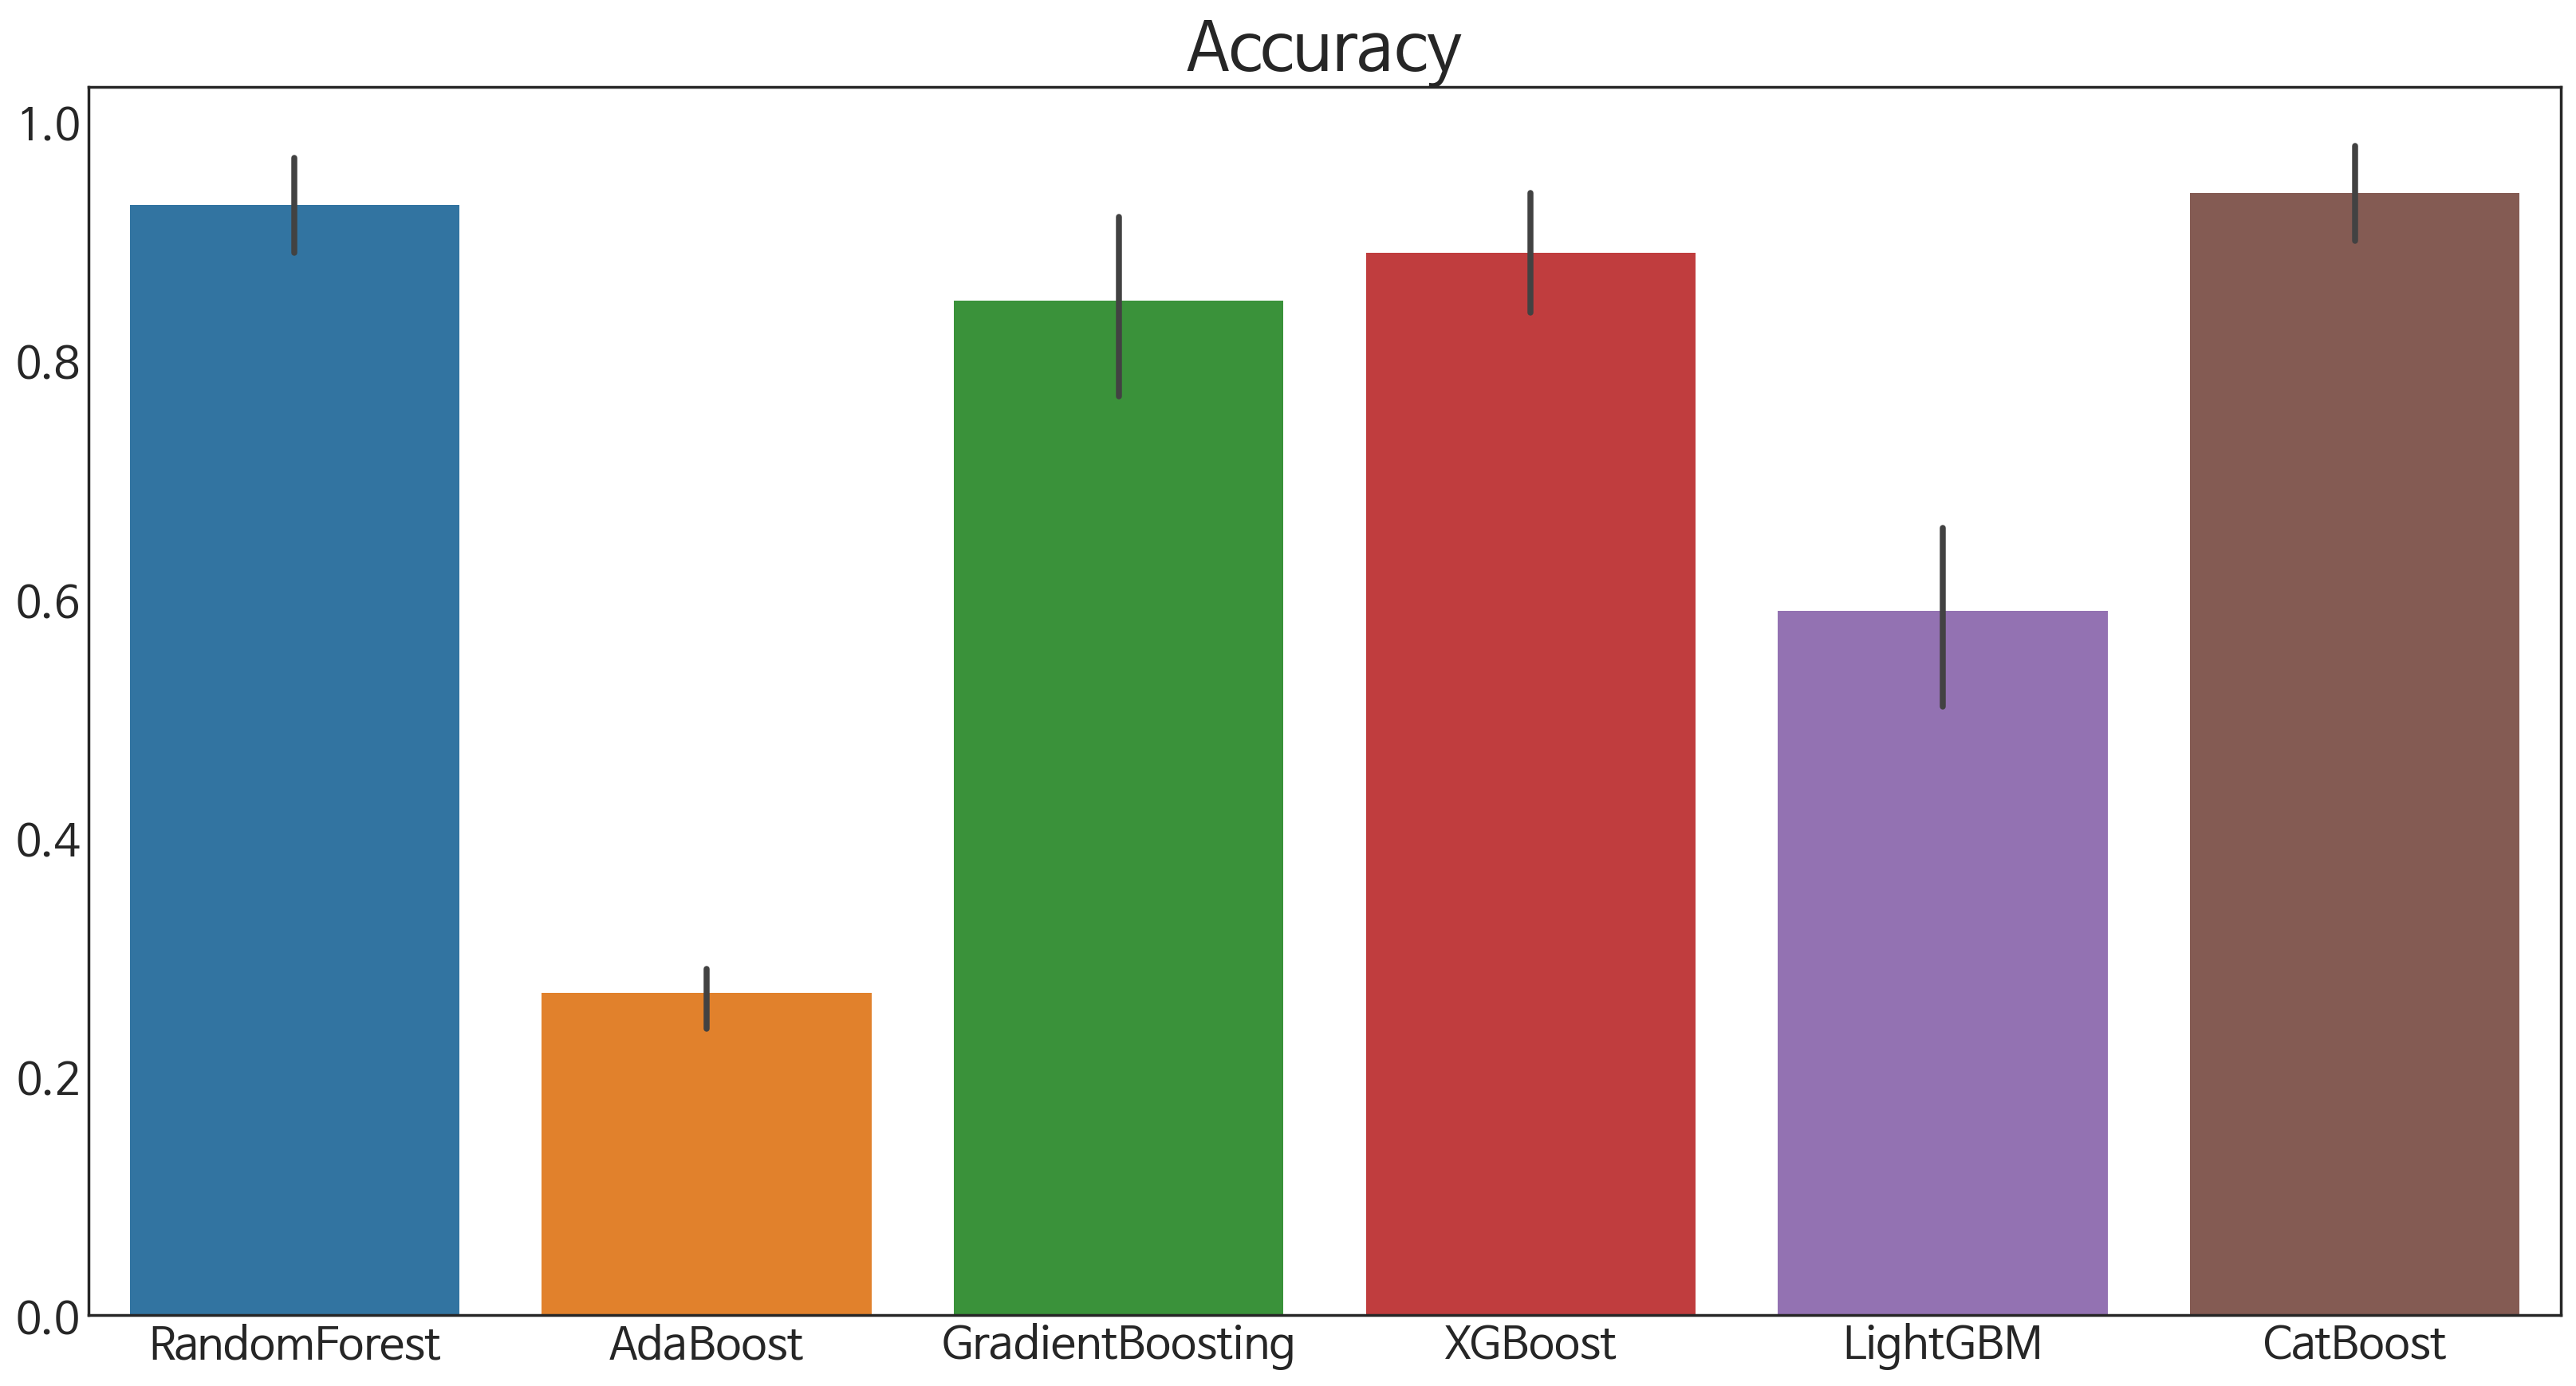

In [269]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.title('Accuracy', fontsize=30)
sns.barplot(data=df_result)
plt.show()